<a href="https://colab.research.google.com/github/maulana78204/Business_Problem_Understanding/blob/main/business_problem_understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip freeze | grep -q category-encoders || pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.1 MB/s eta 0:00:00


In [ ]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Goals : Maka berdasarkan permasalahan tersebut, perusahaan ingin memiliki kemampuan
untuk memprediksi segmentasi pasar sehingga dapat meningkatkan efektivitas dan efesiensi
pemasaran untuk setiap jenis pelanggannya.
Dan juga, perusahaan ingin mengetahui faktor/variable apa yang membuat pelanggan
dikelompokan sebagai pelanggan diperkirakan pelanggan potensial dan pelanggan tetap,
sehingga perusahaan dapat membuat rencana yang lebih baik dalam pelayanan terhadap setiap
jenis pelanggannya.
Analytic Approach Dalam project ini, kita menggunakan beberapa metode analytict, yang
pertama adalah customer behavior segmentasi yaitu RFM analysis. RFM analysis membagi
kebiasaaan pelanggan berdasarkan :
1. Recency, jangka waktu transaksi pertama dengan transaksi terakhir pelanggan.
2. Frequency, seberapa sering pelanggan bertransaksi.
3. Monetary, berapa banyak pelanggan telah bertransaksi.
yang Kedua, kita menggunakan model unsupervised untuk melakukan clustering, sehingga kita
dapat membandingkan performa berdasarkan analysis RFM dengan performa model tanpa
analysis RFM. Model yang kita gunakan KMeans.
Data Understanding Dataset
source: https://drive.google.com/drive/folders/1c9KUFsy2Aq26obDylSPu7eVBctjqc0a9?usp
=sharing

Note :
• Dataset ini memiliki 9 file csv yang berhubungan satu sama lain.

Data Dictionary
• olist_customers_dataset.csv
▪ Customer_id : kunci untuk dataset pesanan. Setiap pesanan memiliki id yang
unik
▪ Customer_unique_id : id unik yang dimiliki customer
▪ customer_zip_code_prefix : 5 digit pertama kode pos customer
▪ customer_city : nama kota customer
▪ customer_state : negara customer
• olist_geolocation_dataset.csv
▪ geolocation_zip_code_prefix : 5 digit pertama kode pos
▪ geolocation_lat : garis lintang(latitude)
▪ geolocation_lng : garis bujur(longitude)
▪ geolocation_city : nama kota
▪ geolocation_state : nama negara
• olist_order_items_dataset.csv
▪ order_id : id pesanan
▪ order_item_id : nomor urut untuk mengidentifikasi jumlah item yang termasuk
dalam pesanan yang sama.
▪ product_id : id produk
▪ seller_id : id penjual
▪ shipping_limit_date : Menunjukkan tanggal batas pengiriman penjual untuk
menangani pesanan ke mitra logistik.
▪ price : harga item
▪ freight_value : biaya ongkos kirim tiap satu produk

• olist_order_payments_dataset.csv
▪ order_id : id pesanan
▪ payment_sequential : pelanggan dapat membayar pesanan dengan lebih dari
satu metode pembayaran. Jika dia melakukannya, urutan akan dibuat untuk
mengakomodasi semua pembayaran.
▪ payment_type : metode pembayaran
▪ payment_installments : angsuran
▪ payment_value : total transaksi
• olist_order_reviews_dataset.csv
▪ review_id : ID tiap ulasan
▪ order_id : ID tiap order
▪ review_score : Nilai mulai dari 1 sampai 5 yang diberikan oleh pelanggan
pada survei kepuasan.
▪ review_comment_title : Judul komentar dari ulasan yang ditinggalkan oleh
pelanggan, dalam bahasa Portugis.
▪ review_comment_message : Isi komentar dari ulasan yang ditinggalkan oleh
pelanggan, dalam bahasa Portugis.
▪ review_creation_date : Menunjukkan tanggal pengiriman survei kepuasan
kepada pelanggan.
▪ review_answer_timestamp : Menampilkan Tanggal waktu jawaban survei
kepuasan.
• olist_orders_dataset.csv
▪ order_id : ID tiap order
▪ customer_id : ID tiap Customer
▪ order_status : Status pesanan (terkirim, terkirim, dll).
▪ order_purchase_timestamp : Menunjukkan waktu pembelian.
▪ order_approved_at : Menunjukkan waktu persetujuan pembayaran.
▪ order_delivered_carrier_date : Menunjukkan waktu pengiriman pesanan. Saat
itu ditangani ke mitra logistik.
▪ order_delivered_customer_date : Menunjukkan waktu penerimaan pesanan.
Saat itu ditangani oleh pelanggan.
▪ order_estimated_delivery_date : Menunjukkan perkiraan tanggal pengiriman
yang diinformasikan kepada pelanggan pada saat pembelian.

• olist_products_dataset.csv
▪ product_id : ID tiap produk
▪ product_name_lenght : Panjang karakter tiap nama produk
▪ product_description_lenght : Panjang karakter tiap deskripsi produk
▪ product_photos_qty : jumlah foto produk yang diterbitkan
▪ product_weight_g : berat produk diukur dalam gram.
▪ product_length_cm : Panjang produk diukur dalam Cm.
▪ product_height_cm : Tinggi produk diukur dalam Cm.
▪ product_width_cm : Lebar produk diukur dalam Cm.
• olist_sellers_dataset.csv
▪ seller_id : ID tiap penjual
▪ seller_zip_code_prefix : 5 digit pertama kode pos penjual
▪ seller_city : Kota penjual
▪ seller_state : negara penjual
• product_category_name_translation.csv
▪ product_category_name : nama kategori dalam bahasa Portugis
# ▪ product_category_name_english : nama kategori dalam bahasa Inggris

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
from datetime import datetime
from operator import attrgetter
from pandas import Timestamp

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler,OneHotEncoder
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import category_encoders as ce

pd.options.display.max_columns = None

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
products = pd.read_csv("/content/drive/My Drive/Kelompok1/olist_products_dataset.csv")
prod_cat_name_tr = pd.read_csv("/content/drive/My Drive/Kelompok1/product_category_name_translation.csv")
items = pd.read_csv("/content/drive/My Drive/Kelompok1/olist_order_items_dataset.csv")
orders = pd.read_csv("/content/drive/My Drive/Kelompok1/olist_orders_dataset.csv")
reviews = pd.read_csv("/content/drive/My Drive/Kelompok1/olist_order_reviews_dataset.csv")
geoloc = pd.read_csv("/content/drive/My Drive/Kelompok1/olist_geolocation_dataset.csv")
sellers = pd.read_csv("/content/drive/My Drive/Kelompok1/olist_sellers_dataset.csv")
payments = pd.read_csv("/content/drive/My Drive/Kelompok1/olist_order_payments_dataset.csv")
customers = pd.read_csv("/content/drive/My Drive/Kelompok1/olist_customers_dataset.csv")

In [ ]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [ ]:
prod_cat_name_tr

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [ ]:
products = products.merge(prod_cat_name_tr, on='product_category_name',
how='left')

In [ ]:
products.drop ('product_category_name', axis=1, inplace=True)

In [ ]:
products

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


In [ ]:
display(products.head(),orders.head(),items.head(),reviews.head(),geoloc.head(),sellers.head(),payments.head(),customers.head(),)

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Merging by its connections to a new database called
olist

In [ ]:
olist = orders.merge(items, on='order_id', how='left')
olist = olist.merge(payments, on='order_id', how='outer')
olist = olist.merge(reviews, on='order_id', how='outer')
olist = olist.merge(products, on='product_id', how='outer')
olist = olist.merge(customers, on='customer_id', how='outer')
olist = olist.merge(sellers, on='seller_id', how='outer')

In [ ]:
olist['product_category_name_english'].value_counts()

bed_bath_table               11988
health_beauty                10032
sports_leisure                9004
furniture_decor               8832
computers_accessories         8150
                             ...  
arts_and_craftmanship           24
la_cuisine                      16
cds_dvds_musicals               14
fashion_childrens_clothes        8
security_and_services            2
Name: product_category_name_english, Length: 71, dtype: int64

In [ ]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   order_item_id                  118310 non-null  float64
 9   product_id                     118310 non-null  object 
 10  seller_id                      118310 non-null  object 
 11  shipping_limit_date            118310 non-null  object 
 12  price                         

Data Cleaning
Correcting column's Info

In [ ]:
olist['order_purchase_timestamp'] = pd.to_datetime(olist.order_purchase_timestamp)
olist['order_approved_at'] = pd.to_datetime(olist.order_approved_at)
olist['order_delivered_carrier_date'] = pd.to_datetime(olist.order_delivered_carrier_date)
olist['order_delivered_customer_date'] = pd.to_datetime(olist.order_delivered_customer_date)
olist['order_estimated_delivery_date'] = pd.to_datetime(olist.order_estimated_delivery_date)
olist['shipping_limit_date'] = pd.to_datetime(olist.shipping_limit_date)
olist['review_creation_date'] = pd.to_datetime(olist.review_creation_date)

In [ ]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_approved_at              118966 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 6   order_delivered_customer_date  115722 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 8   order_item_id                  118310 non-null  float64       
 9   product_id                     118310 non-null  object        
 10  seller_id                      118310 non-null  object        
 11  

In [ ]:
olist.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
order_item_id                       833
product_id                          833
seller_id                           833
shipping_limit_date                 833
price                               833
freight_value                       833
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
review_id                           997
review_score                        997
review_comment_title             105154
review_comment_message            68898
review_creation_date                997
review_answer_timestamp             997
product_name_lenght                2542


In [ ]:
olist['review_comment_title'].isna().sum()/olist.shape[0]

0.8825864717188588

In [ ]:
df=olist.copy()

In [ ]:
df.drop(columns=['review_comment_title','review_comment_message','product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm','seller_zip_code_prefix','seller_city'],axis=1,inplace=True)

Kolom-kolom yang kita drop adalah kolom-kolom yang tidak digunakan, review title dan review
comment memiliki missing value diatas 85% dan menggunakan bahasa portugis. Sedangkan kolom
seller juga kita drop karena fokus kita untuk menganalisa customer segmentation jadi kita tidak
menggunakan kolom-kolom seller tersebut

Handling Duplicates Data and Missing Value

In [ ]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11,2017-10-12 03:43:48,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11,2017-10-12 03:43:48,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11,2017-10-12 03:43:48,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,1.0,credit_card,3.0,37.77,b46f1e34512b0f4c74a72398b03ca788,4.0,2017-08-19,2017-08-20 15:16:36,housewares,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,1.0,credit_card,1.0,37.77,dc90f19c2806f1abba9e72ad3c350073,5.0,2017-08-08,2017-08-08 23:26:23,housewares,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,SP


In [ ]:
df[df.duplicated(['order_id','customer_id','order_purchase_timestamp','order_delivered_customer_date','payment_sequential'])==True]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_state
65,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10,2.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-23 10:50:54,116.90,22.75,1.0,credit_card,2.0,279.30,8892abc02a527ef7535564ecfc0d0133,5.0,2018-08-29,2018-09-11 12:15:59,perfumery,958ac7760e5484df1496ba5833ab6117,89117,gaspar,SC,SP
76,f4d33a3db484fba77b5f1f1990fb3445,8cb1a8d155e0ab13fed232cdfdffc0cd,delivered,2018-08-18 22:34:35,2018-08-20 10:50:27,2018-08-21 14:56:00,2018-08-28 17:58:27,2018-09-06,2.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-22 10:50:27,116.90,22.75,1.0,credit_card,8.0,279.30,a1759275140b9ea289ee6408bb085e86,5.0,2018-08-29,2018-08-30 11:14:17,perfumery,f5985137de910a1e58ed6bc3214a4100,86165,florestopolis,PR,SP
102,c6094f6ab0c25eda761622ab09aa423d,69ee62ecc8d2937fca0e1a3d4de5a2ce,delivered,2018-07-25 10:16:15,2018-07-25 10:30:20,2018-07-26 14:31:00,2018-07-30 17:29:34,2018-08-22,2.0,0f91b6a95a57a43203a9b17de98960d9,289cdb325fb7e7f891c38608bf9e0962,2018-07-27 10:30:20,119.30,15.93,1.0,credit_card,6.0,269.97,d266ab294a1fa257804bea470618c8c5,5.0,2018-07-31,2018-08-01 01:48:47,health_beauty,9b82602fc3e9a153752f16553752d58d,21930,rio de janeiro,RJ,SP
110,c94edffab2f10ec24645c62b40881e88,83e4193ef8adca21142f06ba078bf556,delivered,2018-08-25 14:05:07,2018-08-26 13:55:19,2018-08-27 14:36:00,2018-08-29 11:44:40,2018-09-11,2.0,fbc1488c1a1e72ba175f53ab29a248e8,289cdb325fb7e7f891c38608bf9e0962,2018-08-28 13:55:19,116.90,15.92,1.0,credit_card,5.0,265.64,4c9edf9090763f01b46103e2e218c926,3.0,2018-08-30,2018-08-30 16:53:52,perfumery,3ff9132b9f4a7e46118e5347c765f77b,23035,rio de janeiro,RJ,SP
125,a59244db9c00a55a76803349b21f244d,b82f3c3423d8ffd289353c912be332f0,delivered,2018-07-24 02:10:35,2018-07-25 02:35:15,2018-07-25 14:49:00,2018-07-30 17:50:44,2018-08-08,1.0,6e423c2d28bfb207e1fd1d6e1df84721,289cdb325fb7e7f891c38608bf9e0962,2018-07-27 02:35:15,28.89,29.47,1.0,boleto,1.0,184.91,3851d957c26891c7cb23bbfb662f86d1,5.0,2018-07-31,2018-07-31 22:01:05,perfumery,3e332338454c5752a0ff8cb3858fabfb,13484,limeira,SP,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119115,c894fad29c885c81201d9bdd80cd68c5,42db86d932ba029e4e0290778ebfc59d,invoiced,2017-12-18 10:39:37,2017-12-19 09:51:49,NaT,NaT,2018-01-05,4.0,0c40401eba358c9ef2ff2df80b6eab52,3bfad056cf05c00dabe2f895925d83b1,2017-12-26 09:51:49,41.33,9.34,1.0,boleto,1.0,253.35,a0cce310b010a5ba8531952af8d2836c,1.0,2018-01-09,2018-01-09 03:29:32,NaN,803c530613f5c4ee03502be0d6894de0,12236,sao jose dos campos,SP,SP
119116,c894fad29c885c81201d9bdd80cd68c5,42db86d932ba029e4e0290778ebfc59d,invoiced,2017-12-18 10:39:37,2017-12-19 09:51:49,NaT,NaT,2018-01-05,5.0,0c40401eba358c9ef2ff2df80b6eab52,3bfad056cf05c00dabe2f895925d83b1,2017-12-26 09:51:49,41.33,9.34,1.0,boleto,1.0,253.35,a0cce310b010a5ba8531952af8d2836c,1.0,2018-01-09,2018-01-09 03:29:32,NaN,803c530613f5c4ee03502be0d6894de0,12236,sao jose dos campos,SP,SP
119120,b6b9f5144b004ad3db40567cdce34811,8fdfa85118487910ecb24477b00c6ae3,delivered,2018-04-30 10:10:48,2018-04-30 10:31:13,2018-05-07 14:04:00,2018-05-14 16:37:46,2018-05-17,2.0,6292e8c74db1d4defdbd8244c1101bb6,a3fa18b3f688ec0fca3eb8bfcbd2d5b3,2018-05-07 10:31:02,23.90,18.23,1.0,boleto,1.0,84.26,384e5d48af46db4c863eb5d756566368,5.0,2018-05-15,2018-05-15 22:17:19,perfumery,a38640e92b9b5084cad12f3f3b200a83,35057,

In [ ]:
df.iloc[64:66] #menunjukan data duplicate

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_state
64,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-23 10:50:54,116.9,22.75,1.0,credit_card,2.0,279.3,8892abc02a527ef7535564ecfc0d0133,5.0,2018-08-29,2018-09-11 12:15:59,perfumery,958ac7760e5484df1496ba5833ab6117,89117,gaspar,SC,SP
65,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10,2.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-23 10:50:54,116.9,22.75,1.0,credit_card,2.0,279.3,8892abc02a527ef7535564ecfc0d0133,5.0,2018-08-29,2018-09-11 12:15:59,perfumery,958ac7760e5484df1496ba5833ab6117,89117,gaspar,SC,SP


In [ ]:
df=df.drop_duplicates(subset={'order_id','customer_id','order_purchase_timestamp','order_delivered_customer_date','payment_sequential'},keep='first').reset_index(drop=True)

terdapat 15.256 data duplicate yang kita drop, karena sisa nya memiliki payment menthod dan
payment sequential yang berbeda sehingga payment value nya berbeda sedangkan 15.256 data yang
kita drop memiliki payment value yang sama karena payment sequential dan payment type nya
sama

<Axes: >

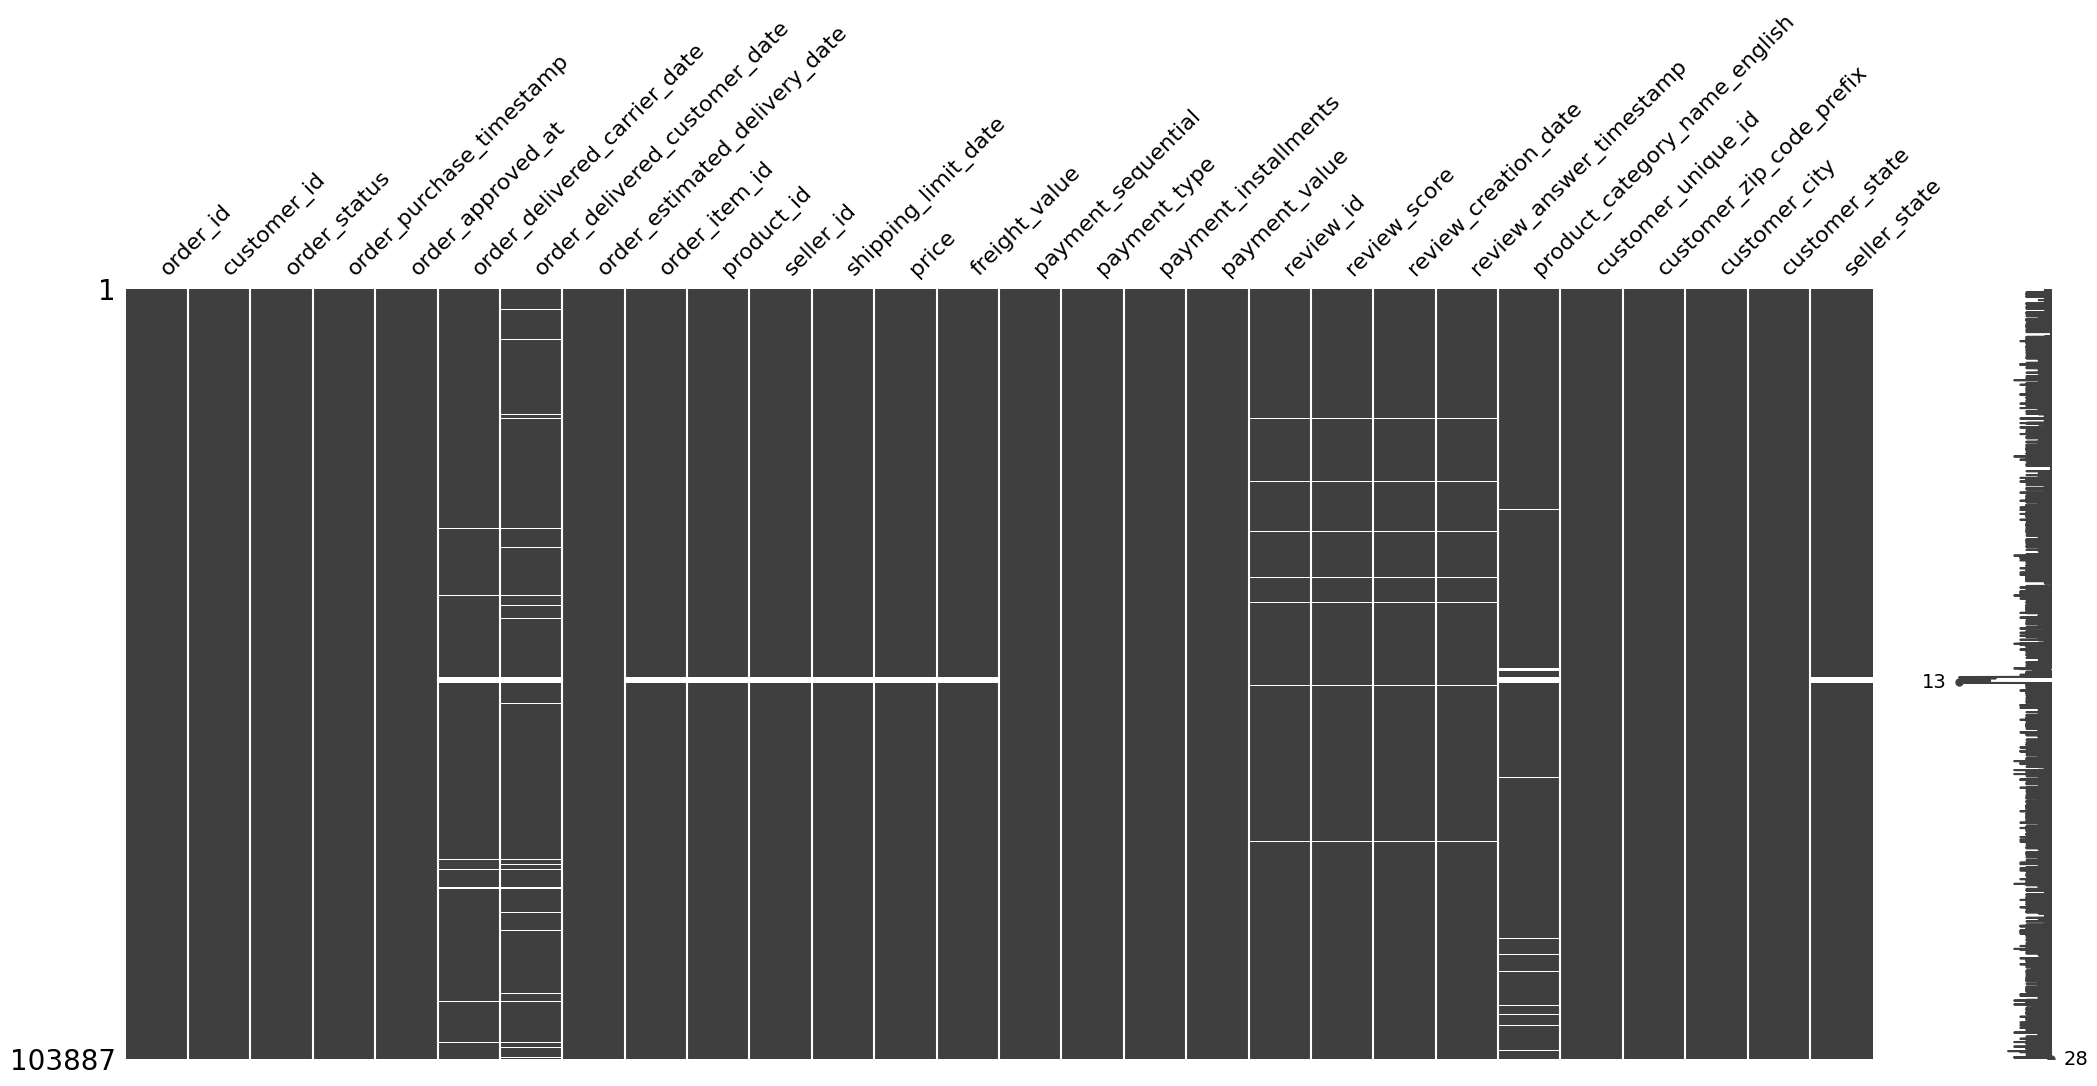

In [ ]:
missingno.matrix(df)

<Axes: >

<Figure size 1200x1200 with 0 Axes>

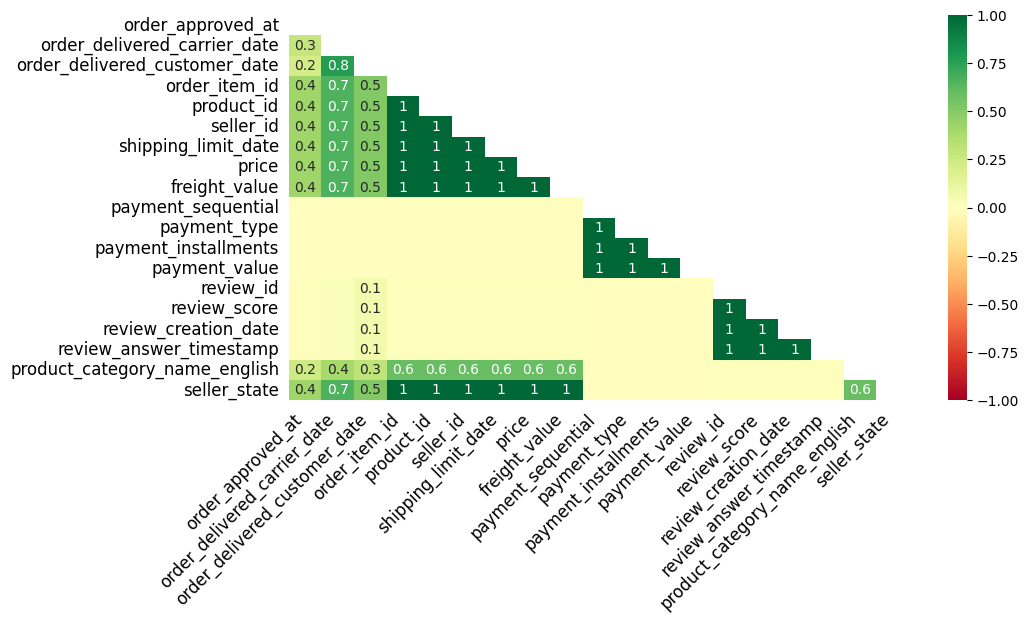

In [ ]:
plt.figure(figsize=(12,12))
missingno.heatmap(df, cmap="RdYlGn", figsize=(10,5), fontsize=12)

Jika dilihat dari heatmap diatas, missing value pada dataset ini memiliki korelasi satu sama lain yaitu
order yang statusnya belum sampai atau selain delivered. Mayoritas dari missing value diatas adalah
tipe data timestamp karena itu handling missing value dilakukan dengan cara di drop.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape[0]

98621

In [ ]:
df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
product_category_name_english    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
seller_state                     0
dtype: int64

Cohort Analysis

-
Analisis kohor (cohort analysis) adalah metode yang digunakan dalam analisis bisnis untuk memahami perilaku grup pelanggan atau pengguna sepanjang waktu. Dalam analisis kohor, pelanggan atau pengguna dikelompokkan berdasarkan karakteristik atau tindakan bersama mereka, seperti tanggal pendaftaran, tanggal pembelian pertama, atau periode lain yang relevan.

- Tujuan utama analisis kohor adalah melacak bagaimana kelompok pelanggan atau pengguna tertentu berperilaku dari waktu ke waktu. Dengan demikian, analisis ini membantu organisasi atau perusahaan memahami bagaimana perilaku pelanggan berubah seiring waktu, seberapa lama pelanggan tetap aktif, apakah ada pola tertentu dalam retensi pelanggan, dan sejauh mana pelanggan memberikan nilai jangka panjang.

In [ ]:
df_cohort=df.copy()

In [ ]:
df_cohort.sort_values(by='order_purchase_timestamp', inplace=True)

In [ ]:
df_cohort['cohort_month']=df_cohort.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')

In [ ]:
df_cohort['current_month']=df_cohort['order_purchase_timestamp'].dt.to_period('M')

In [ ]:
df_cohort['current_month'].nunique()

22

In [ ]:
df_cohort.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_state,cohort_month,current_month
77646,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:50,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26 14:02:13,2016-10-27,1.0,3ae08df6bcbfe23586dd431c40bddbb7,522620dcb18a6b31cd7bdf73665113a9,2016-10-21 16:27:20,29.90,15.56,1.0,boleto,1.0,45.46,9fe0f66724df77fd63fcc0c94a323978,4.0,2016-10-26,2016-10-30 21:32:15,watches_gifts,32ea3bdedab835c3aa6cb68ce66565ef,4106,sao paulo,SP,PR,2016-10,2016-10
102410,be5bc2f0da14d8071e2d45451ad119d9,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03 16:56:50,2016-10-06 16:03:44,2016-10-21 16:33:46,2016-10-27 18:19:38,2016-11-07,1.0,fd7fd78fd3cbc1b0a6370a7909c0a629,f09b760d23495ac9a7e00d29b769007c,2016-10-21 16:33:46,21.90,17.19,1.0,boleto,1.0,39.09,dc62f1e20d7f280e54066b6a92841086,4.0,2016-10-28,2016-10-29 11:29:53,sports_leisure,2f64e403852e6893ae37485d5fcacdaf,98280,panambi,RS,SP,2016-10,2016-10
98129,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25,1.0,9c7bdf67b06b419aefb93cfdfc96c55d,ed49da7cadefc454d6a67de249eab240,2016-10-21 16:24:43,21.50,14.11,1.0,credit_card,1.0,35.61,f9fe37d91c506b29a0b4d9107f667bde,1.0,2016-11-09,2016-11-09 21:04:42,sports_leisure,b8b8726af116a5cfb35b0315ecef9172,22770,rio de janeiro,RJ,SP,2016-10,2016-10
35268,a41c8759fbe7aab36ea07e038b2d4465,6f989332712d3222b6571b1cf5b835ce,delivered,2016-10-03 21:13:36,2016-10-05 03:11:49,2016-10-25 11:57:59,2016-11-03 10:58:07,2016-11-29,1.0,b72b39418216e944bb34e35f4d3ea8c7,45d33f715e24d15a6ccf5c17b3a23e3c,2016-10-21 16:18:26,36.49,17.24,1.0,boleto,1.0,53.73,657654f17abc5a7ce8290f148efb3dd3,3.0,2016-11-04,2016-11-04 23:45:17,sports_leisure,61db744d2f835035a5625b59350c6b63,90040,porto alegre,RS,SP,2016-10,2016-10
52306,d207cc272675637bfed0062edffd0818,b8cf418e97ae795672d326288dfab7a7,delivered,2016-10-03 22:06:03,2016-10-04 10:28:07,2016-10-21 14:23:37,2016-10-31 11:07:42,2016-11-23,1.0,107177bf61755f05c604fe57e02467d6,cca3071e3e9bb7d12640c9fbe2301306,2016-10-21 16:23:06,119.90,13.56,1.0,credit_card,6.0,133.46,444d04d7ca0131b3b40619f81d0facd5,1.0,2016-11-01,2016-11-02 16:52:00,furniture_decor,8d3a54507421dbd2ce0a1d58046826e0,13185,hortolandia,SP,SP,2016-10,2016-10


In [ ]:
df_cohort=df_cohort.groupby(['cohort_month','current_month']).agg(n_customer=('customer_unique_id','nunique')).reset_index()

In [ ]:
df_cohort.head()

,cohort_month,current_month,n_customer
0,2016-10,2016-10,262
1,2016-10,2017-04,1
2,2016-10,2017-07,1
3,2016-10,2017-09,1
4,2016-10,2017-11,1


In [ ]:
(df_cohort['current_month']-
df_cohort['cohort_month']).apply(attrgetter('n'))

0       0
1       6
2       9
3      11
4      13
       ..
212     1
213     2
214     0
215     1
216     0
Length: 217, dtype: int64

In [ ]:
df_cohort['period']=(df_cohort['current_month']-
df_cohort['cohort_month']).apply(attrgetter('n'))

In [ ]:
df_cohort.head()

,cohort_month,current_month,n_customer,period
0,2016-10,2016-10,262,0
1,2016-10,2017-04,1,6
2,2016-10,2017-07,1,9
3,2016-10,2017-09,1,11
4,2016-10,2017-11,1,13


In [ ]:
cohort_pivot=df_cohort.pivot_table(index='cohort_month',columns='period',values='n_customer')
cohort_pivot

period,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort_month,,,,,,,,,,,,,,,,,,,,
2016-10,262.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,2.0
2016-12,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,697.0,2.0,2.0,1.0,3.0,1.0,3.0,1.0,NaN,NaN,3.0,1.0,4.0,3.0,1.0,1.0,2.0,3.0,1.0,NaN
2017-02,1560.0,3.0,5.0,1.0,7.0,2.0,4.0,3.0,1.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,3.0,NaN,NaN
2017-03,2436.0,11.0,9.0,9.0,9.0,4.0,4.0,8.0,8.0,2.0,8.0,3.0,5.0,3.0,4.0,6.0,2.0,3.0,NaN,NaN
2017-04,2182.0,14.0,5.0,4.0,6.0,6.0,7.0,7.0,7.0,4.0,6.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,NaN,NaN
2017-05,3344.0,16.0,15.0,10.0,9.0,11.0,14.0,5.0,7.0,8.0,9.0,9.0,8.0,1.0,5.0,7.0,NaN,NaN,NaN,NaN
2017-06,2963.0,15.0,11.0,11.0,9.0,11.0,10.0,6.0,4.0,5.0,9.0,10.0,5.0,5.0,7.0,NaN,NaN,NaN,NaN,NaN
2017-07,3676.0,20.0,12.0,9.0,10.0,8.0,11.0,4.0,7.0,10.0,8.0,11.0,5.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cohort_pivot.iloc[:,0]
cohort_percentage=cohort_pivot.divide(cohort_pivot.iloc[:,0],axis=0)
cohort_percentage

period,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort_month,,,,,,,,,,,,,,,,,,,,
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003817,NaN,NaN,0.003817,NaN,0.003817,NaN,0.003817,NaN,0.003817,NaN,0.003817,0.007634,0.007634
2016-12,1.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.002869,0.002869,0.001435,0.004304,0.001435,0.004304,0.001435,NaN,NaN,0.004304,0.001435,0.005739,0.004304,0.001435,0.001435,0.002869,0.004304,0.001435,NaN
2017-02,1.0,0.001923,0.003205,0.000641,0.004487,0.001282,0.002564,0.001923,0.000641,0.001923,0.001282,0.003205,0.001282,0.001923,0.001282,0.000641,0.000641,0.001923,NaN,NaN
2017-03,1.0,0.004516,0.003695,0.003695,0.003695,0.001642,0.001642,0.003284,0.003284,0.000821,0.003284,0.001232,0.002053,0.001232,0.001642,0.002463,0.000821,0.001232,NaN,NaN
2017-04,1.0,0.006416,0.002291,0.001833,0.002750,0.002750,0.003208,0.003208,0.003208,0.001833,0.002750,0.000917,0.000458,0.000458,0.000917,0.000917,0.001375,NaN,NaN,NaN
2017-05,1.0,0.004785,0.004486,0.002990,0.002691,0.003289,0.004187,0.001495,0.002093,0.002392,0.002691,0.002691,0.002392,0.000299,0.001495,0.002093,NaN,NaN,NaN,NaN
2017-06,1.0,0.005062,0.003712,0.003712,0.003037,0.003712,0.003375,0.002025,0.001350,0.001687,0.003037,0.003375,0.001687,0.001687,0.002362,NaN,NaN,NaN,NaN,NaN
2017-07,1.0,0.005441,0.003264,0.002448,0.002720,0.002176,0.002992,0.001088,0.001904,0.002720,0.002176,0.002992,0.001360,0.002448,NaN,NaN,NaN,NaN,NaN,NaN


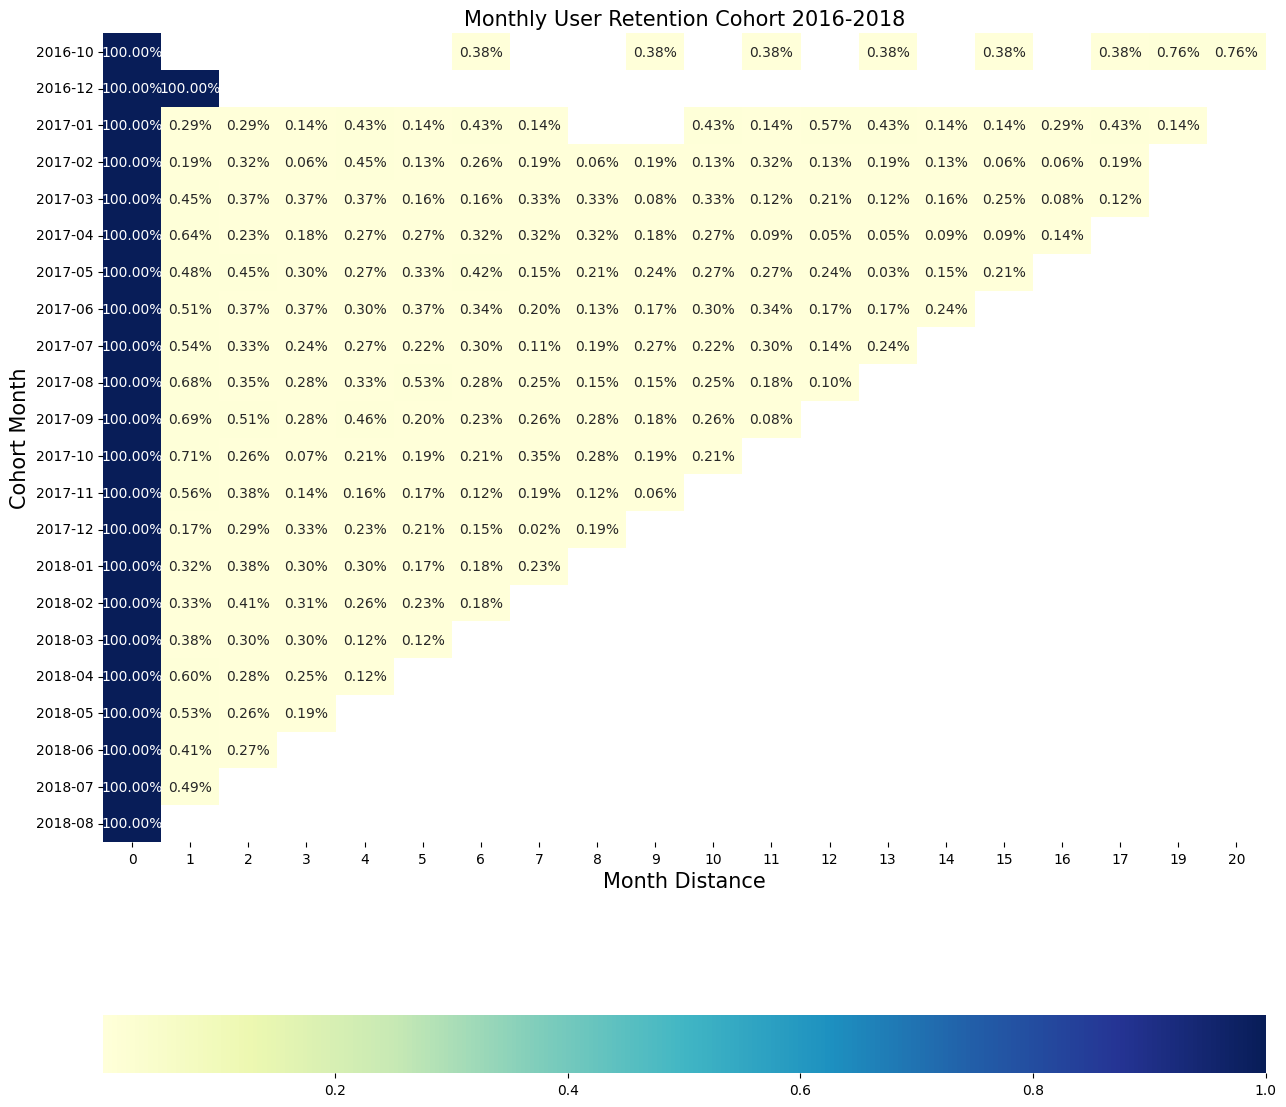

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(cohort_percentage,
 annot=True,
 cmap='YlGnBu',
 fmt='.2%',
 cbar_kws={'orientation':'horizontal'}
 )
plt.xlabel('Month Distance',size=15)
plt.ylabel('Cohort Month',size=15)
plt.title('Monthly User Retention Cohort 2016-2018',size=15)
plt.show()

Dari heatmap hasil cohort analysis diatas terlihat bahwa pengguna baru yang melakukan transaksi
berikutnya di bulan-bulan setelahnya tidak lebih dari 1%, yang menandakan hanya sedikit dari
pengguna yang melakukan pembelian kembali

- EDA

- EDA (Exploratory Data Analysis) adalah proses analisis yang bertujuan untuk memahami dan menganalisis data secara deskriptif. Tujuan utama dari EDA adalah untuk mengungkap pola, hubungan, dan tren dalam data, serta untuk mengidentifikasi anomali atau nilai ekstrem. EDA digunakan untuk mendapatkan wawasan awal tentang data sebelum melangkah ke tahap pemodelan atau analisis yang lebih mendalam.

In [ ]:
df.describe()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,customer_zip_code_prefix
count,98621.000000,98621.000000,98621.000000,98621.000000,98621.000000,98621.000000,98621.000000,98621.000000
mean,1.016954,125.179279,20.213359,1.087720,2.854646,153.010757,4.156691,35132.981495
std,0.148666,189.098428,15.846644,0.650976,2.686875,213.108052,1.283728,29788.638402
min,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1.000000,1003.000000
25%,1.000000,41.800000,13.310000,1.000000,1.000000,56.850000,4.000000,11390.000000
50%,1.000000,79.000000,16.410000,1.000000,1.000000,99.900000,5.000000,24416.000000
75%,1.000000,139.500000,21.280000,1.000000,4.000000,171.480000,5.000000,58745.000000
max,7.000000,6735.000000,409.680000,26.000000,24.000000,13664.080000,5.000000,99980.000000


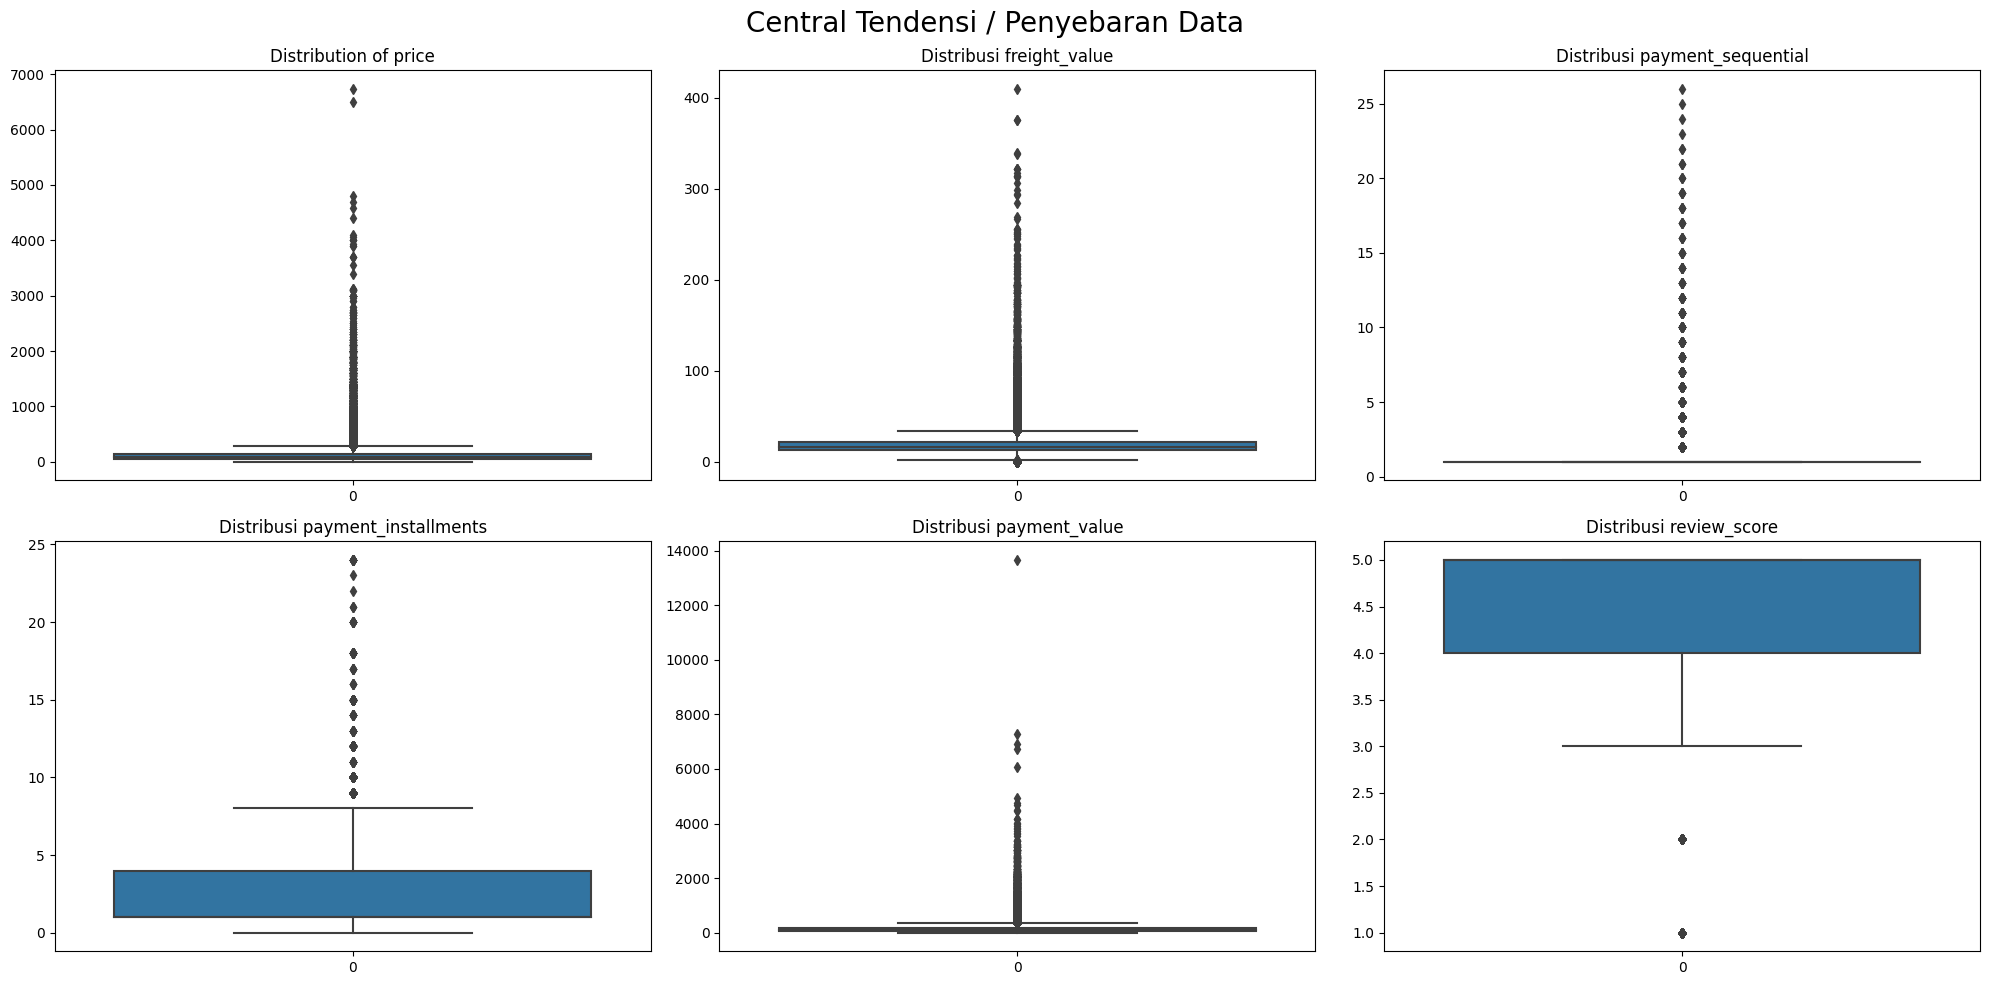

In [ ]:
plt.figure(figsize=(20,10))
plt.suptitle('Central Tendensi / Penyebaran Data',size=20)
plt.subplot(2,3,1)
sns.boxplot(data=df['price'])
plt.title('Distribution of price')
plt.subplot(2,3,2)
sns.boxplot(data=df['freight_value'])
plt.title('Distribusi freight_value')
plt.subplot(2,3,3)
sns.boxplot(data=df['payment_sequential'])
plt.title('Distribusi payment_sequential')
plt.tight_layout()
plt.subplot(2,3,4)
sns.boxplot(data=df['payment_installments'])
plt.title('Distribusi payment_installments')
plt.tight_layout()
plt.subplot(2,3,5)
sns.boxplot(data=df['payment_value'])
plt.title('Distribusi payment_value')
plt.tight_layout()
plt.subplot(2,3,6)
sns.boxplot(data=df['review_score'])
plt.title('Distribusi review_score')
plt.tight_layout()

Distibusi dari visualisasi boxplot di atas menunjukan bahwa terdapat banyak outlier, sehingga
penentuan central tendensi menggunakan median

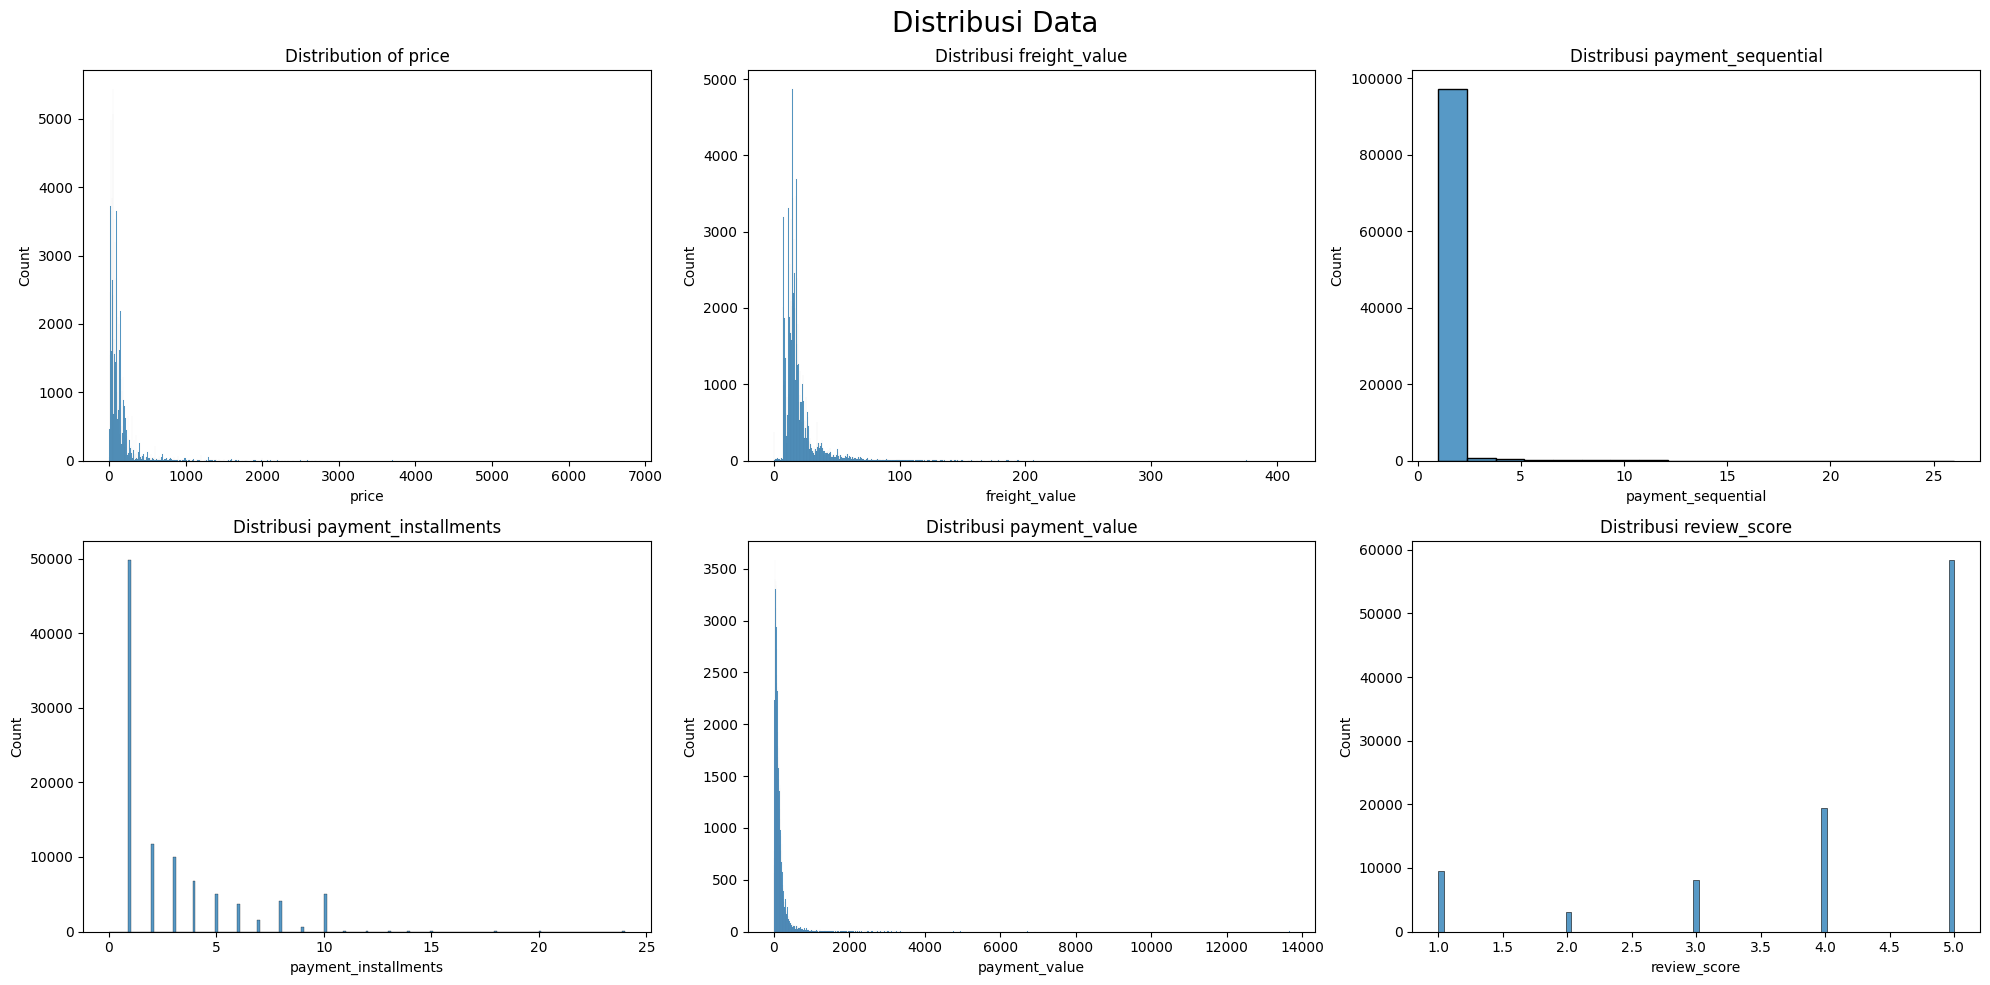

In [ ]:
plt.figure(figsize=(20,10))
plt.suptitle('Distribusi Data',size=20)
plt.subplot(2,3,1)
sns.histplot(data=df['price'])
plt.title('Distribution of price')
plt.subplot(2,3,2)
sns.histplot(data=df['freight_value'])
plt.title('Distribusi freight_value')
plt.subplot(2,3,3)
sns.histplot(data=df['payment_sequential'])
plt.title('Distribusi payment_sequential')
plt.tight_layout()
plt.subplot(2,3,4)
sns.histplot(data=df['payment_installments'])
plt.title('Distribusi payment_installments')
plt.tight_layout()
plt.subplot(2,3,5)
sns.histplot(data=df['payment_value'])
plt.title('Distribusi payment_value')
plt.tight_layout()
plt.subplot(2,3,6)
sns.histplot(data=df['review_score'])
plt.title('Distribusi review_score')
plt.tight_layout()

Distibusi dari visualisasi histplot di atas menunjukan bahwa distribusi tersebut tidak normal

In [ ]:
df['order_purchase_month_name'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
df['order_purchase_month'] = df['order_purchase_timestamp'].dt.to_period('M')
df['order_purchase_date'] = df['order_purchase_timestamp'].dt.to_period('D')
df['order_purchase_dayofweek_name'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))
df['order_purchase_hour'] = df['order_purchase_timestamp'].apply(lambda x:x.hour)
hours_bins = [-0.1, 5, 11, 17, 20, 24]
hours_labels = ['late at night','morning', 'afternoon', 'evening', 'lateevening']
df['order_purchase_time_day'] = pd.cut(df['order_purchase_hour'],
hours_bins, labels=hours_labels)

In [ ]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_state,order_purchase_month_name,order_purchase_month,order_purchase_date,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11,2017-10-12 03:43:48,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,SP,Oct,2017-10,2017-10-02,Mon,10,morning
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11,2017-10-12 03:43:48,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,SP,Oct,2017-10,2017-10-02,Mon,10,morning
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11,2017-10-12 03:43:48,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,SP,Oct,2017-10,2017-10-02,Mon,10,morning
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,1.0,credit_card,3.0,37.77,b46f1e34512b0f4c74a72398b03ca788,4.0,2017-08-19,2017-08-20 15:16:36,housewares,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,SP,Aug,2017-08,2017-08-15,Tue,18,evening
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,1.0,credit_card,1.0,37.77,dc90f19c2806f1abba9e72ad3c350073,5.0,2017-08-08,2017-08-08 23:26:23,housewares,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,SP,Aug,2017-08,2017-08-02,Wed,18,evening


In [ ]:
df['order_purchase_month']=df['order_purchase_month'].astype('str')

In [ ]:
monthorder=df.groupby(['order_purchase_month','order_purchase_month_name'])['order_id'].count().reset_index()

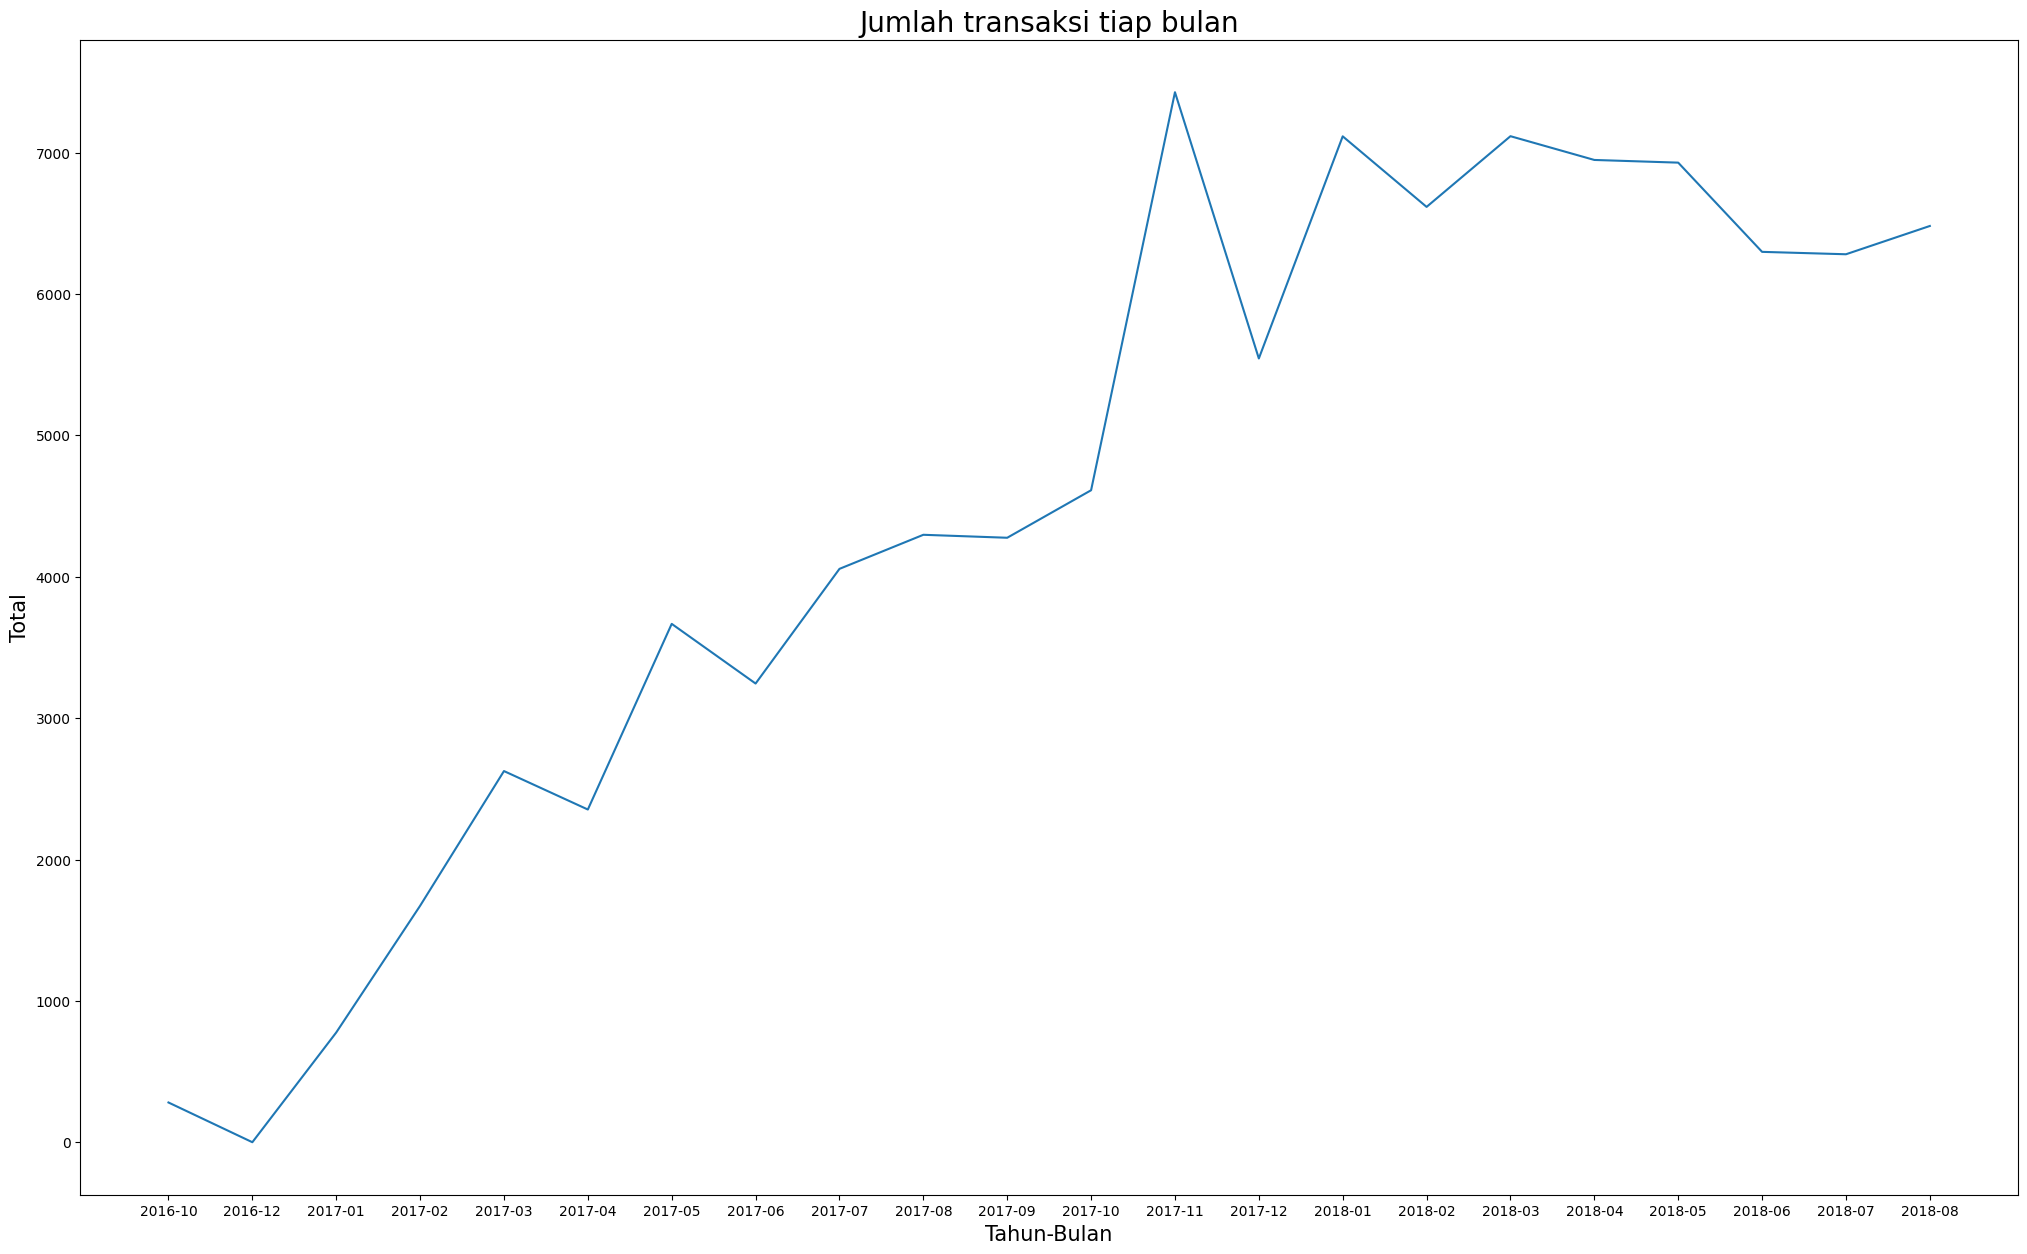

In [ ]:
plt.figure(figsize=(25,15))
sns.lineplot(x='order_purchase_month', y='order_id', data=monthorder)
plt.title('Jumlah transaksi tiap bulan', size=20)
plt.xlabel('Tahun-Bulan', size=15)
plt.ylabel('Total', size=15)
plt.show()

Dari visualisasi di atas, kita dapat melihat bahwa jumlah transaksi tiap bulan nya memiliki trend
positif dimana titik tertinggi berada pada bulan november 2017 dan mengalami fluktuatif pada
bulan-bulan berikutnya.

In [ ]:
valuemonth=df.groupby('order_purchase_month')['payment_value'].sum().reset_index()

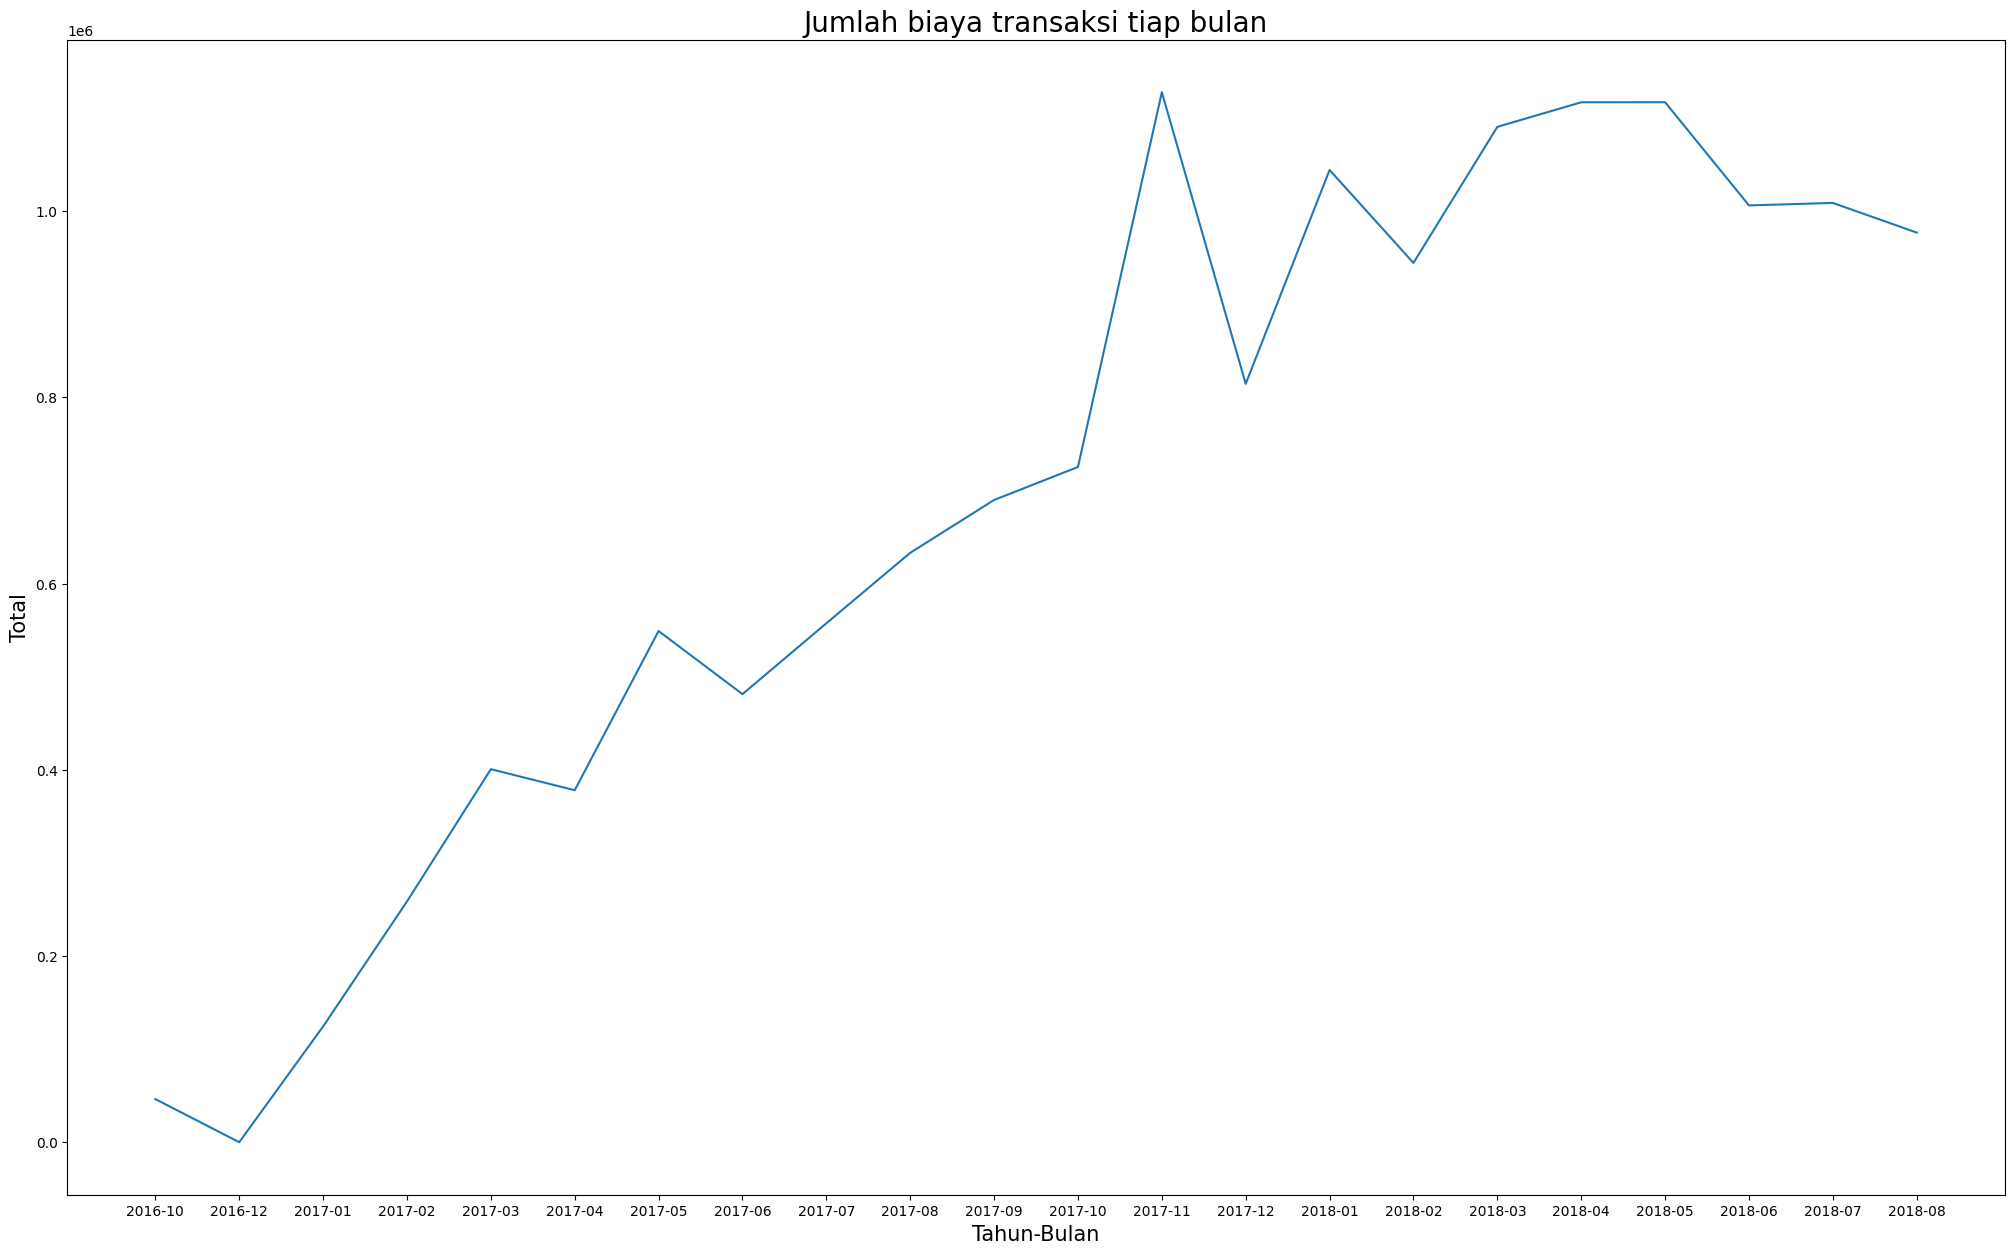

In [ ]:
plt.figure(figsize=(25,15))
sns.lineplot(x="order_purchase_month", y='payment_value', data=valuemonth)
plt.title('Jumlah biaya transaksi tiap bulan', size=20)
plt.xlabel('Tahun-Bulan', size=15)
plt.ylabel('Total', size=15)
plt.show()

Dari visualisasi di atas, kita dapat melihat bahwa jumlah transaksi tiap bulan nya memiliki trend
positif dimana titik tertinggi berada pada bulan november 2017 dan mengalami fluktuatif pada
bulan-bulan berikutnya. Dan jika di lihat lebih seksama, banyak event atau acara tertentu yang
mempengaruhi tingkat pembelian konsumer. Contohnya pada titik tertinggi di november 2017,
terdapat aktivitas tahunan seperti black friday dimana terdapat diskon besar-besaran dan juga
terdapat event besar dimana pada bulan tersebut juga, Brazil menempati peringkat satu di
kualifikasi WORLD CUP CONMEBOL dimana dapat meningkatkan pembelian pada kategori sports.
sehingga dapat direkomendasikan melakukan analysis lebih lanjut pada event2 yang sama seperti
Black Friday pada jumat di minggu terakhir dan acara olahraga terutama sepak bola. Berikut acara
yang mungkin dapat mempengaruhi tingkat pembelian dimana dapat lebih ditingkatkan dengan cara
kampanye pemasaran atau memberikan voucher terhadap barang yang mungkin berkaitan dengan
acara tersebut
Free shipping day
• Kapan ? Hari jumat di minggu terakhir pada bulan April
• Apa ? semua segment
Mothers day
• Kapan ? Hari jumat di minggu terakhir pada bulan April
• Apa ? expensive clothing, luxury accessories, high-end makeup, jewelry, and fragrances.
Fathers day
• Kapan ? Hari minggu di minggu kedua pada bulan agustus
• Apa ? Fashion and Accessories,Electronics , Books, Fragrances
Valentines day
• Kapan ? 12 Juni
• Apa ? Beauty and Health, followed by Fashion and Technology.
Children's day
• Kapan ? 12 Oktober
• Apa? toys were fashion dolls, superhero action figures, bikes, miniature cars and board
games.
Black Friday
• Kapan ? Hari jumat di minggu terakhir pada bulan November
• Apa ? Home Appliances, Electronics, Cosmetics, Fashion
Christmas
• Kapan ? 25 December
• Apa ? From Apparel to Toys, passing through Fragrances, Cosmetics, Home Appliances, and
Electronics.

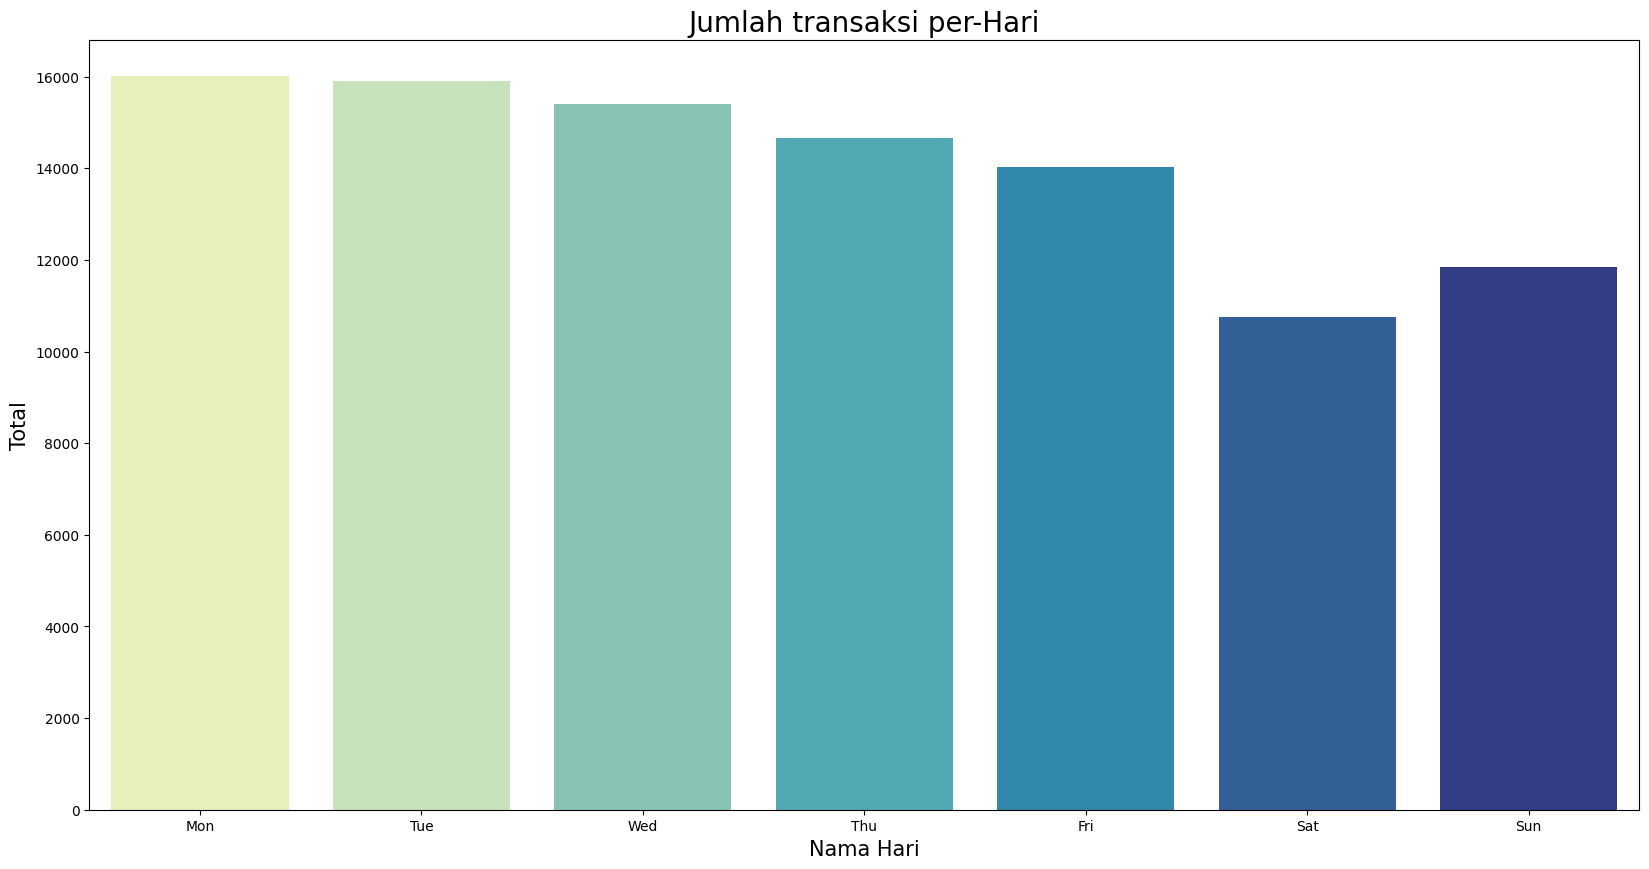

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x="order_purchase_dayofweek_name", data=df,palette='YlGnBu')
plt.title('Jumlah transaksi per-Hari', size=20)
plt.xlabel('Nama Hari', size=15)
plt.ylabel('Total', size=15)
plt.show()

Dari plot berikut, dapat dilihat bahwa jumlah order terbanyak berada pada hari senin dan terkecil
pada hari sabtu. hari yang menunjukan order terbanyak mengindikasikan banyak nya customer
yang mengunjungi e-commerce Olist, oleh karena itu direkomendasikan kegiatan promosi dilakukan
pada hari senin dan selasa sehingga promosi dijangkau oleh banyak customer.

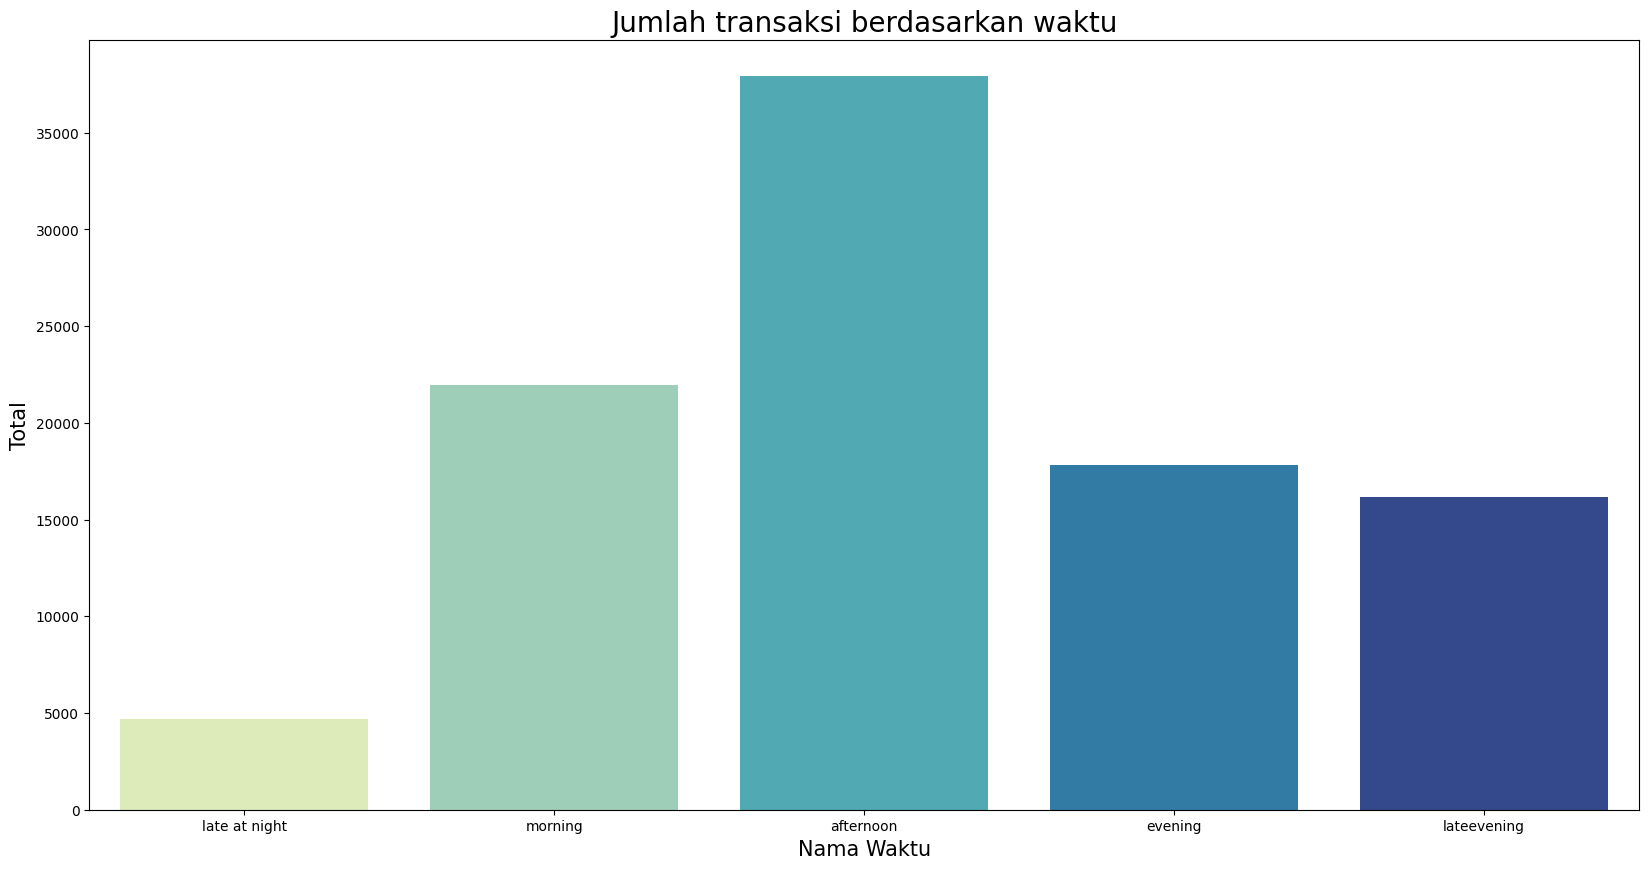

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x="order_purchase_time_day", data=df, palette='YlGnBu')
plt.title('Jumlah transaksi berdasarkan waktu', size=20)
plt.xlabel('Nama Waktu', size=15)
plt.ylabel('Total', size=15)
plt.show()

In [ ]:
day_hour=df.groupby(['order_purchase_dayofweek_name','order_purchase_hour']).agg({'order_id':'count'}).rename(columns={'order_id':'freq'}).reset_index()
day_hour['order_purchase_dayofweek_name']=pd.Categorical(day_hour['order_purchase_dayofweek_name'],categories=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'],ordered=True)
day_hour=day_hour.pivot('order_purchase_dayofweek_name','order_purchase_hour','freq')

<ipython-input-57-4bc8def83813>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  day_hour=day_hour.pivot('order_purchase_dayofweek_name','order_purchase_hour','freq')


In [ ]:
df['order_purchase_time_day'].value_counts(normalize=True)

afternoon        0.384421
morning          0.222884
evening          0.180824
lateevening      0.164133
late at night    0.047738
Name: order_purchase_time_day, dtype: float64

Berdasarkan Barplot di atas, pembagian waktu dibagi berdasarkan :
• late at night : 00.00 - 05.00
• morning : 05.00 - 11.00
• afternoon : 12.00 - 17.00
• evening : 18.00 - 20.00
• late evening : 21.00 - 24.00
Terlihat bahwa jumlah transaksi terbanyak terdapat pada waktu "afternoon" dimana 38.44%
transaksi terjadi waktu tersebut, sehingga team marketing dapat menjadikan opsi waktu tersebut
untuk melakukan aktivitas pemasaran seperti adanya promo terbatas dalam waktu tersebut
ataupun flash sale dan juga merchant untuk memasang iklan listing produk pada waktu tersebut.

Text(0.5, 1.0, 'Transaksi Tiap Jam Dalam Hari')

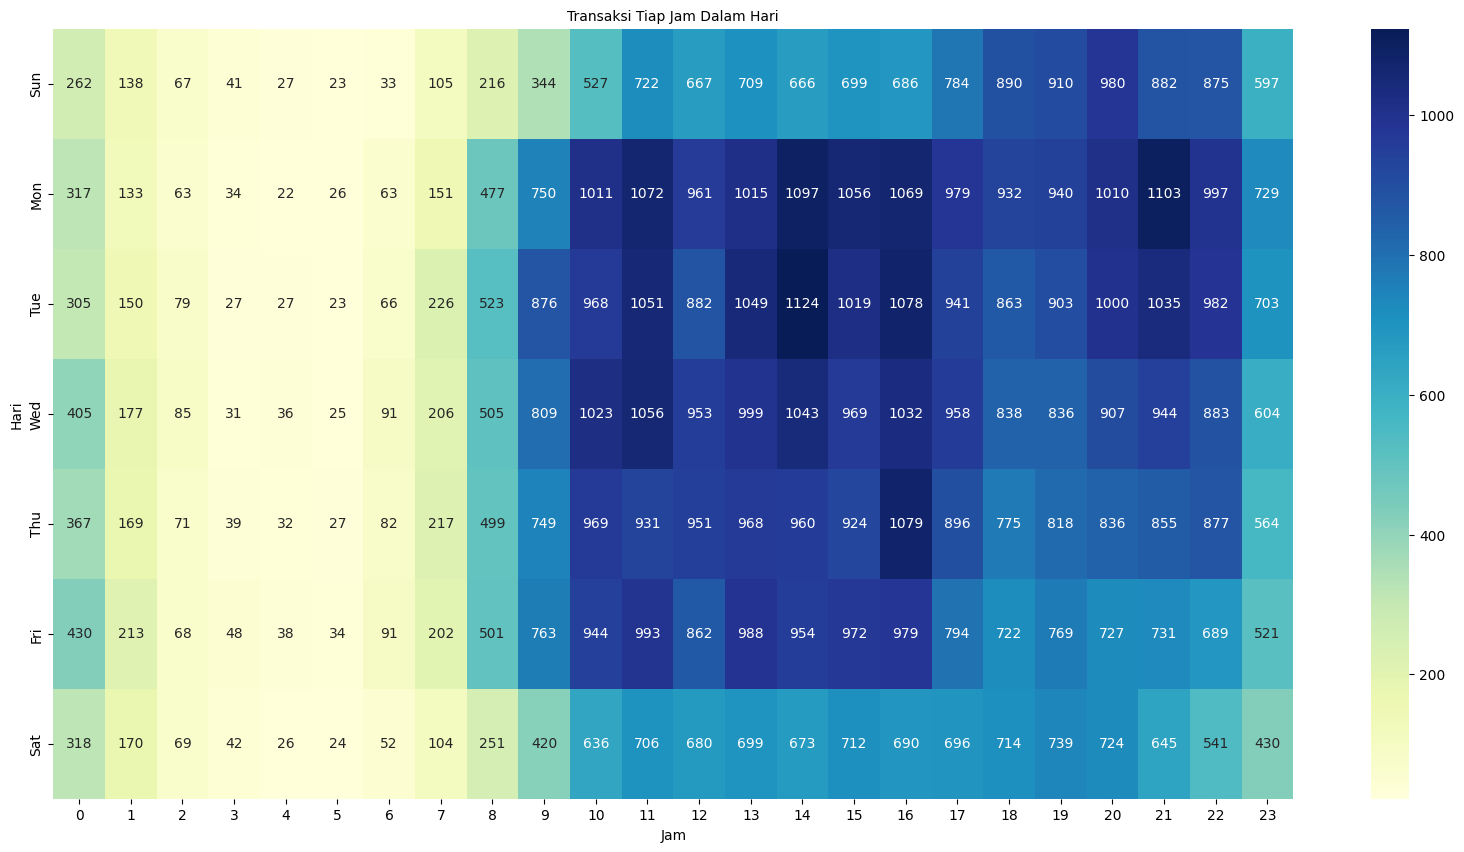

In [ ]:
plt.figure(figsize=(20,10))
ax=sns.heatmap(day_hour,annot=True,fmt="d",cmap="YlGnBu")
ax.set_xlabel("Jam")
ax.set_ylabel("Hari")
ax.set_title("Transaksi Tiap Jam Dalam Hari",size=10)

Dapat dilihat dari heatmap diatas, kami dapat menyimpulkan:
• frekuensi transaksi pada hari kerja lebih banyak dibandingkan pada akhir pekan.
• pada hari kerja, frekuensi transaksi meningkat pada jam 9 pagi, dan di hari minggu frekuensi
pembelian hanya meningkat setelah jam 15.00.
• seiring berjalannya hari jumlah transaksi meningkat.
Dari ketiga grafik di atas, dapat dilihat bahwa jumlah order terbanyak berada pada hari senin dan
terkecil pada hari sabtu yang mungkin disebabkan oleh banyak nya waktu luang di akhir pekan,
konsumer memilih untuk berbelanja ke toko fisik. Hari yang menunjukan order terbanyak
mengindikasikan banyak nya customer yang mengunjungi e-commerce Olist, oleh karena itu
direkomendasikan kegiatan promosi yang mungkin dapat dilakukan dengan cara :
1. Pemberian voucher khusus & diskon yang berlaku pada pembelian di akhir pekan
2. Pemberian voucher khusus & diskon yang berlaku pada pembelian di jam malam akhir
pekan
3. Melakukan kampanye marketing seperti broadcast dan iklan sebelum jam 9 dimana
frekuensi transaksi mulai meningkat.

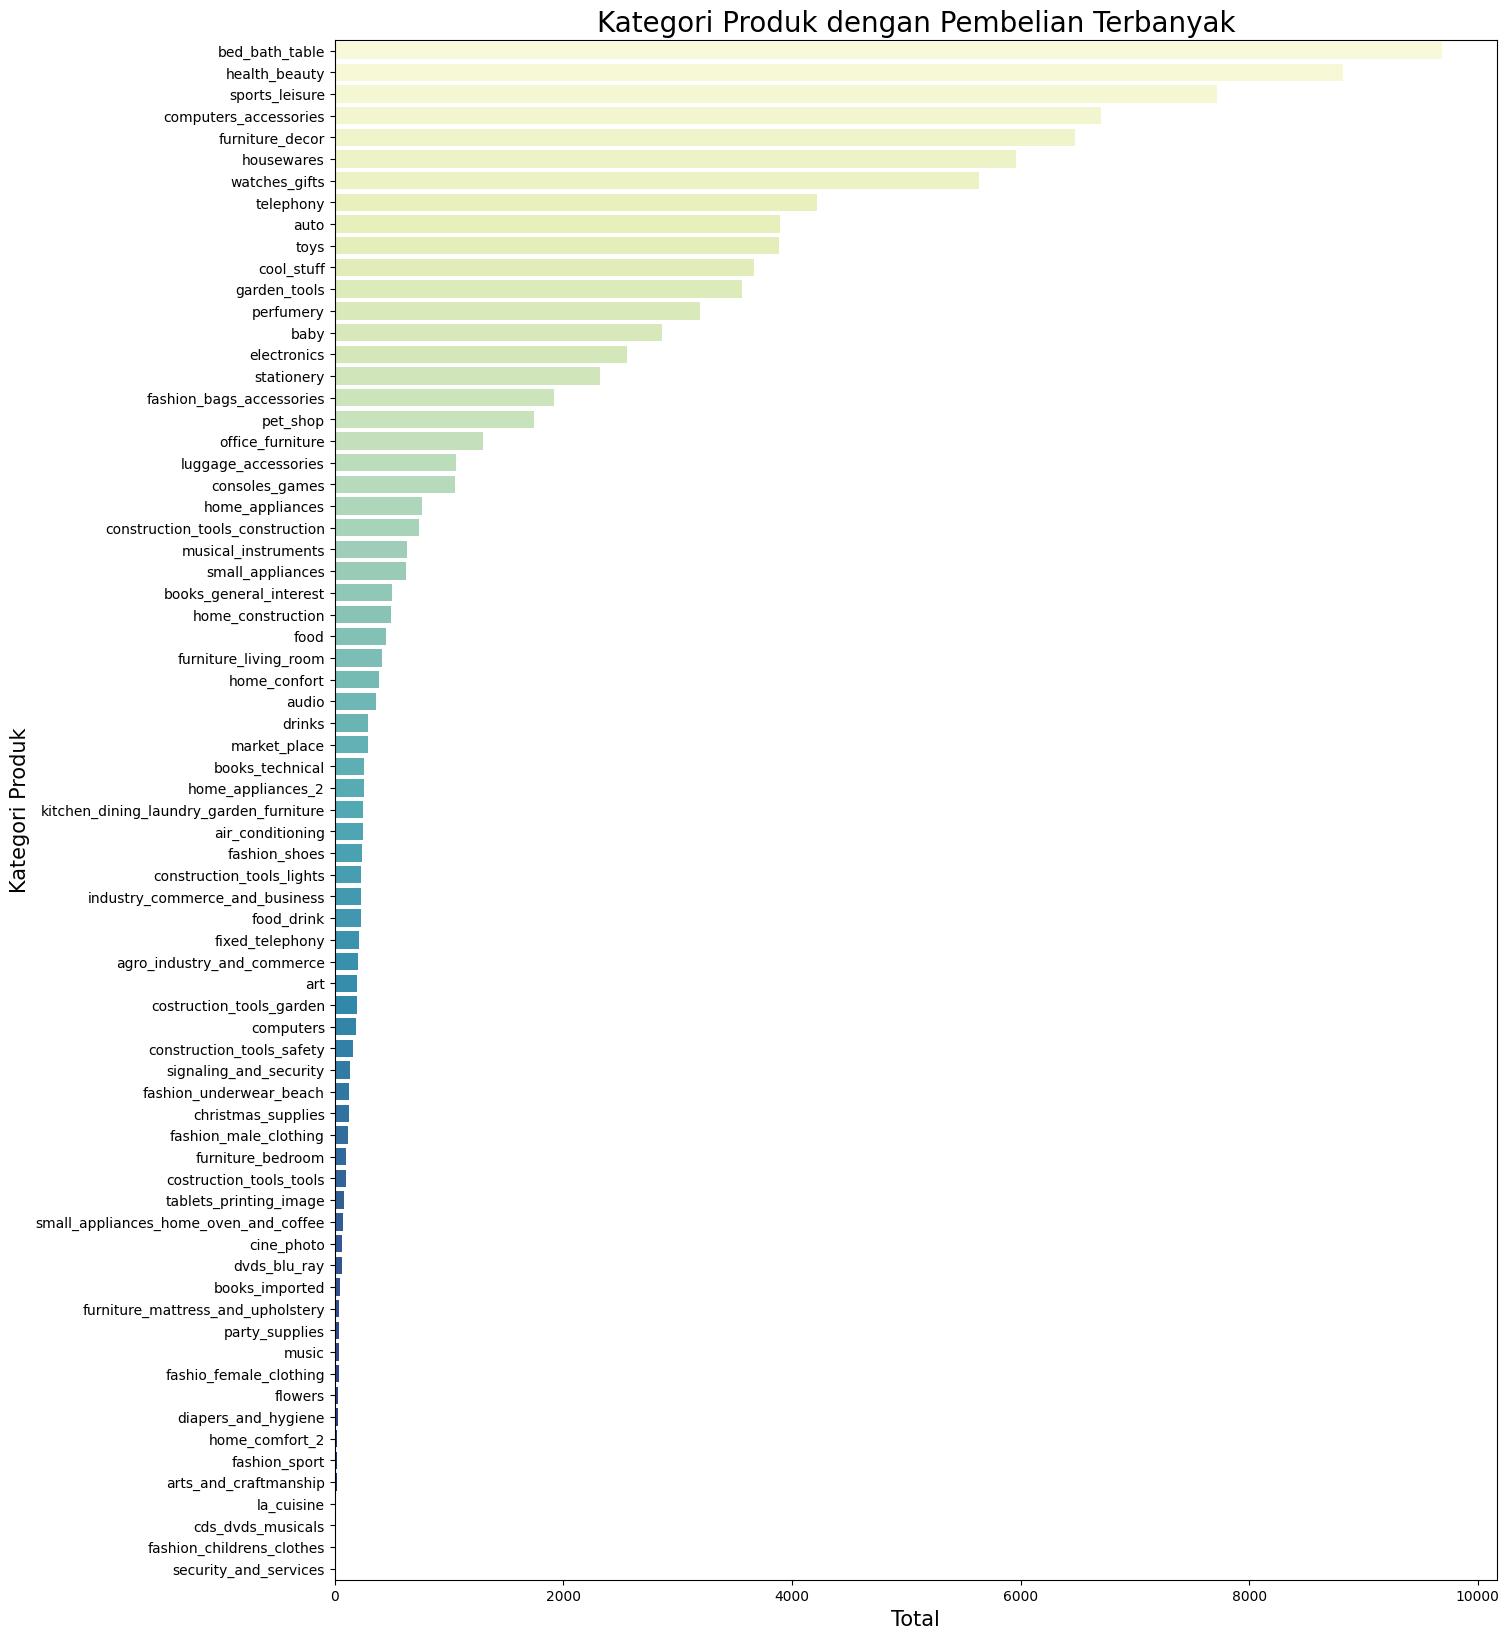

In [ ]:
plt.figure(figsize=(15,20))
sns.countplot(y="product_category_name_english", data=df,
order=df['product_category_name_english'].value_counts().index,
palette='YlGnBu')
plt.title('Kategori Produk dengan Pembelian Terbanyak', size=20)
plt.xlabel('Total', size=15)
plt.ylabel('Kategori Produk', size=15)
plt.show()

Terlihat dalam visualisasi diatas, 5 kategori produk dengan pembelian terbanyak adalah :
1. bed_bath_table
2. health_beauty
3. Sport_leisure
4. computers_accecoris
5. furniture_decors
dari kategori produk di atas, sebagian besar kategori produk merupakan produk bersifat
tidak repeatable atau tidak dibeli secara rutin. jadi perlu di analisis lebih lanjut mengenai kategori
produk lain yang kurang diminati, apakah bermasalah dalam periklanan atau ketersediaan barang
tersebut.
karena terdapat perbedaan jauh dalam jumlah pembelian produk di tiap kategori yang berbeda dan
menimbulkan ketidak seimbangan. Dimana, masih banyak produk yang kurang diminati konsumen
sehingga tidak memiliki banyak pembelian. Sehingga dapat direkomendasikan juga, untuk
melakukan periklanan pada setiap platform digital dengan cara re-marketing atau re-advertising
untuk meningkatkan engagement dari setiap kategori produk.

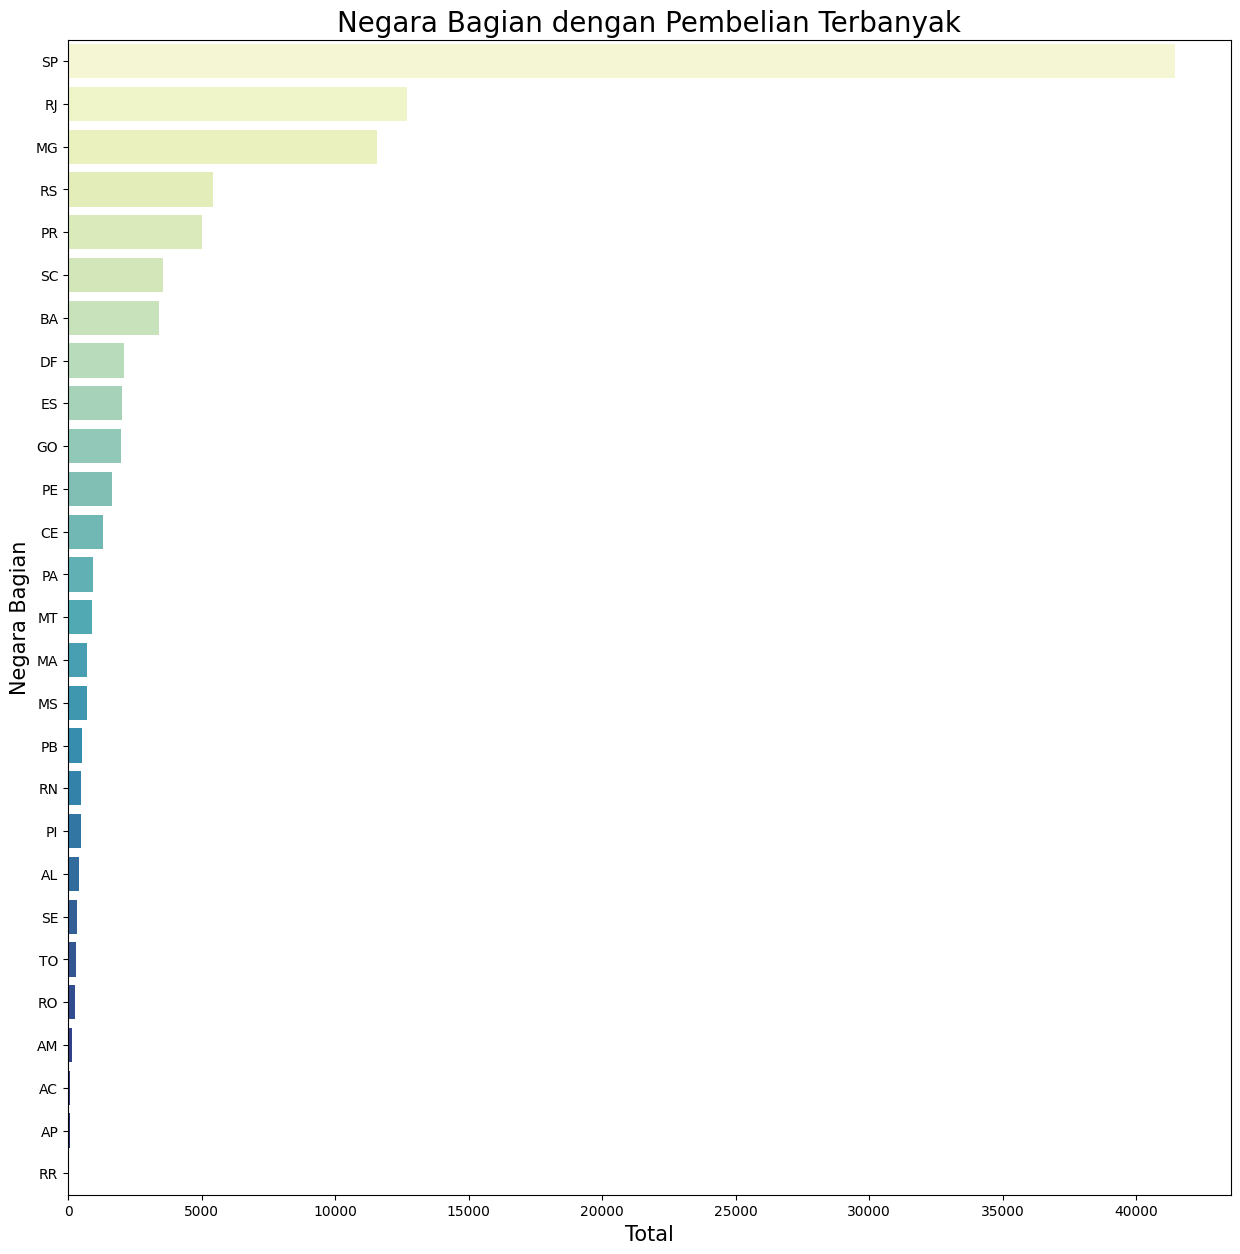

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot(y="customer_state", data=df,
order=df['customer_state'].value_counts().index, palette='YlGnBu')
plt.title('Negara Bagian dengan Pembelian Terbanyak', size=20)
plt.xlabel('Total', size=15)
plt.ylabel('Negara Bagian', size=15)
plt.show()

Terlihat dari barplot diatas, bahwa negara bagian dengan pembelian terbanyak berada di Sao Paulo.

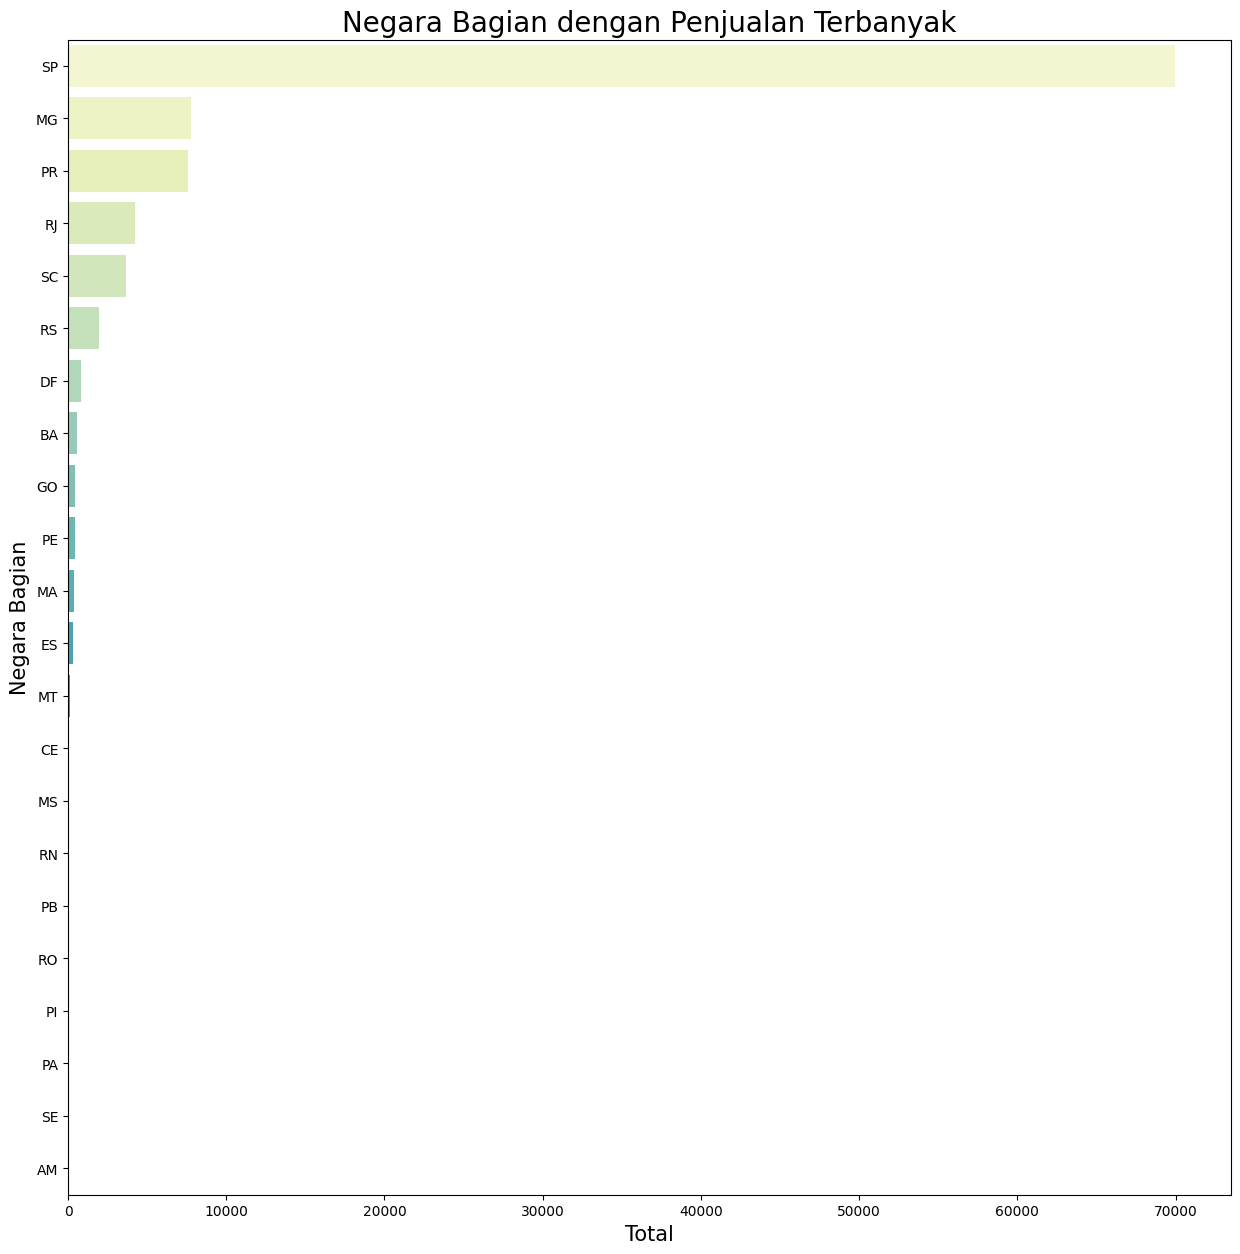

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot(y="seller_state", data=df,
order=df['seller_state'].value_counts().index, palette='YlGnBu')
plt.title('Negara Bagian dengan Penjualan Terbanyak', size=20)
plt.xlabel('Total', size=15)
plt.ylabel('Negara Bagian', size=15)
plt.show()

In [ ]:
df[df['customer_state']!= df['seller_state']]['freight_value'].mean()

23.940890291753682

In [ ]:
df[df['customer_state']== df['seller_state']]['freight_value'].mean()

13.56132986983652

In [ ]:
df[df['customer_state']!= df['seller_state']].shape[0]/df.shape[0]*100

64.08777035317021

Terlihat dari barplot diatas, bahwa negara bagian dengan penjual terbanyak berada di Sao Paulo.
Dari kedua grafik tersebut ada keterhubungan dimana pembelian dan penjual terbanyak berada di
Sao Paulo, hal tersebut wajar dimana jumlah populasi terbesar di negara bagian Brazil terdapat di
Sao Paulo, dan dari analisis rata-rata ongkos pengiriman untuk ke sesama negara bagian dan ke luar
negara bagian terdapat perbedaan dua kali lipat biaya yang harus dikeluarkan pelanggan, dan juga
sebagian besar atau lebih tepatnya 64% pelanggan Olist melakukan pembelian dari negara bagian
yang berbeda.
sehingga dapat di indikasikan bahwa ;
1. kemungkinan biaya ongkir yang mahal merupakan faktor pelanggan tidak melakukan
pembelian berulang.
2. ketidak tersediaan produk dalam satu negara bagian yang mengaharuskan pembelian di
negara bagian yang berbeda merupakan kemungkinan faktor pelanggan tidak melakukan
pembelian berulang.
dari hal tersebut dapat direkomendasikan :
1. pembuatan campaign untuk meningkatkan jumlah seller di berbagai negara bagian
2. sales promotion gratis ongkir untuk semua negara bagian

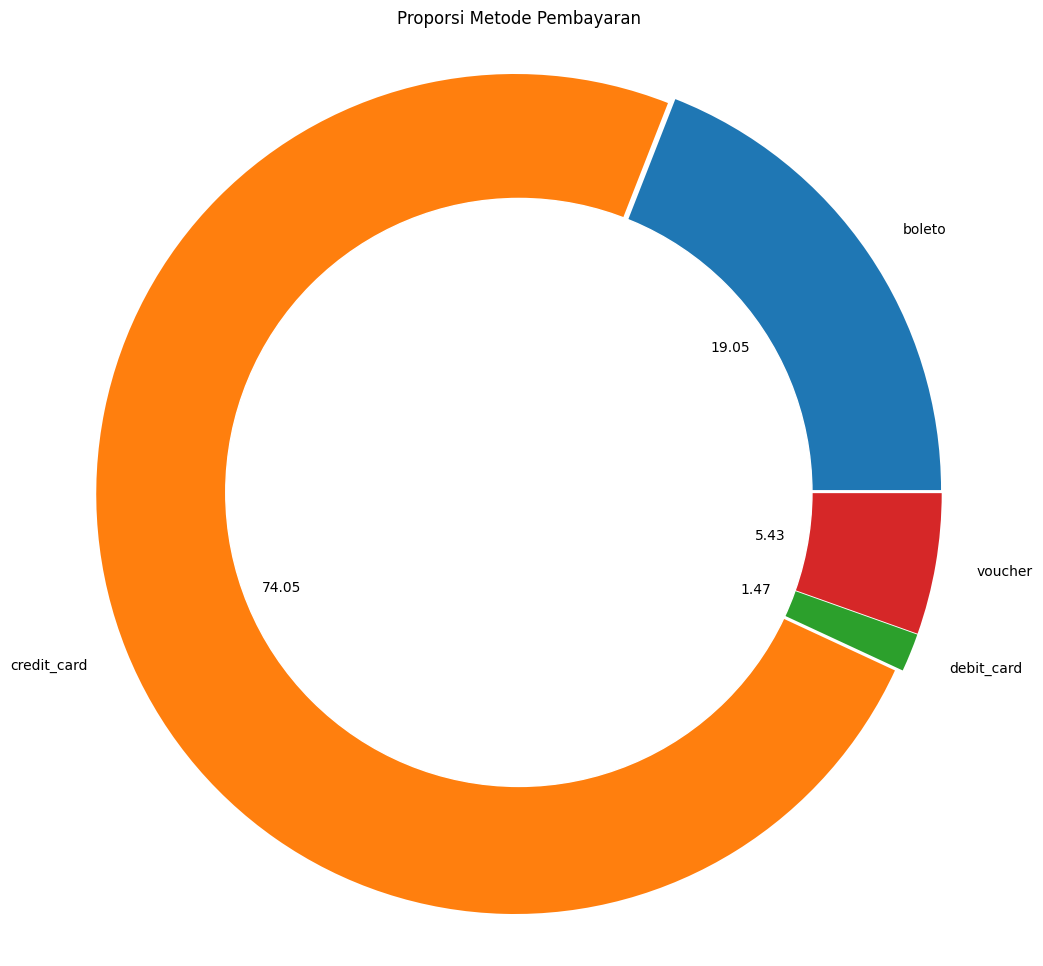

In [ ]:
plt.figure(figsize=(12,12))
df.groupby('payment_type').size().plot(kind='pie', autopct='%.2f',
explode=(0.01,0.01,0.01,0.01))
plt.title('Proporsi Metode Pembayaran')
plt.axis('equal')
my_circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Dari informasi yang tercantum di dalam www.adyen.com, Konsumen Brasil adalah pengguna setia
kartu kredit, dengan mayoritas lebih memilih kartu kredit untuk pembelian online mereka.
Bersamaan dengan Visa dan Mastercard, skema kartu lokal ELO dan Boleto Bancário semakin
populer. Dan jika dilihat dari visualisasi diatas, Proporsi tipe pembayaran di dominasi oleh kartu
kredit dan boleto. Maka, rekomendasi yang dapat di berikan adalah pemberian voucher khusus &
diskon yang berlaku pada pembelian dengan metode pembayaran kartu kredit dan boleto.

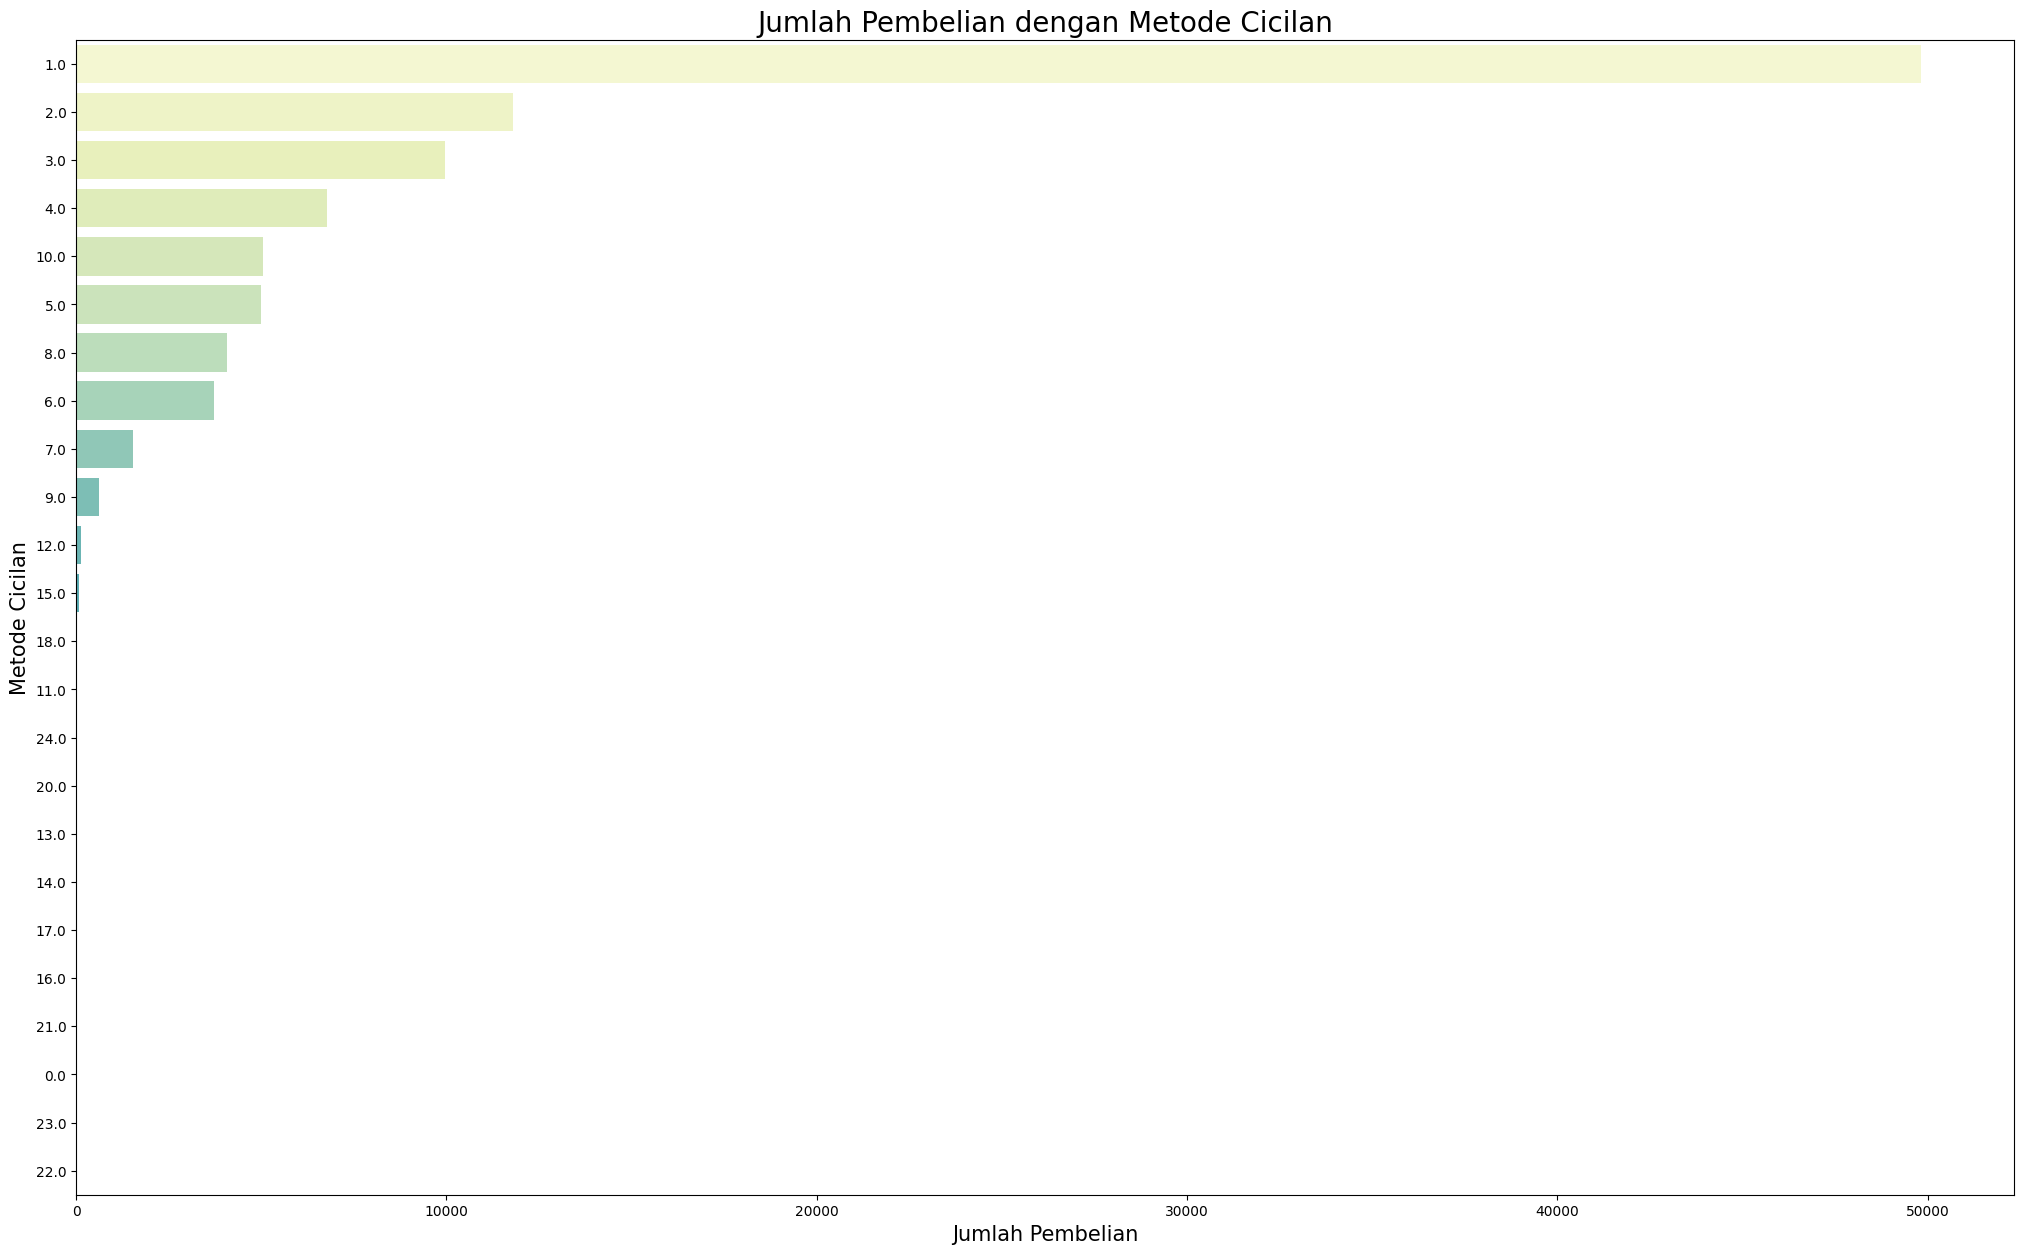

In [ ]:
plt.figure(figsize=(25,15))
sns.countplot(y="payment_installments", data=df,
order=df['payment_installments'].value_counts().index, palette='YlGnBu')
plt.title('Jumlah Pembelian dengan Metode Cicilan', size=20)
plt.xlabel('Jumlah Pembelian', size=15)
plt.ylabel('Metode Cicilan', size=15)
plt.show()

Dapat dilihat dari barplot diatas, bahwa sebagian besar transaksi yang dilakukan oleh pelanggan
Olist dengan metode tanpa cicilan.

berdasarkan informasi yang didapat dari situs https://www.adyen.com/ bahwa 80% transaksi di e-
commerce dengan rata-rata transaksi tinggi, pelanggan lebih memilih pembayaran dengan metode

cicilan. Sehingga dari grafik di atas menunjukan sebagian transaksi di e-commerce olist merupakan
transaksi dengan rata-rata bernilai rendah.
Sehingga dalam aktivitas pemasaran dapat di adakan :
1. sales promotion khusus, seperti potongan harga dengan minimal transaksi yang cukup tinggi
sehingga pelanggan lebih tertarik untuk berbelanja dan mengeluarkan lebih banyak uang
untuk membeli suatu barang.
2. Broadcast message, ketika pelanggan memiliki product yang belum di check out dalam
keranjang nya maka akan mendapatkan pesan persuasif untuk melakukan pembayaran.
3. Push Notification, pemberian notifikasi terhadap informasi-informasi menarik seputar
promo atau ketersediaan produk.

In [ ]:
df['shipping_duration']=(df['order_delivered_customer_date'].dt.to_period('D')-
df['order_delivered_carrier_date'].dt.to_period('D')).apply(attrgetter('n'))
df['estimate_shipping_duration']=(df['order_estimated_delivery_date'].dt.to_period('D')-
df['order_delivered_carrier_date'].dt.to_period('D')).apply(attrgetter('n'))

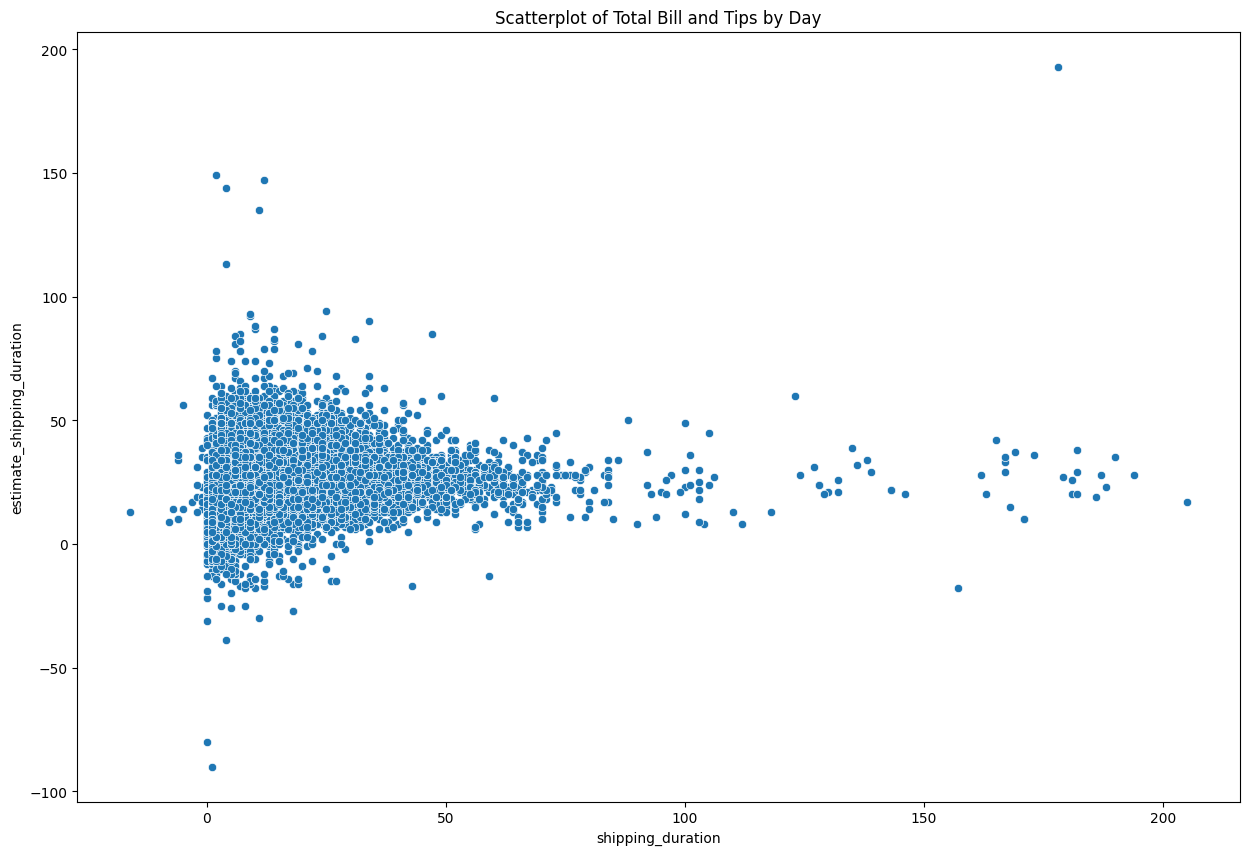

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df,x='shipping_duration',y='estimate_shipping_duration')
plt.title('Scatterplot of Total Bill and Tips by Day')
plt.show()

In [ ]:
df['shipping_acc']=df['estimate_shipping_duration']-df['shipping_duration']

In [ ]:
df[df['shipping_acc']<0].shape[0]/df.shape[0]*100

6.615223938106489

In [ ]:
df[df['shipping_acc']!=0].shape[0]/df.shape[0]*100

98.67776639863722

In [ ]:
df[df['shipping_acc']>7].shape[0]/df.shape[0]*100

74.12518631934375

In [ ]:
df['shipping_duration'].mean()

9.262783788442624

In [ ]:
df['estimate_shipping_duration'].mean()

21.199926993236733

Dapat dilihat dari visualisasi di atas, kita dapat melihat :
• 98% waktu pengiriman tidak sesuai dengan estimasi pengiriman.
• 6% dari transaksi yang waktu pengiriman nya lebih lama dari estimasi pengiriman.
• 74% waktu estimasi pengiriman melebihi 7 hari perbedaan dengan waktu pengiriman
sebenarnya.
Apakah waktu estimasi pengiriman yang terlalu lama menjadi penyebab pelanggan tidak melakukan
pembelian berulang? dari analisis rata-rata estimasi pengiriman terdapat perbedaan cukup jauh
yaitu dua kali lebih lama dari waktu pengiriman aktual.
• rata- rata waktu estimasi pengiriman 21 hari
• rata-rata waktu pengiriman aktuan 9 hari
hal tersebut mungkin mempengaruhi minat planggan untuk berbelanja karena estimasi waktu yang
terlalu lama. Diperlukan perbaikan performa dalam memberikan estimasi waktu pengiriman agar
pelanggan nyaman untuk berbelanja di e-commerce Olist.
jika dikaitkan dengan analisis seller dan customer state bahwa 64% transaksi dilakukan di negara
bagian yang berbeda, dapat direkomendasikan sebagai berikut :
1. peningkatan kualitas estimasi sehingga akurasi estimasi lebih baik.
2. peningkatan jasa pengiriman dan menambahkan mitra pengiriman yang lebih berkualitas.
3. menambahkan fasilitas tracking barang agar pelanggan lebih nyaman berbelanja.
4. membuat warehousing agar pengiriman dapat di optimalkan

Costumers Segmentation

**Clustering With Main DataFrame Using KMeans**
Numerical Features Untuk Numerical Features, traetment yang diberikan adalah di Scaling
menggunakan StandardScaller:
• order_item_id
• price
• freight_value
• payment_sequential
• payment_installments

In [ ]:
X=df[['order_item_id','price','freight_value','payment_sequential','payment_installments','payment_value']]

In [ ]:
X.head()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value
0,1.0,29.99,8.72,1.0,1.0,18.12
1,1.0,29.99,8.72,3.0,1.0,2.00
2,1.0,29.99,8.72,2.0,1.0,18.59
3,1.0,29.99,7.78,1.0,3.0,37.77
4,1.0,29.99,7.78,1.0,1.0,37.77


In [ ]:
scaler=StandardScaler()
pca=PCA(n_components=2)
pipeline=Pipeline([
 ('preprocess',scaler),
 ('PCA',pca)
])

In [ ]:
X_pca=pipeline.fit_transform(X)

In [ ]:
variance=[]

In [ ]:
X_pca=pd.DataFrame(X_pca, columns=['first component','second component'])
X_pca.head()

,first component,second component
0,-1.209848,-0.016713
1,-1.406467,2.230273
2,-1.284190,1.107135
3,-0.925971,-0.262590
4,-1.179512,-0.027132


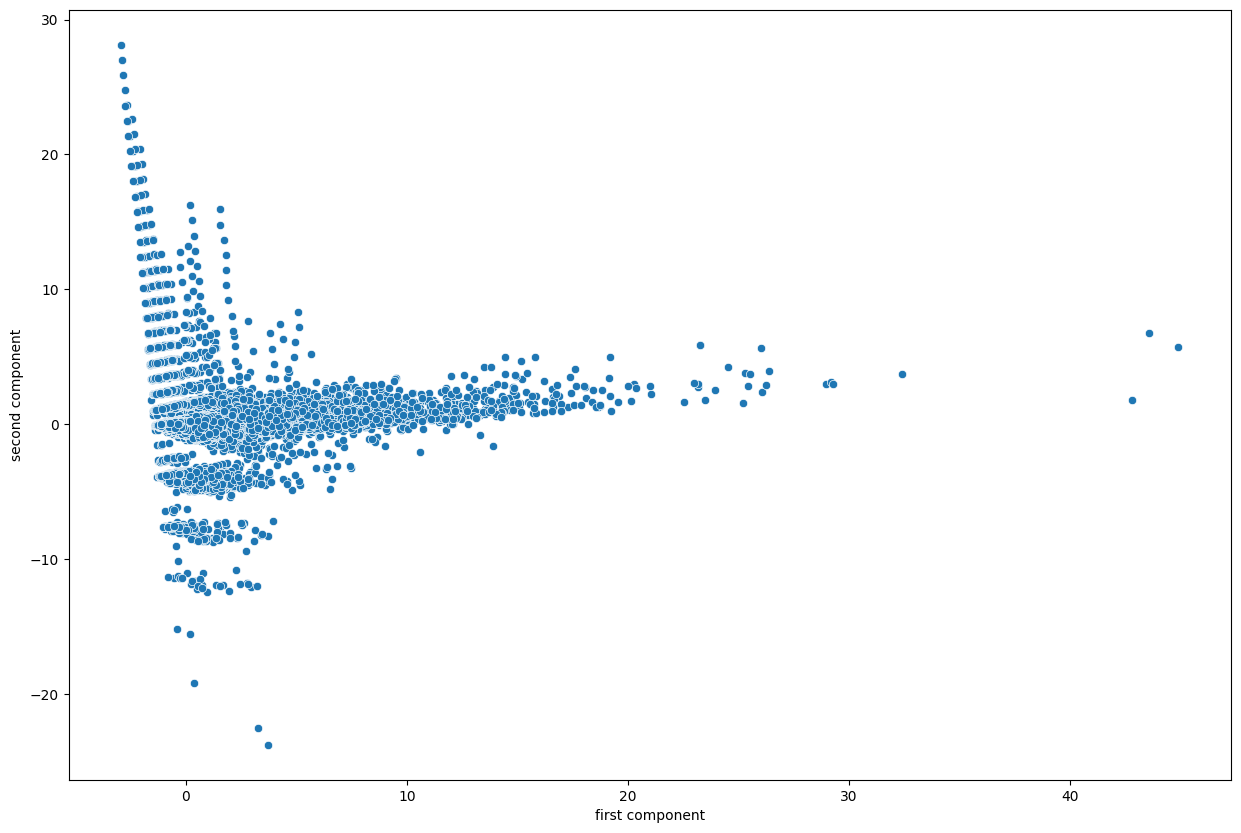

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='first component',y='second component', data=X_pca)
plt.show()

In [ ]:
score=[]
k_num= range(2,8)
best=0

for i in k_num:
 kmean=KMeans(n_clusters=i)
 kmean.fit(X_pca)
 labels=kmean.labels_
 sil_score=(silhouette_score(X_pca,labels,metric='euclidean'))
 score.append(sil_score)

 if best<sil_score:best=sil_score
 best_k=i

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

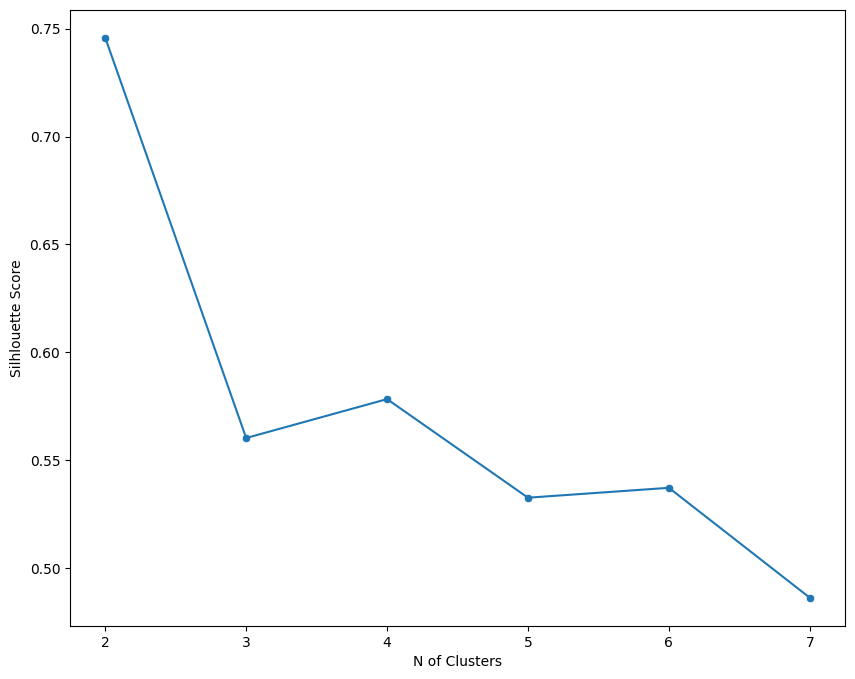

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(x=k_num,y=score)
sns.scatterplot(x=k_num,y=score)
plt.xticks(k_num)
plt.ylabel('Silhlouette Score')
plt.xlabel('N of Clusters')
plt.show()

Hasil dari sillhouette score diatas, menunjukan bahwa N cluster dengan score terbesar adalah 2
cluster, tetapi dalam kasus ini, kita membutuhkan lebih dari 2 cluster untuk mengelompokan

konsumen agar kita dapat mendapatkan cluster yang lebih spesifik. Sehingga kita memilih cluster
yang memiliki sillhouette score kedua terbesar yaitu 5 cluster. Dari hasil pemilihan 5 cluster
tersebut kita dapat memberikan aktifitas marketing yang lebih tepat dan spesifik kepada setiap
kelompok konsumen/cluster agar lebih efektif dan efisien.

In [ ]:
kmeans=KMeans(n_clusters=5, random_state=2020)
kmeans.fit(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=2020)

In [ ]:
X['cluster']=kmeans.labels_

<ipython-input-86-5f7bf091301c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster']=kmeans.labels_


In [ ]:
X_pca['cluster']=kmeans.labels_

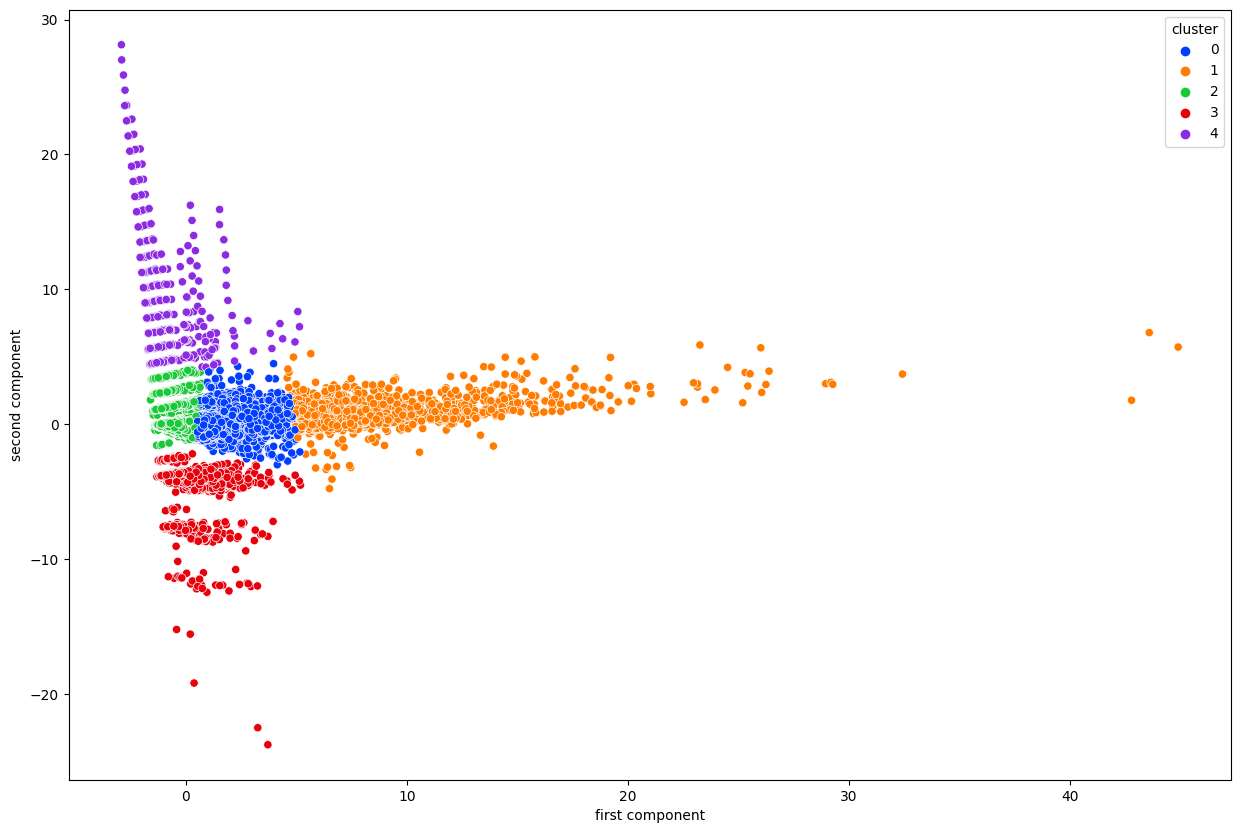

In [ ]:

plt.figure(figsize=(15,10))
sns.scatterplot(x='first component',y='second component',hue='cluster',data=X_pca,palette='bright')
plt.show()

In [ ]:
X.groupby('cluster').mean()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value
cluster,,,,,,
0,1.000158,250.699698,31.443918,1.015410,5.830545,302.964299
1,1.006250,1142.258437,73.780875,1.025625,7.030000,1277.322469
2,1.000145,73.296416,16.323220,1.057457,2.019008,91.660757
3,2.143650,77.814795,16.994483,1.036780,3.918112,223.152734
4,1.000000,142.012442,23.913411,7.991023,1.000000,19.612011


Dari hasil clustering di atas, dapat di rekomendasikan untuk kegiatan pemasaran yang tepat kepada
setiap cluster nya sebagai berikut :
1. Cluster 0 : pelanggan dengan kuantitas pembelian barang rata-rata 1, dengan harga barang
rata-rata sedang dan ongkir juga sedang, pembayaran dilakukan rata-rata dengan tipe
pembayaran 1 tipe dan rata-rata dilakukan 5 sampai 6 kali cicilan, dan total belanja rata-rata
sedang. Cluster ini merupakan pelanggan yang membutuhkan perhatian berdasarkan tingkat
pembelian yang sedang, kuantitas yang sedikit, serta melakukan cicilan untuk
pembayaranya, maka untuk menarik perhatian dan mendapatkan kepercayaan dari cluster
ini, direkomendasikan sebagai berikut ;
• Pemberian voucer belanja dengan minimal transaksi
• Pemberian promo cicilan tanpa bunga
• Pemberian notifikasi mengenai campaign dan promo menarik
2. Cluster 1 : pelanggan dengan kuantitas pembelian barang rata-rata 1, dengan harga barang
rata-rata tinggi dan ongkir juga tinggi, pembayaran dilakukan rata-rata dengan tipe
pembayaran 1 tipe dan rata-rata dilakukan 7 kali cicilan, dan total belanja rata-rata tinggi.
Cluster ini merupakan pelanggan berpotensi yang harus kita jaga berdasarkan tingkat daya
beli yang tinggi, sehinga dapat direkomendasikan untuk cluster ini sebagai berikut :
• Pemberian voucer gratis ongkir atau potongan biaya pengiriman
• Pemberian promo cicilan tanpa bunga
• Pemberian notifikasi mengenai campaign dan promo menarik
3. Cluster 2 : pelanggan dengan kuantitas pembelian barang rata-rata 1, dengan harga barang
rata-rata rendah dan ongkir juga rendah, pembayaran dilakukan rata-rata dengan tipe

pembayaran 1 tipe dan rata-rata dilakukan 2 kali pembayaran/cash, dan total belanja rata-
rata rendah. Cluster ini merupakan pelanggan dengan daya beli rendah, untuk meningkatkan

daya beli dari cluster tersebut dapat direkomendasikan sebagai berikut :
• Pemberian sales promotion seperti potongan harga
• Pemberian voucer belanja dengan minimal transaksi
• Pemberian notifikasi mengenai campaign dan promo menarik
4. Cluster 3 : pelanggan dengan kuantitas pembelian barang rata-rata 2, dengan harga barang
rata-rata rendah dan ongkir juga rendah, pembayaran dilakukan rata-rata dengan tipe
pembayaran 1 tipe dan rata-rata dilakukan 3 sampai 4 kali cicilan, dan total belanja rata-rata
sedang. Cluster ini merupakan pelanggan dengan metode pembayaran dilakukan sampai 4
kali tetapi pembelian nya rendah, untuk menarik perhatian cluster ini, dapat
direkomendasikan sebagai berikut :
• Pemberian voucer spesial potongan harga
• Pemberian promo cicilan tanpa bunga
• Pemberian notifikasi mengenai campaign dan promo menarik
5. Cluster 4 : pelanggan dengan kuantitas pembelian barang rata-rata 1, dengan harga barang
rata-rata sedang dan ongkir juga sedang, pembayaran dilakukan rata-rata dengan tipe
pembayaran 7 sampai 8 tipe dan rata-rata dilakukan 1 kali pembayaran/cash, dan total
belanja rata-rata rendah. Cluster ini merupakan pelanggan dengan tipe pembayaran yang
variatif, sehingga untuk menarik perhatian pelanggan tersebut, dapat direkomendasikan
sebagai berikut :
• Pemberian voucer potongan harga dengan tipe pembayaran tertentu
• Pemberian voucer gratis ongkir atau potongan biaya pengiriman
• Pemberian notifikasi mengenai campaign dan promo menarik

Diharapkan dengan setiap rekomendasi untuk mempermudah team pemasaran melakukan aktivitas
kepada setiap clusternya dan pelanggan lebih terpacu untuk berbelanja kembali.

**RFM Data Preparation**

RFM Data Preparation adalah proses persiapan data sebelum melakukan analisis RFM (Recency, Frequency, Monetary). Langkah-langkah dalam RFM Data Preparation meliputi:

Data Collection: Mengumpulkan data transaksi pelanggan yang diperlukan, termasuk tanggal transaksi, ID pelanggan, dan jumlah transaksi.

Recency Calculation: Menghitung recency (keterbaruan) dari setiap transaksi terakhir pelanggan. Tentukan tanggal referensi, yang biasanya merupakan tanggal terbaru dalam dataset Anda. Hitung jumlah hari antara tanggal referensi dan transaksi terakhir masing-masing pelanggan. Semakin pendek recency, semakin baik, karena menunjukkan transaksi yang lebih baru.

Frequency Calculation: Menghitung frekuensi pembelian pelanggan. Hitung jumlah transaksi untuk setiap pelanggan dalam periode waktu tertentu. Semakin tinggi frekuensi, semakin sering pelanggan melakukan pembelian.

Monetary Calculation: Menghitung nilai moneter dari setiap transaksi pelanggan. Jumlahkan total nilai transaksi untuk setiap pelanggan.

In [ ]:

df_rfm=df[['order_id','customer_unique_id','price','order_purchase_timestamp']].copy()

In [ ]:
df_rfm['frequency']=1
df_rfm.head()

,order_id,customer_unique_id,price,order_purchase_timestamp,frequency
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,29.99,2017-10-02 10:56:33,1
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,29.99,2017-10-02 10:56:33,1
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,29.99,2017-10-02 10:56:33,1
3,128e10d95713541c87cd1a2e48201934,3a51803cc0d012c3b5dc8b7528cb05f7,29.99,2017-08-15 18:29:31,1
4,0e7e841ddf8f8f2de2bad69267ecfbcf,ef0996a1a279c26e7ecbd737be23d235,29.99,2017-08-02 18:24:47,1


In [ ]:
df_rfm=df_rfm.groupby(['customer_unique_id']).aggregate({'order_id' :'first', 'price' : 'sum', 'order_purchase_timestamp' : 'max' ,'frequency' :'sum'}).reset_index()
df_rfm

,customer_unique_id,order_id,price,order_purchase_timestamp,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,129.90,2018-05-10 10:56:27,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,18.90,2018-05-07 11:11:27,1
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,69.00,2017-03-10 21:05:03,1
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,25.99,2017-10-12 20:29:41,1
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,180.00,2017-11-14 19:45:42,1
...,...,...,...,...,...
91440,fffcf5a5ff07b0908bd4e2dbc735a684,725cf8e9c24e679a8a5a32cb92c9ce1e,680.00,2017-06-08 21:00:36,1
91441,fffea47cd6d3cc0a88bd621562a9d061,c71b9252fd7b3b263aaa4cb09319a323,64.89,2017-12-10 20:07:56,1
91442,ffff371b4d645b6ecea244b27531430a,fdc45e6c7555e6cb3cc0daca2557dbe1,89.90,2017-02-07 15:49:16,1
91443,ffff5962728ec6157033ef9805bacc48,94d3ee0bc2a0af9d4fa47a4d63616e8d,115.00,2018-05-02 15:17:41,1


In [ ]:
df_rfm[['price']]

,price
0,129.90
1,18.90
2,69.00
3,25.99
4,180.00
...,...
91440,680.00
91441,64.89
91442,89.90
91443,115.00


In [ ]:
df_rfm.shape[0]

91445

In [ ]:
df_rfm['order_purchase_timestamp'].max()

Timestamp('2018-08-29 15:00:37')

In [ ]:
Timestamp('2018-08-29 15:00:37')

Timestamp('2018-08-29 15:00:37')

In [ ]:
setpoint=pd.to_datetime(df_rfm['order_purchase_timestamp'].max())

In [ ]:
df_rfm['order_purchase_timestamp']=pd.to_datetime(df_rfm['order_purchase_timestamp'])

In [ ]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91445 entries, 0 to 91444
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_unique_id        91445 non-null  object        
 1   order_id                  91445 non-null  object        
 2   price                     91445 non-null  float64       
 3   order_purchase_timestamp  91445 non-null  datetime64[ns]
 4   frequency                 91445 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 3.5+ MB


In [ ]:

df_rfm['recency']=df_rfm['order_purchase_timestamp'].apply(lambda x :
setpoint-x).astype('timedelta64[D]')

**EDA RFM**

EDA RFM (Exploratory Data Analysis for RFM) adalah proses eksplorasi data yang dilakukan sebelum menerapkan analisis RFM (Recency, Frequency, Monetary). Tujuan dari EDA RFM adalah untuk memahami karakteristik data transaksi pelanggan, mengidentifikasi pola atau anomali, dan mendapatkan wawasan awal sebelum melakukan segmentasi pelanggan menggunakan RFM.

Beberapa langkah yang dapat dilakukan dalam EDA RFM meliputi:

Data Understanding: Memahami struktur data transaksi pelanggan, melihat jumlah kolom, tipe data, dan memeriksa apakah ada missing values atau outliers.

Descriptive Statistics: Melakukan analisis statistik deskriptif pada variabel RFM (Recency, Frequency, Monetary) seperti mean, median, standar deviasi, nilai minimum, dan maksimum. Ini akan memberikan gambaran awal tentang distribusi data dan rentang nilai pada masing-masing variabel.

Data Visualization: Menggunakan visualisasi grafis seperti histogram, box plot, scatter plot, atau line plot untuk memvisualisasikan distribusi dan hubungan antar variabel RFM. Ini dapat membantu dalam mengidentifikasi pola atau outlier dalam data.

Segment Identification: Menggunakan teknik pengelompokan atau clustering seperti K-means atau hierarchical clustering untuk mengidentifikasi segmen pelanggan berdasarkan variabel RFM. Ini membantu dalam memahami perilaku dan kebutuhan pelanggan yang berbeda.



In [ ]:
rfm=df_rfm[['customer_unique_id','recency','frequency','price']].rename(columns = {'price':'monetary'}).copy()
rfm.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111.0,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114.0,1,18.90
2,0000f46a3911fa3c0805444483337064,536.0,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,320.0,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,287.0,1,180.00


In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91445 entries, 0 to 91444
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  91445 non-null  object 
 1   recency             91445 non-null  float64
 2   frequency           91445 non-null  int64  
 3   monetary            91445 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.8+ MB


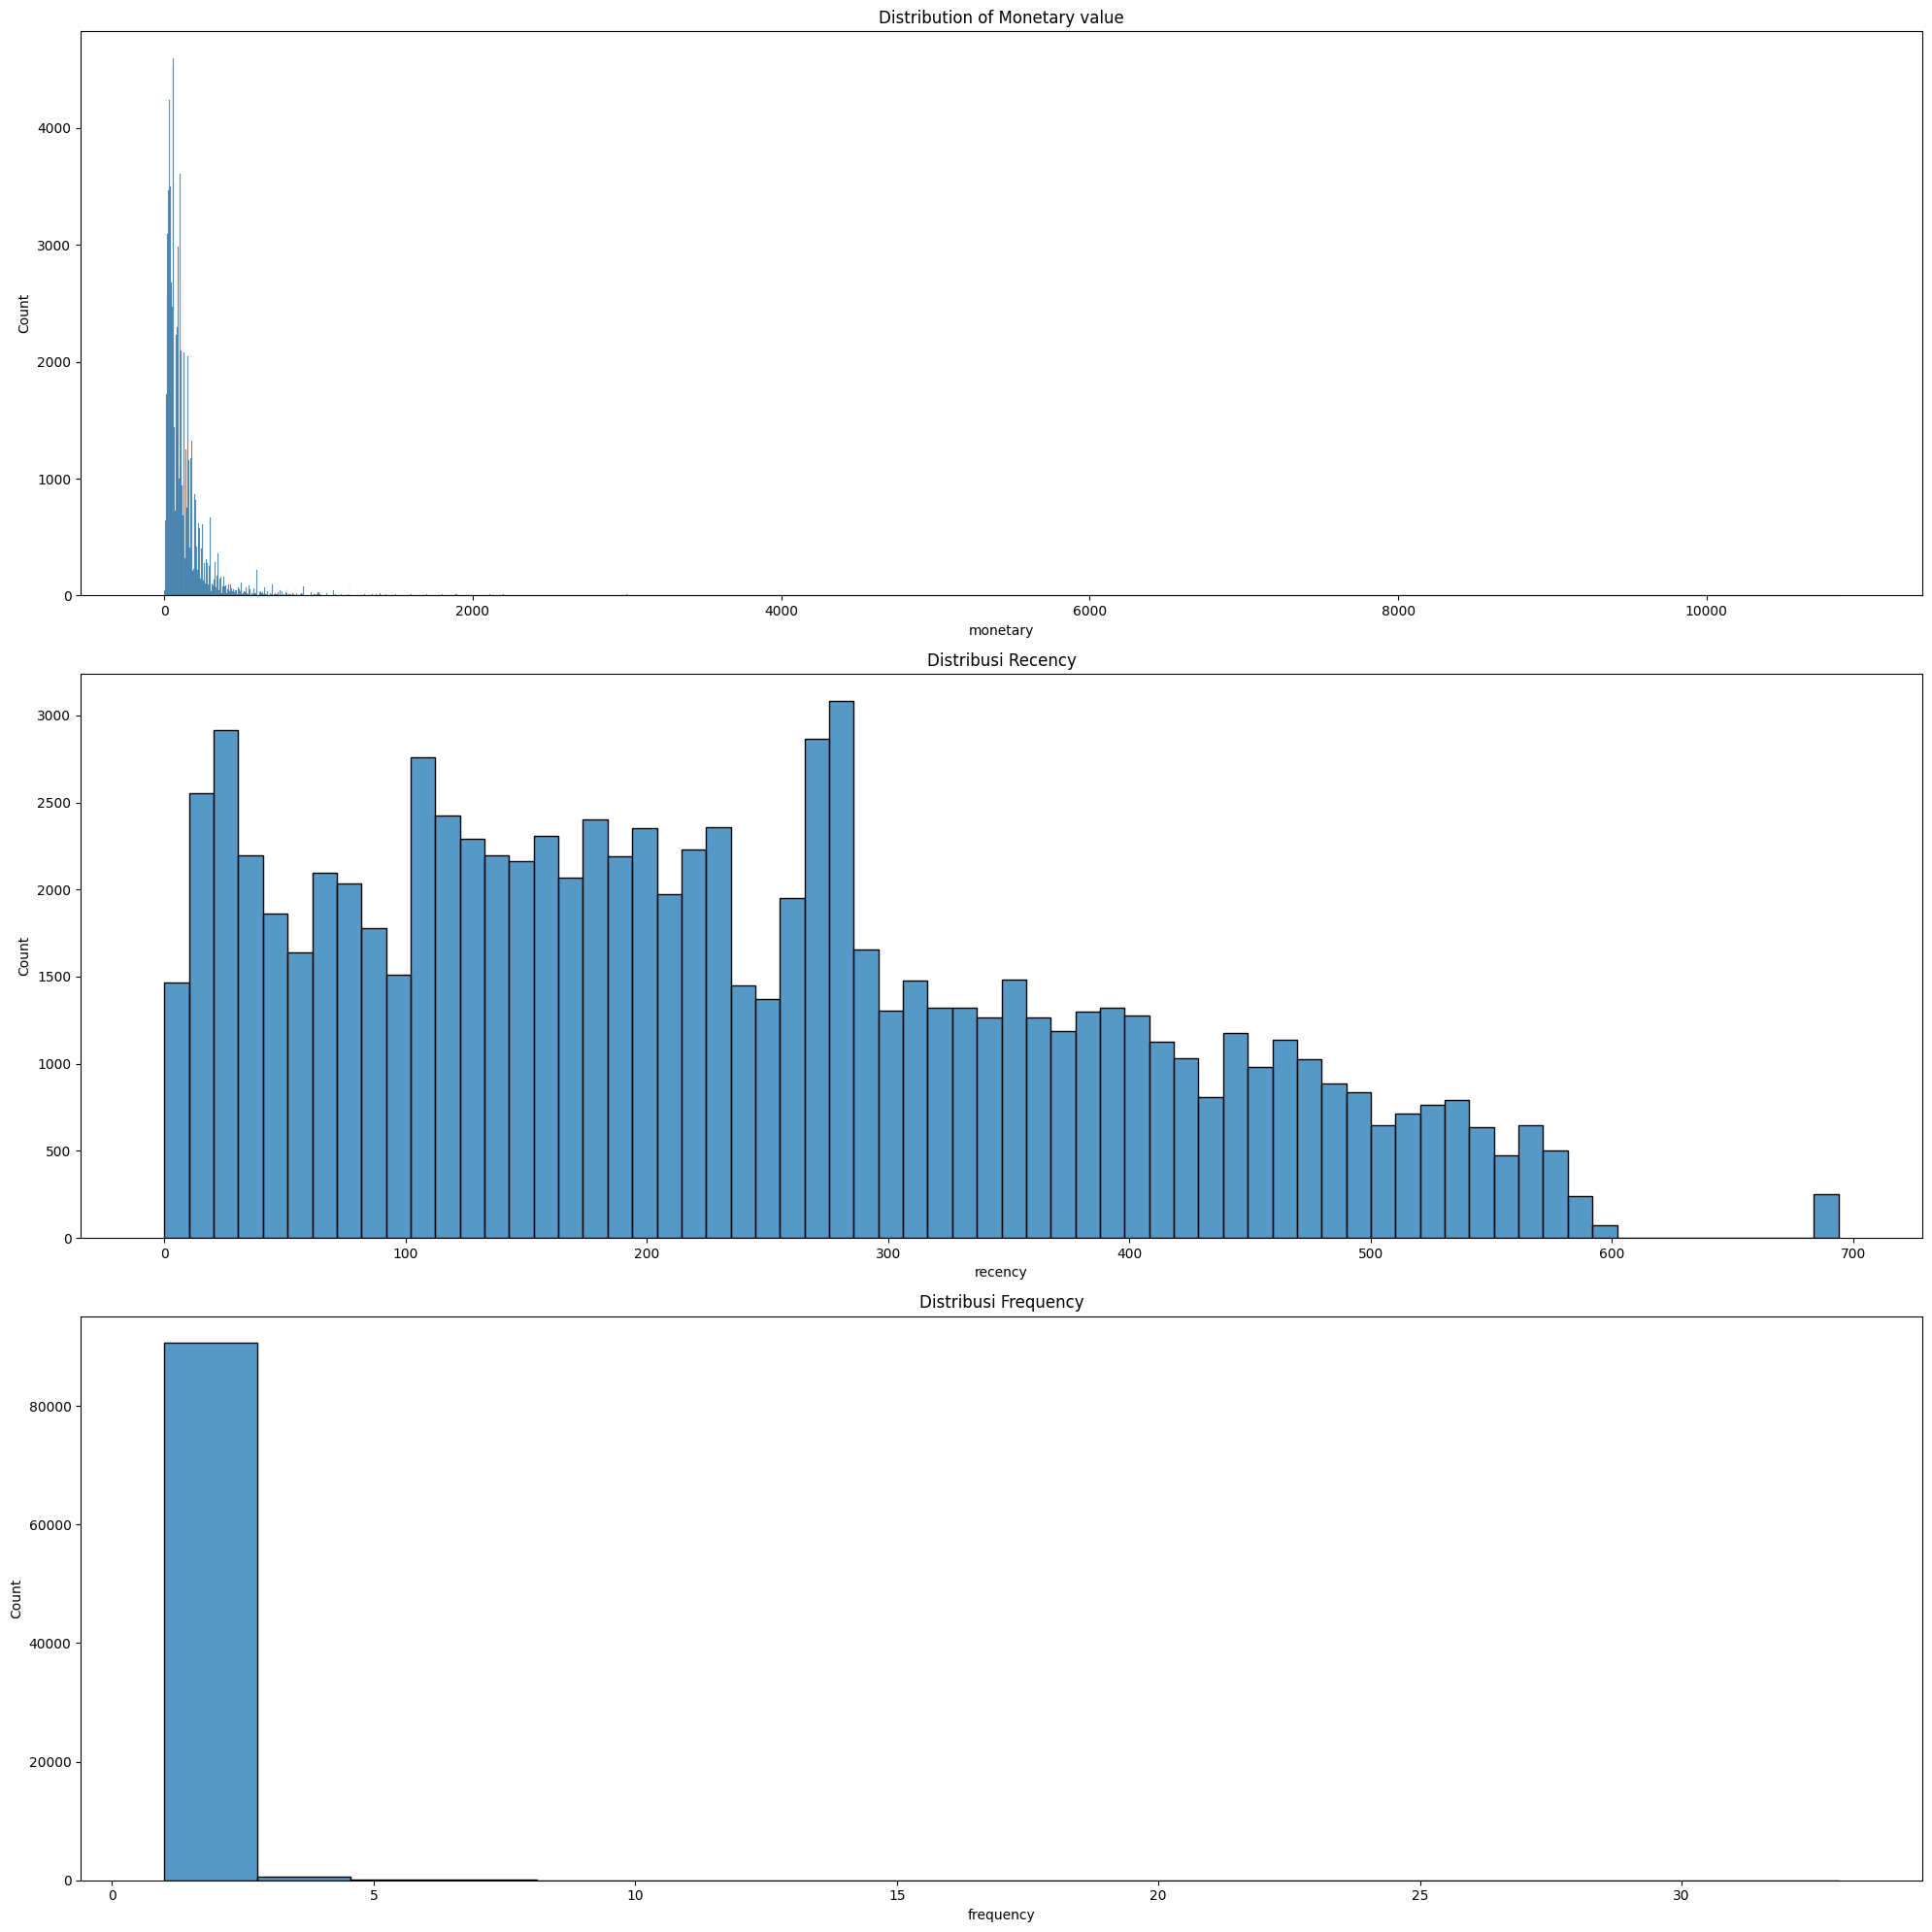

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
sns.histplot(data=rfm['monetary'])
plt.title('Distribution of Monetary value')
plt.subplot(3,1,2)
sns.histplot(data=rfm['recency'])
plt.title('Distribusi Recency')
plt.subplot(3,1,3)
sns.histplot(data=rfm['frequency'])
plt.title('Distribusi Frequency')
plt.tight_layout()

Dari histplot diatas terlihat bahwa kolom recency, monetary, dan frequency datanya terdistribusi
tidak normal, karena itu kita akan menggunakan median untuk menentukan titik tengah / central
tendency nya.

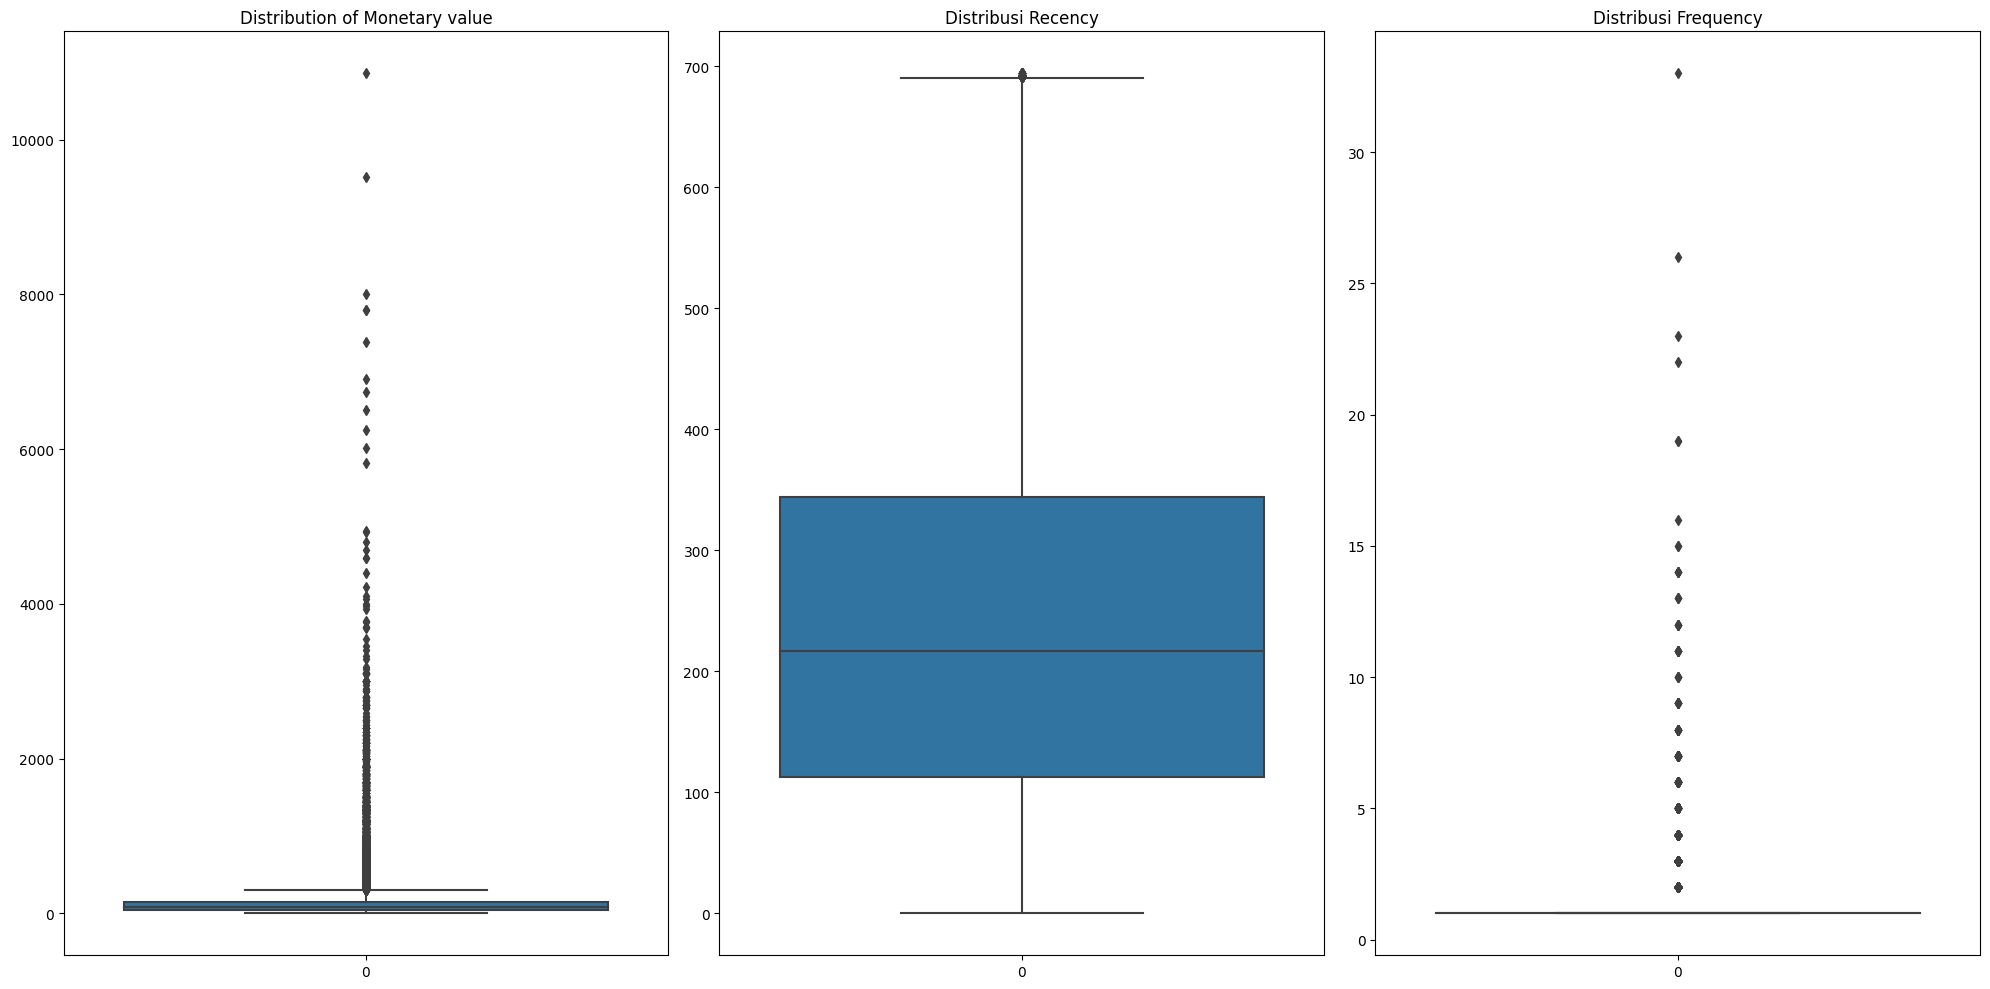

In [ ]:

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.boxplot(data=rfm['monetary'])
plt.title('Distribution of Monetary value')
plt.subplot(1,3,2)
sns.boxplot(data=rfm['recency'])
plt.title('Distribusi Recency')
plt.subplot(1,3,3)
sns.boxplot(data=rfm['frequency'])
plt.title('Distribusi Frequency')
plt.tight_layout()

boxplot kolom monetary dan frequency tidak dapat dibaca karena memiliki outlier yang nilainya
jauh

In [ ]:
df_rfm['frequency'].value_counts(normalize=True)

1     0.941921
2     0.048729
3     0.005566
4     0.001673
5     0.000733
6     0.000492
7     0.000317
8     0.000131
9     0.000087
11    0.000077
12    0.000055
10    0.000044
14    0.000044
13    0.000033
19    0.000022
15    0.000022
22    0.000011
16    0.000011
26    0.000011
33    0.000011
23    0.000011
Name: frequency, dtype: float64

In [ ]:
rfm.describe()

,recency,frequency,monetary
count,91445.000000,91445.000000,91445.000000
mean,236.083121,1.078473,135.002522
std,152.582188,0.446407,220.518631
min,0.000000,1.000000,0.850000
25%,113.000000,1.000000,44.900000
50%,217.000000,1.000000,80.000000
75%,344.000000,1.000000,149.000000
max,694.000000,33.000000,10856.100000


RFM Cluster Segmentation
Dari visualisasi diatas dapat dilihat bahwa banyak pengguna yang hanya melakukan 1 kali transaksi
yaitu sebesar 94% dari seluruh pengguna di Olist marketplace. Karena terdapat 21 nunique pada
nilai frequency dan nilai Q1,Q2 dan Q3 nya memiliki nilai yang sama besar (1) maka akan dilakukan
pembagian sebagai berikut:
• Customer dengan frequency pembelian <=5 akan diberikan label frequency 1
• Customer dengan frequency pembelian 6-10 akan diberikan label frequency 2
• Customer dengan frequency pembelian 11-15 akan diberikan label frequency 3
• Customer dengan frequency pembelian >=16 akan diberikan label frequency 4
Sedangkan pada monetary dan recency akan dilakukan pembagian sebagai berikut :
• Customer dengan nilai monetary dan recency nya masing-masing <= Q1 akan diberikan label
1
• Customer dengan nilai monetary dan recency nya masing-masing > Q1 & <= median akan
diberikan label 2
• Customer dengan nilai monetary dan recency nya masing-masing > median & <= Q3 akan
diberikan label 3
• Customer dengan nilai monetary dan recency nya masing-masing > Q3 akan diberikan label
4

In [ ]:
def rfm_price(x):
    lower_quartil=rfm['monetary'].quantile(.25)
    median=rfm['monetary'].median()
    upper_quartil=rfm['monetary'].quantile(.75)
    if x<=lower_quartil:
        val=1
    elif lower_quartil<x<=median:
        val=2
    elif median<x<=upper_quartil:
        val=3
    else:
        val=4
    return val

def rfm_recency(x):
    lower_quartil=rfm['recency'].quantile(.25)
    median=rfm['recency'].median()
    upper_quartil=rfm['recency'].quantile(.75)
    if x<=lower_quartil:
        val=1
    elif lower_quartil<x<=median:
        val=2
    elif median<x<=upper_quartil:
        val=3
    else:
        val=4
    return val

def rfm_frequency(x):
    if x<=5:
        val=1
    elif 5<x<=10:
        val=2
    elif 10<x<=15:
        val=3
    else:
        val=4
    return val

In [ ]:
rfm=rfm.assign(r= rfm['recency'].apply(lambda x : rfm_recency(x)),f= rfm['frequency'].apply(lambda x : rfm_frequency(x)),m= rfm['monetary'].apply(lambda x : rfm_price(x)))

In [ ]:
rfm['f'].value_counts()

1    91319
2       98
3       21
4        7
Name: f, dtype: int64

In [ ]:
rfm['r'].value_counts()

1    23165
4    22843
3    22747
2    22690
Name: r, dtype: int64

In [ ]:
rfm['m'].value_counts()

3    23122
1    23040
2    22761
4    22522
Name: m, dtype: int64

In [ ]:
rfm['rfm_segment']=rfm['r'].map(str)+ rfm['f'].map(str) +rfm['m'].map(str)
rfm.head()

,customer_unique_id,recency,frequency,monetary,r,f,m,rfm_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,111.0,1,129.90,1,1,3,113
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114.0,1,18.90,2,1,1,211
2,0000f46a3911fa3c0805444483337064,536.0,1,69.00,4,1,2,412
3,0000f6ccb0745a6a4b88665a16c9f078,320.0,1,25.99,3,1,1,311
4,0004aac84e0df4da2b147fca70cf8255,287.0,1,180.00,3,1,4,314


In [ ]:
rfm['rfm_segment']=rfm['rfm_segment'].map(int)

In [ ]:
rfm['rfm_score']=rfm[['r','f','m']].sum(axis=1)
rfm.head()

,customer_unique_id,recency,frequency,monetary,r,f,m,rfm_segment,rfm_score
0,0000366f3b9a7992bf8c76cfdf3221e2,111.0,1,129.90,1,1,3,113,5
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114.0,1,18.90,2,1,1,211,4
2,0000f46a3911fa3c0805444483337064,536.0,1,69.00,4,1,2,412,7
3,0000f6ccb0745a6a4b88665a16c9f078,320.0,1,25.99,3,1,1,311,5
4,0004aac84e0df4da2b147fca70cf8255,287.0,1,180.00,3,1,4,314,8


In [ ]:
rfm['rfm_score'].mean()

5.990267373831265

In [ ]:

def rfm_level(rfm):
    if((rfm['rfm_score'] >= 8) & (rfm['r'] <= 2)) :
        return 'Cant Lose Them'
    elif rfm['rfm_score'] >= 9 :
        return 'Champion'
    elif ((rfm['rfm_score'] >= 7) & (rfm['f'] >= 2)) :
        return 'Loyal Customers'
    elif rfm['rfm_score'] >= 5.992049779099777 :
        return 'Need Attention'
    elif ((rfm['rfm_score'] < 5.992049779099777) & (rfm['rfm_score'] >= 4)) :

        return 'About to Sleep'
    else:
        return 'Lost Customers'

In [ ]:
rfm['customer_segment'] = rfm.apply(rfm_level, axis=1)

In [ ]:
rfm['customer_segment'].value_counts(normalize=True)

Need Attention     0.562338
About to Sleep     0.310864
Lost Customers     0.064192
Champion           0.061983
Cant Lose Them     0.000339
Loyal Customers    0.000284
Name: customer_segment, dtype: float64

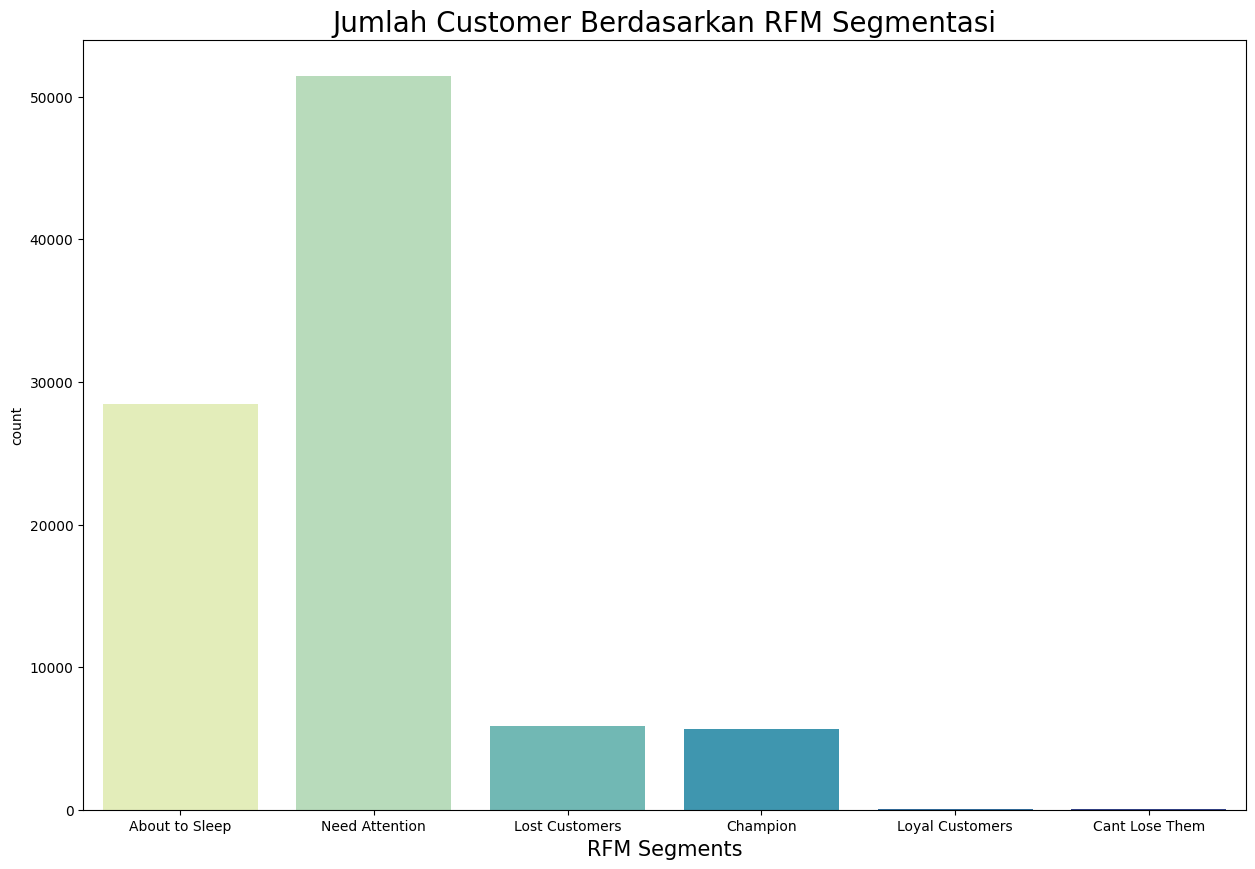

In [ ]:

plt.figure(figsize=(15,10))
sns.countplot(data=rfm, x='customer_segment',palette='YlGnBu')
plt.xlabel('RFM Segments',size=15)
plt.title('Jumlah Customer Berdasarkan RFM Segmentasi',size=20)
plt.show()

Customer Segmentation menggunakan RFM dibagi berdasarkan :
• Champion : Melakukan pembelian dalam waktu dekat, terus menerus, dan mengeluarkan
banyak uang, Mereka adalah top custemer yang mendukung perusahaan. Hubungan baik
antar Olist dan kelompok customer ini perlu dijaga agar tetap terjalin dengan baik.
Direkomendasikan untuk cluster ini sebagai berikut :
1. Menawarkan program loyalitas seperti pembagian kelompok berdasarkan frekuensi
transaksi untuk mendapatkan promo menarik di setiap pengelompokan nya.
2. Memberikan pesan personal dengan sifat persuasif dengan penawaran promo spesial atau
khusus untuk cluster tersebut
3. Memberikan kupon spesial sebagai rewardCant Lose Them : Sempat melakukan pembelian terus menerus, dan mengeluarkan banyak
uang, tetapi sudah lama tidak melakukan pembelian, Penting untuk mendapatkan kembali
minat orang-orang ini di perusahaan. Grup ini menunjukkan sebagian pelanggan yang lama
kelamaan kehilangan minat terhadap perusahaan. Oleh karena itu perusahaan perlu
mendapatkan kembali perhatian dari kelompok customer ini.
Direkomendasikan untuk cluster ini sebagai berikut :
1. Memberikan kupon spesial sebagai reward
2. Memberikan pesan personal dengan sifat persuasif dengan penawaran promo spesial atau
khusus untuk cluster tersebut
3. Memberikan push notification dan broadcast message untuk menarik perhatian
• Need Attention : Melakukan pembelian, menghabiskan uang, dan menggunakan Olist diatas
rata-rata tetapi tidak terlalu besar, Kelompok ini membutuhkan tindakan agar mereka dapat
merasakan bahwa perusahaan (Olist) dapat menawarkan kondisi terbaik dan memenuhi
semua harapan mereka.
Direkomendasikan untuk cluster ini sebagai berikut :
1. Melakukan kampanye dan memilih Brand ambasador yang kuat untuk mendapatkan
perhatian dan kepercayaan pelanggan
2. Menawarkan voucer promo terbatas
3. Memberikan push notification dan broadcast message untuk menarik perhatian
• About to Sleep : Melakukan pembelian, menghabiskan uang, dan menggunakan Olist
dibawah rata-rata tetapi masih aktif, Grup ini penting diperhatikan karena masih adanya
potensi pembelian dari kelompok customer ini.
Direkomendasikan untuk cluster ini sebagai berikut :
1. Menawarkan voucer promo terbatas
2. Menawarkan voucer potongan harga dengan minimal transaksi
3. Memberikan push notification dan broadcast message untuk menarik perhatian
• Lost Customer : Customer yang memiliki nilai rfm terkecil, dianggap customer yang churn.Direkomendasikan untuk cluster ini sebagai berikut :
1. Menawarkan program loyalitas atau voucher diskon
2. Memberikan pesan personal dengan sifat persuasif dengan penawaran promo spesial atau
khusus untuk cluster tersebut
3. Kampanye promosi dengan waktu yang terbatas, untuk menciptakan sensasi yang tidak
dapat dilewatkan


• Cant Lose Them : Sempat melakukan pembelian terus menerus, dan mengeluarkan banyak
uang, tetapi sudah lama tidak melakukan pembelian, Penting untuk mendapatkan kembali
minat orang-orang ini di perusahaan. Grup ini menunjukkan sebagian pelanggan yang lama
kelamaan kehilangan minat terhadap perusahaan. Oleh karena itu perusahaan perlu
mendapatkan kembali perhatian dari kelompok customer ini.
Direkomendasikan untuk cluster ini sebagai berikut :
1. Memberikan kupon spesial sebagai reward
2. Memberikan pesan personal dengan sifat persuasif dengan penawaran promo spesial atau
khusus untuk cluster tersebut
3. Memberikan push notification dan broadcast message untuk menarik perhatian

• Need Attention : Melakukan pembelian, menghabiskan uang, dan menggunakan Olist diatas
rata-rata tetapi tidak terlalu besar, Kelompok ini membutuhkan tindakan agar mereka dapat
merasakan bahwa perusahaan (Olist) dapat menawarkan kondisi terbaik dan memenuhi
semua harapan mereka.
Direkomendasikan untuk cluster ini sebagai berikut :
1. Melakukan kampanye dan memilih Brand ambasador yang kuat untuk mendapatkan
perhatian dan kepercayaan pelanggan
2. Menawarkan voucer promo terbatas
3. Memberikan push notification dan broadcast message untuk menarik perhatian

• About to Sleep : Melakukan pembelian, menghabiskan uang, dan menggunakan Olist
dibawah rata-rata tetapi masih aktif, Grup ini penting diperhatikan karena masih adanya
potensi pembelian dari kelompok customer ini.
Direkomendasikan untuk cluster ini sebagai berikut :
1. Menawarkan voucer promo terbatas
2. Menawarkan voucer potongan harga dengan minimal transaksi
3. Memberikan push notification dan broadcast message untuk menarik perhatian

• Lost Customer : Customer yang memiliki nilai rfm terkecil, dianggap customer yang churn.

Direkomendasikan untuk cluster ini sebagai berikut :
1. Menawarkan program loyalitas atau voucher diskon
2. Memberikan pesan personal dengan sifat persuasif dengan penawaran promo spesial atau
khusus untuk cluster tersebut
3. Kampanye promosi dengan waktu yang terbatas, untuk menciptakan sensasi yang tidak
dapat dilewatkan

Clustering RFM with KMeans

In [ ]:
rfm.head()

,customer_unique_id,recency,frequency,monetary,r,f,m,rfm_segment,rfm_score,customer_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,111.0,1,129.90,1,1,3,113,5,About to Sleep
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114.0,1,18.90,2,1,1,211,4,About to Sleep
2,0000f46a3911fa3c0805444483337064,536.0,1,69.00,4,1,2,412,7,Need Attention
3,0000f6ccb0745a6a4b88665a16c9f078,320.0,1,25.99,3,1,1,311,5,About to Sleep
4,0004aac84e0df4da2b147fca70cf8255,287.0,1,180.00,3,1,4,314,8,Need Attention


In [ ]:

x=rfm[['recency','frequency','monetary']]
x.head()

,recency,frequency,monetary
0,111.0,1,129.90
1,114.0,1,18.90
2,536.0,1,69.00
3,320.0,1,25.99
4,287.0,1,180.00


In [ ]:

score=[]
k_num= range(2,10)
best=0

for i in k_num:
    kmean=KMeans(n_clusters=i)
    kmean.fit(x)
    labels=kmean.labels_
    sil_score=(silhouette_score(x,labels,metric='euclidean'))
    score.append(sil_score)

    if best<sil_score:
        best=sil_score
        best_k=i

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

TypeError: ignored

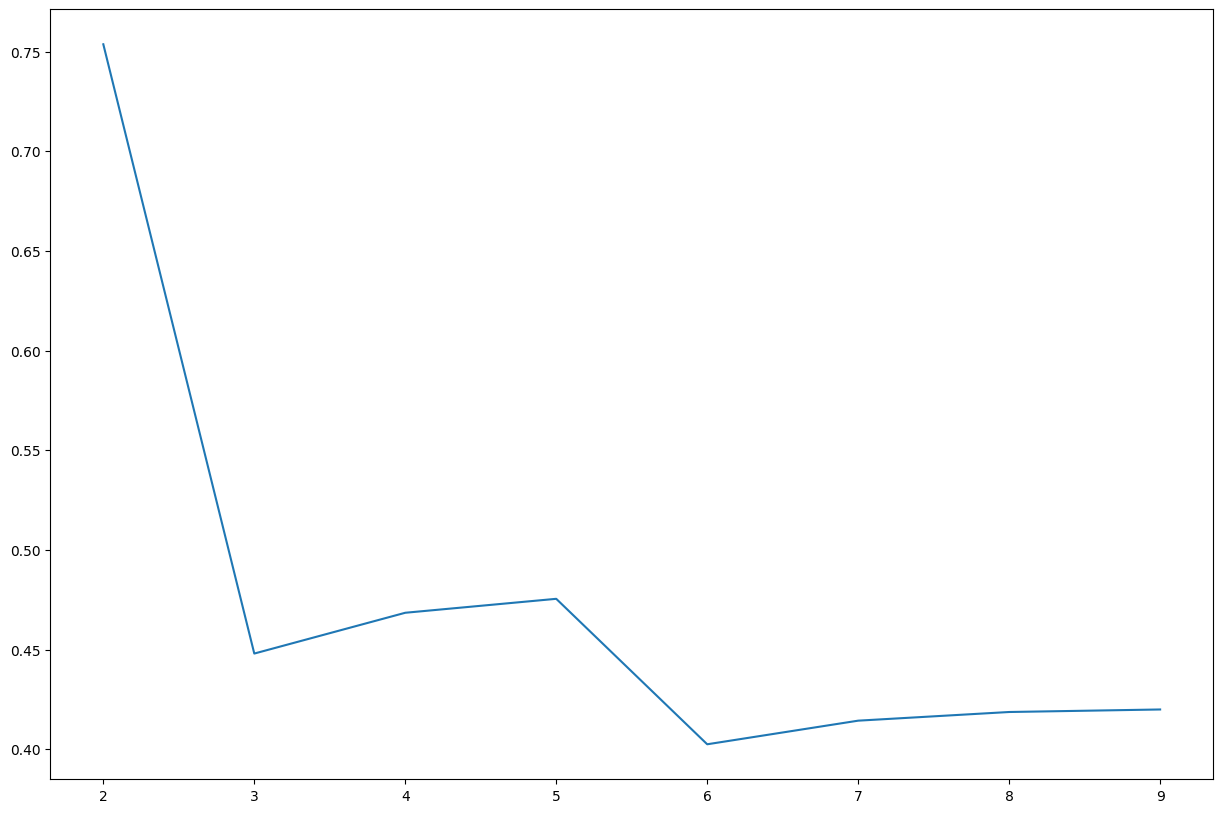

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x=k_num, y=score)
sns.scatterplot(k_num,score)
plt.xticks(k_num)
plt.ylabel('Silhlouette Score')
plt.xlabel('N of Clusters')

In [ ]:

k=range(1,10)
inertia=[]

for i in k:
    model=KMeans(n_clusters=i)
    model.fit(x)
    inertia.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

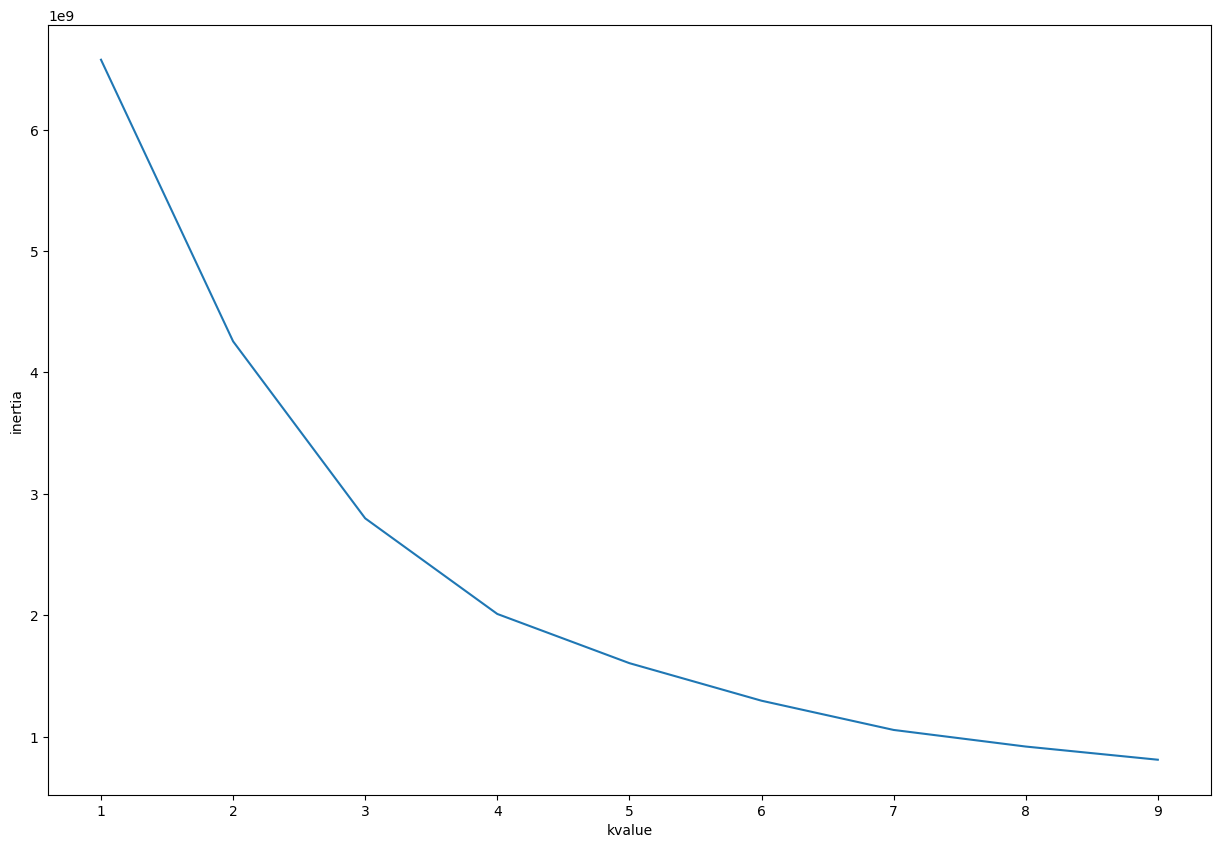

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(k,inertia)
plt.xlabel('kvalue')
plt.ylabel('inertia')
plt.show()


Hasil dari sillhouette score diatas, menunjukan bahwa N cluster dengan score terbesar adalah 2
cluster, tetapi dalam kasus ini, kita membutuhkan lebih dari 2 cluster untuk mengelompokan
konsumen agar kita dapat mendapatkan cluster yang lebih spesifik. Sehingga kita memilih cluster
yang memiliki sillhouette score kedua terbesar yaitu 5 cluster. Dari hasil pemilihan 5 cluster
tersebut kita dapat memberikan aktifitas marketing yang lebih tepat dan spesifik kepada setiap
kelompok konsumen/cluster agar lebih efektif dan efisien.

In [ ]:

kmeans=KMeans(n_clusters=5, random_state=2020)
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=2020)

In [ ]:
x['cluster4']=kmeans.labels_
x.head()

<ipython-input-130-eadc5f10a0b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cluster4']=kmeans.labels_


,recency,frequency,monetary,cluster4
0,111.0,1,129.90,2
1,114.0,1,18.90,2
2,536.0,1,69.00,0
3,320.0,1,25.99,0
4,287.0,1,180.00,0


In [ ]:
x.groupby('cluster4').mean()

,recency,frequency,monetary
cluster4,,,
0,386.290354,1.060251,94.944520
1,239.840967,1.548346,1600.275865
2,125.930123,1.056730,93.346806
3,229.253185,1.310157,530.979216
4,258.866667,3.800000,5515.098667


Dari hasil clustering di atas, dapat di rekomendasikan untuk kegiatan pemasaran yang tepat kepada
setiap cluster nya sebagai berikut :
• Cluster 0 : pelanggan yang lebih dari satu tahun tidak melakukan transaksi, dengan rata-rata
frekuensi pembelian 1 kali dan telah melakukan transaksi dengan total pembelian rendah.
Cluster ini dapat dibilang pelanggan lost, sehingga dapat direkomendasikan untuk cluster ini
sebagai berikut :
1. Menawarkan program loyalitas atau voucher diskon
2. Memberikan pesan personal dengan sifat persuasif dengan penawaran promo
spesial atau khusus untuk cluster tersebut 3. Kampanye promosi dengan waktu yang terbatas, untuk menciptakan sensasi yang
tidak dapat dilewatkan
• Cluster 1 : pelanggan yang melakukan transaksi 8 bulan terakhir, dengan rata-rata frekuensi
pembelian 1 sampai 2 kali dan telah melakukan transaksi dengan total pembelian tinggi.
Cluster ini dapat kita simpulkan perusahaan tidak dapat kehilangan pelanggan ini karena
berpotensi menjadi pelanggan loyal berdasarkan frekuensi pembelian yang lebih dari 1.
Sehingga dapat direkomendasikan untuk cluster ini sebagai berikut :
1. Menawarkan program loyalitas seperti pembagian kelompok berdasarkan frekuensi
transaksi untuk mendapatkan promo menarik di setiap pengelompokan nya.
2. Memberikan pesan personal dengan sifat persuasif dengan penawaran promo
spesial atau khusus untuk cluster tersebut
3. Memberikan kupon spesial sebagai reward
• Cluster 2 : pelanggan yang melakukan transaksi 4 bulan terakhir, dengan rata-rata frekuensi
pembelian 1 kali dan telah melakukan transaksi dengan total pembelian rendah. cluster ini
dapat kita simpulkan merupakan cluster pengguna baru, sehingga dapat direkomendasikan
untuk cluster ini sebagai berikut :
1. Melakukan kampanye dan memilih Brand ambasador yang kuat untuk mendapatkan
perhatian dan kepercayaan pelanggan
2. Menawarkan voucer promo terbatas
3. Memberikan push notification dan broadcast message untuk menarik perhatian
• Cluster 3 : pelanggan yang melakukan transaksi kurang dari 8 bulan terakhir, dengan rata-
rata frekuensi pembelian 1 kali dan telah melakukan transaksi dengan total pembelian
sedang. Cluster ini merupakan pelanggan yang masih berpotensi melakukan pembelian
ulang tetapi dibutuhkan dorongan dan hal yang sesuatu yang menarik untuk terwujudnya
tahap pembelian ulang, sehingga direkomendasikan untuk cluster ini sebagai berikut :
1. Menawarkan voucer promo terbatas
2. Menawarkan voucer potongan harga dengan minimal transaksi
3. Memberikan push notification dan broadcast message untuk menarik perhatian
• Cluster 4 : pelanggan yang melakukan transaksi kurang dari 9 bulan terakhir, dengan rata-
rata frekuensi pembelian 3 sampai 4 kali dan telah melakukan transaksi dengan total
pembelian tinggi. cluster ini dapat kita simpulkan pelanggan yang membutuhkan perhatian.
sehingga dapat direkomendasikan untuk cluster ini sebagai berikut :
1. Memberikan kupon spesial sebagai reward
2. Memberikan pesan personal dengan sifat persuasif dengan penawaran promo
spesial atau khusus untuk cluster tersebut
3. Memberikan push notification dan broadcast message untuk menarik perhatian

**Combining Main Dataframe with RFM**

Untuk menggabungkan kerangka data utama dengan nilai RFM (Recency, Frequency, Monetary), Anda perlu memastikan bahwa kedua sumber data memiliki pengidentifikasi umum (seperti ID pelanggan atau ID transaksi) yang dapat Anda gunakan untuk menggabungkan data. Berikut garis besar langkah-langkah yang dapat Anda ikuti: Siapkan Kerangka Data Utama:Pastikan kerangka data utama berisi pengidentifikasi unik untuk setiap pelanggan atau transaksi (misalnya, ID pelanggan atau ID transaksi).Pastikan data RFM dalam format yang dapat digabungkan dengan mudah dengan kerangka data utama (mis., sebagai kolom terpisah atau sebagai kerangka data terpisah).Siapkan Data RFM:Jika data RFM berada dalam kerangka data terpisah, pastikan ia memiliki pengidentifikasi umum (mis., ID pelanggan) yang dapat digunakan untuk digabungkan dengan kerangka data utama.Pastikan data RFM dalam format yang dapat digabungkan dengan mudah dengan kerangka data utama (mis., sebagai kolom terpisah atau sebagai kerangka data terpisah).Menggabungkan Dataframe:Gunakan pengidentifikasi umum (ID pelanggan atau ID transaksi) untuk menggabungkan yang utamakerangka data dengan data RFM.Bergantung pada struktur data Anda, Anda dapat menggunakan fungsi penggabungan () panda atau teknik penggabungan lainnya yang tersedia dalam bahasa pemrograman atau alat pilihan Anda.

In [ ]:
x_combine=df[['customer_unique_id','order_item_id','price','freight_value','payment_installments','payment_sequential','payment_value']]

In [ ]:
x_combine=x_combine.groupby(['customer_unique_id']).aggregate({'order_item_id' : 'sum', 'price' : 'max','freight_value' : 'max','payment_installments': 'max','payment_sequential' : 'max','payment_value' :'sum'}).reset_index()

In [ ]:
x_combine.head()

,customer_unique_id,order_item_id,price,freight_value,payment_installments,payment_sequential,payment_value
0,0000366f3b9a7992bf8c76cfdf3221e2,1.0,129.90,12.00,8.0,1.0,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,18.90,8.29,1.0,1.0,27.19
2,0000f46a3911fa3c0805444483337064,1.0,69.00,17.22,8.0,1.0,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,1.0,25.99,17.63,4.0,1.0,43.62
4,0004aac84e0df4da2b147fca70cf8255,1.0,180.00,16.89,6.0,1.0,196.89


In [ ]:
x_combine.shape

(91445, 7)

In [ ]:
x.shape

(91445, 4)

In [ ]:
x_combine=x_combine.join(x).drop(columns=['monetary','cluster4','customer_unique_id'])
x_combine.head()

,order_item_id,price,freight_value,payment_installments,payment_sequential,payment_value,recency,frequency
0,1.0,129.90,12.00,8.0,1.0,141.90,111.0,1
1,1.0,18.90,8.29,1.0,1.0,27.19,114.0,1
2,1.0,69.00,17.22,8.0,1.0,86.22,536.0,1
3,1.0,25.99,17.63,4.0,1.0,43.62,320.0,1
4,1.0,180.00,16.89,6.0,1.0,196.89,287.0,1


**Clustering main Dataframe plus RFM with KMeans**




In [ ]:
scaler=StandardScaler()
pca=PCA(n_components=2)
pipeline=Pipeline([
     ('preprocess',scaler),
     ('PCA',pca)
])

In [ ]:
x_pca_combine=pipeline.fit_transform(x_combine)

In [ ]:
variance=[]

for i in range(2):
 variance.append(np.var(x_pca_combine[:,i]))
print('informasi yang tersimpan pada 2 komponen pertama  100.0 %',round(sum(variance[:2])/sum(variance)*100,2),'%')

informasi yang tersimpan pada 2 komponen pertama  100.0 % 100.0 %


In [ ]:
x_pca_combine=pd.DataFrame(x_pca_combine, columns=['first component','second component'])
x_pca_combine.head()

,first component,second component
0,-0.273732,0.409971
1,-0.490690,-1.194288
2,-0.273432,0.194609
3,-0.383127,-0.523972
4,-0.214419,0.578871


In [ ]:
score=[]
k_num= range(2,8)
best=0

for i in k_num:
    kmean=KMeans(n_clusters=i)
    kmean.fit(x_pca_combine)
    labels=kmean.labels_
    sil_score=(silhouette_score(x_pca_combine,labels,metric='euclidean'))
    score.append(sil_score)
    if best<sil_score:
        best=sil_score
        best_k=i

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

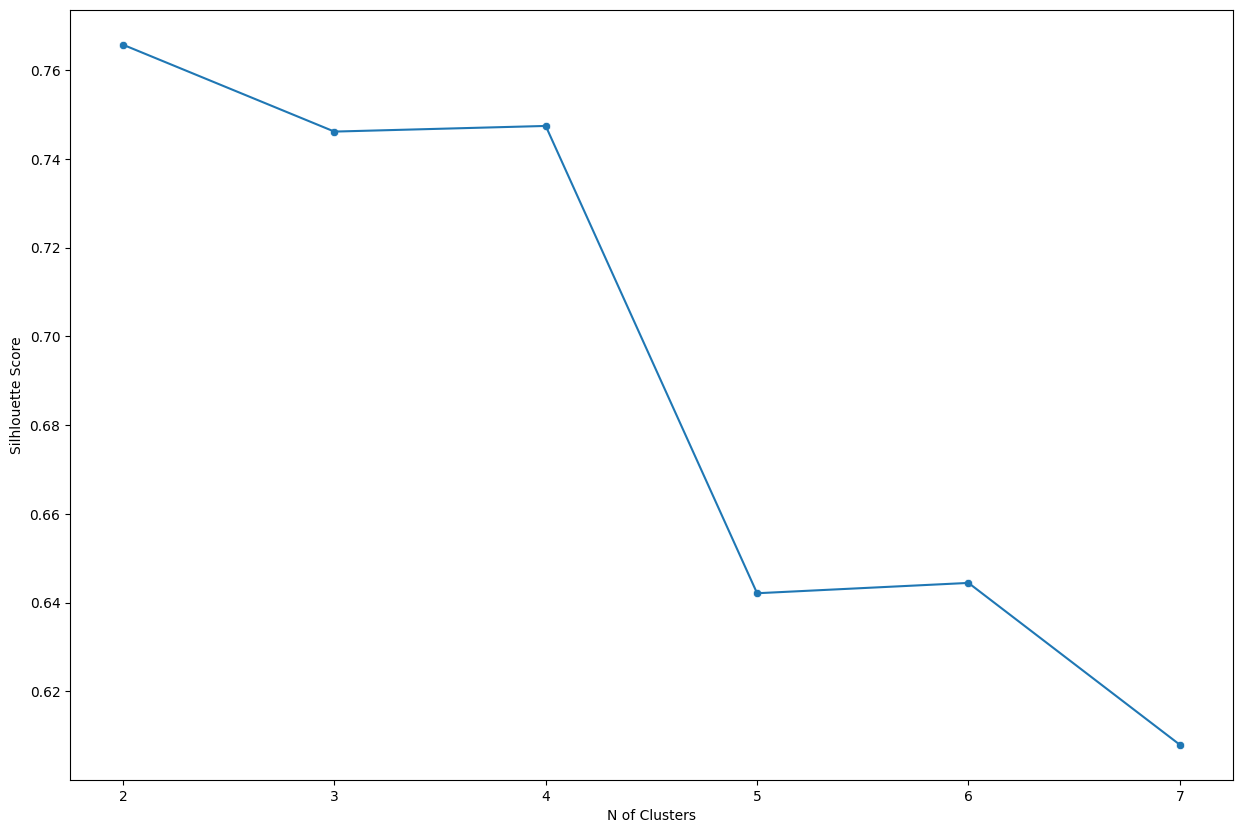

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x=k_num, y=score)
sns.scatterplot(x=k_num, y=score)
plt.xticks(k_num)
plt.ylabel('Silhlouette Score')
plt.xlabel('N of Clusters')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

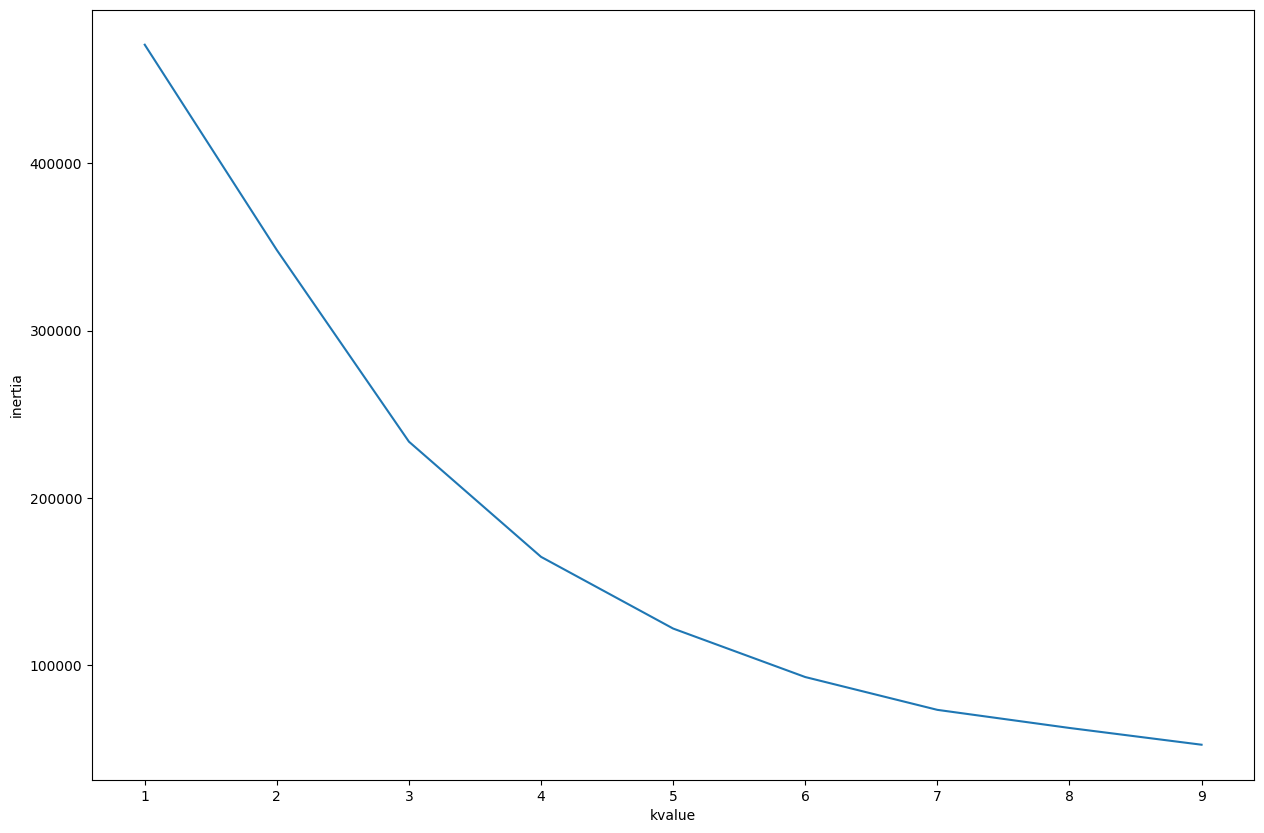

In [ ]:
k=range(1,10)
inertia=[]
plt.figure(figsize=(15,10))
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(x_pca_combine)
    inertia.append(model.inertia_)

plt.plot(k,inertia)
plt.xlabel('kvalue')
plt.ylabel('inertia')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=4, random_state=2020)
kmeans.fit(x_pca_combine)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=2020)

In [ ]:
x_pca_combine['cluster']=kmeans.labels_

In [ ]:
x_pca_combine['cluster']=x_pca_combine['cluster'].apply(lambda x : 'Loyal Customers' if x==3 else 'Need Atenttion' if x==1 else 'Big Spenders' if x==2 else 'Hibernating')

In [ ]:
x_combine['cluster']=kmeans.labels_

In [ ]:
x_combine['cluster']=x_combine['cluster'].apply(lambda x : 'Loyal Customers' if x==3 else 'Need Atenttion' if x==1 else 'Big Spenders' if x==2 else 'Hibernating')

In [ ]:
x_combine.groupby('cluster').mean()

,order_item_id,price,freight_value,payment_installments,payment_sequential,payment_value,recency,frequency
cluster,,,,,,,,
Big Spenders,1.062997,702.126176,55.031813,6.782051,1.015473,836.059302,230.775199,1.051282
Hibernating,1.012789,96.006973,18.403269,2.724898,1.000820,125.457929,236.216968,1.000000
Loyal Customers,7.947674,138.002558,23.539302,1.494186,6.976744,210.895872,269.517442,7.703488
Need Atenttion,2.254315,110.565620,20.223497,3.047213,1.593930,202.450115,237.536402,2.148780


In [ ]:
x_combine['cluster'].value_counts(normalize=True)*100

Hibernating        89.352070
Need Atenttion      5.512603
Big Spenders        4.947236
Loyal Customers     0.188091
Name: cluster, dtype: float64

In [ ]:
x_pca_combine['cluster'].value_counts()

Hibernating        81708
Need Atenttion      5041
Big Spenders        4524
Loyal Customers      172
Name: cluster, dtype: int64

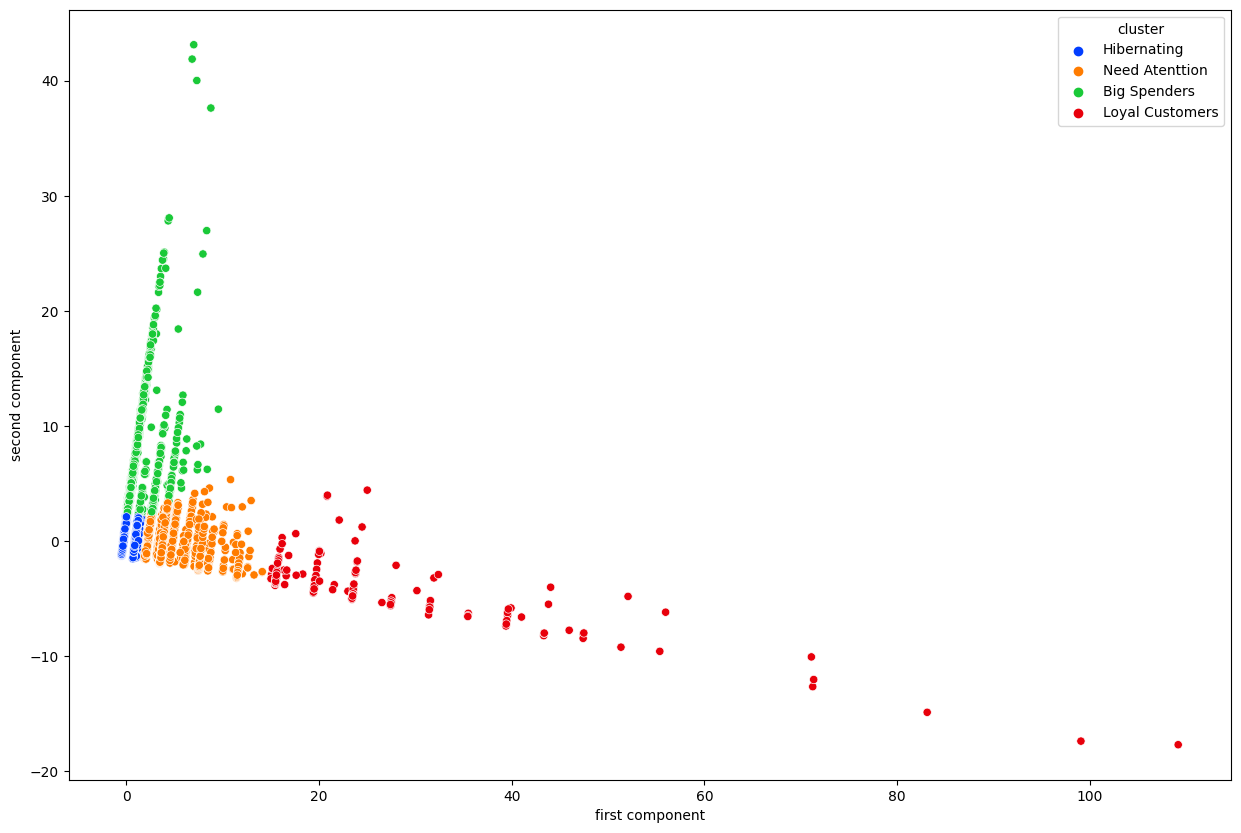

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='first component',y='second component',hue='cluster',data=x_pca_combine, palette='bright')
plt.show()

Cluster 0 : pelanggan dengan kuantitas pembelian barang rata-rata 1, dengan harga barang
rata-rata rendah dan ongkir juga rendah, pembayaran dilakukan rata-rata dengan tipe
pembayaran 2 sampai 3 tipe dan rata-rata dilakukan 1 kali pembayaran/cash, dan total
belanja rata-rata rendah, melakukan transaksi kurang dari 8 bulan terakhir, dengan rata-
rata frekuensi pembelian 1 kali. Cluster ini dapat dilihat dari daya beli dan retensi nya sangat
rendah sehingga dapat direkomendasikan sebagai berikut :
1. Memberikan push notification dan broadcast message untuk menarik perhatian
2. Pemberian voucer belanja dengan minimal transaksi
3. Menawarkan voucer promo terbatas
• Cluster 1 : pelanggan dengan kuantitas pembelian barang rata-rata 2, dengan harga barang
rata-rata tinggi dan ongkir juga tinggi, pembayaran dilakukan rata-rata dengan tipe
pembayaran 3 tipe dan rata-rata dilakukan 1 sampai 2 kali pembayaran, total belanja rata-
rata tinggi, melakukan transaksi kurang dari 8 bulan terakhir, dan dengan rata-rata
frekuensi pembelian 2 kali. Cluster ini merupakan pelanggan yang membutuhkan perhatian
dimana berdasarkan tingkat frekuensi mereka sudah melakukan repeat purchase dan dari
segi daya beli pun tinggi, sehingga dapat direkomendasikan sebagai berikut :
1. Pemberian voucer belanja dengan minimal transaksi
2. Pemberian voucer gratis ongkir atau potongan biaya pengiriman
3. Pemberian promo cicilan tanpa bunga
• Cluster 2 : pelanggan dengan kuantitas pembelian barang rata-rata 1, dengan harga barang
rata-rata tinggi dan ongkir juga tinggi, pembayaran dilakukan rata-rata dengan tipe
pembayaran 6 sampai 7 tipe dan rata-rata dilakukan 1 kali pembayaran/cash, dan total
belanja rata-rata tinggi, melakukan transaksi kurang dari 8 bulan terakhir, dengan rata-rata
frekuensi pembelian 1 kali. cluster ini mempunyai daya beli yang tinggi sehingga dapat
direkomendasikan sebagai berikut :
1. Pemberian voucer gratis ongkir atau potongan biaya pengiriman
2. Pemberian voucer belanja dengan minimal transaksi
3. Pemberian push notification dan broadcast message untuk menarik perhatian
Cluster 3 : pelanggan dengan kuantitas pembelian barang rata-rata 9, dengan harga barang
rata-rata tinggi dan ongkir juga tinggi, pembayaran dilakukan rata-rata dengan tipe
pembayaran 1 tipe dan rata-rata dilakukan 8 kali pembayaran, total belanja rata-rata tinggi,
melakukan transaksi kurang dari 10 bulan terakhir, dan dengan rata-rata frekuensi
pembelian 8 kali. Cluster ini merupakan pelanggan yang berpotensi dimana tingkat retensi
nya tinggi dan daya beli nya pun tinggi sehingga dapat direkomendasikan sebagai berikut :
1. Menawarkan program loyalitas seperti pembagian kelompok berdasarkan frekuensi
transaksi untuk mendapatkan promo menarik di setiap pengelompokan nya.
2. Pemberian promo cicilan tanpa bunga
3. Memberikan kupon spesial sebagai reward
Conclusion
Berdasarkan hasil analisis yang telah kami lakukan, terdapat permasalahan utama dari hasil cohort
Analisis dimana sebagian besar atau lebih tepatnya 94% pelanggan yang telah bertransaksi di e-
commerce Olist tidak melakukan pembelian berulang, maka dari itu untuk memecahkan
permasalahan kami melakukan clustering menggunakan KMeans dan RFM analisis untuk Customer
Segmentation, kami melakukan 4 modeling yaitu :
1. Clustering dengan feature data customer menggunakan KMeans, dari hasil clustering
tersebut menunjukan jumlah cluster optimal nya adalah 2 dengan silhoutte score nya 0,75
tetapi pembagian 2 cluster tidak dapat mewakili segmentasi yang inginkan sehingga kita
memilih jumlah cluster 5 dengan silhoutte score tertinggi kedua yaitu 0,60. kami tidak
memilih model ini karena dari pembagian cluster dihasilkan dari faktor yang sama yaitu
jenis data payment sehingga pembagian cluster tersebut hanya berdasarkan pengeluaran
yang tinggi, sedang, dan rendah.
2. RFM segmentasi, RFM segmentasi terdiri dari Recency, frequency, dan Monetary, dari hasil
segmentasi tersebut pembagian sudah cukup beragam yaitu terdiri dari 6 cluster dan
intepretasi setiap cluster nya sudah cukup baik, tetapi penentuan segmentasinya terlalu
subjective karena hasilnya bukan berdasarkan hasil algoritma tetapi hasil yang kita tentukan
berdasarkan domain knowledge sehingga kita tidak dapat memvalidasi hasil segemntasi
tersebut.
3. Clustering RFM dengan KMeans, dari hasil clustering tersebut menunjukan jumlah cluster
optimal nya adalah 2 dengan silhoutte score nya 0,75 tetapi pembagian 2 cluster tidak dapat
mewakili segmentasi yang inginkan sehingga kita memilih jumlah cluster 5 dengan silhoutte
score tertinggi kedua yaitu lebih rendah dari 0,50. kami tidak memilih model ini karena dari
pembagian cluster nya tidak adanya perbedaan yang signifikan dari setiap clusternya dapat
dibuktikan dari silhoutte score nya yang rendah.
4. Clustering dengan feature ditambah recency dan frequency menggunakan KMeans, dari hasil
clustering tersebut menunjukan jumlah cluster optimal nya adalah 4 dengan silhoutte score
nya 0,76, kami memilih model ini karen dari hasil pembagian cluster nya sudah cukup baik
dan karakteristik tiap clusternya berbeda sehingga model ini dapat di interpretasikan
dengan jelas, didukung dengan hasil silhoutte score yang tinggi, sehingga dengan cluster ini
kami dapat menentukan target segmen yang diutamakan untuk memecahkan permasalahan.
Dari hasil clustering yang kami, kami mengetahui bahwa cluster degan proporsi terbanyak yaitu
89% adalah Hibernating, sehingga cluster tersebut merupakan target segmen kami dan didukung
dengan keterhubungan permasalahan hasil cohort analisis yang menunjukan 94% tidak melakukan
pembelian berulang. Menurut Reichheld (1996), suatu perusahaan sangat penting untuk
memuaskan dan mempertahankan pelanggan yang ada karena mencari pelanggan baru biaya nya
dapat mencapai lima kali lipat lebih besar dari biaya untuk memuaskan dan mempertahankan
pelanggan.
Hasil analisis kami terhadap data customer menemukan beberapa insight yang dapat di indikasikan
sebagai penyebab dari permasalahan target segmen kami yaitu Hibernating, insight tersebut yaitu
adanya kategori produk yang banyak diminati pelanggan tetapi bersifat produk yang
tidak reapeatable sehingga dapat mewajarkan tidak adanya repurchashing dalam jangka waktu
pendek, berdasarkan insight lain menunjukan bahwa rata-rata waktu pengiriman di e-commerce
olist ini adalah 9 hari dan estimasi waktu pengiriman 21 hari, didukung dengan adanya insight
bahwa sebesar 64% transaksi dilakukan antar negara bagian yang berarti pengiriman antar negara
bagian pastinya membutuhkan waktu yang lama, sehingga jika dilihat dari insight di awal bahwa
kategori produk yang popular itu wajar merupakan kategori yang bukan reapeatable karena jika
kategori produk yang bersifat reapeatable seperti makanan, kecantikan, dan lain-lain membutuhkan
waktu yang lama untuk menunggu produk sampai, dan pelanggan pun akan lebih memilih
berbelanja langsung di offline store yang tidak memerlukan waktu yang lama untuk mendapatkan
produk yang diinginkan. Hal tersebut tentunya menjadi suatu permasalahan pelanggan untuk
berbelanja di e-commerce olist.
Berdasarkan analisis di atas, sesuai dengan pernyataan Reichheld bahwa mempertahankan
pelanggan yang sudah ada dapat menghemat biaya yang dikeluarkan, dengan ini kami menyarankan
sebelum melakukan aktivitas pemasaran seperti campaign besar dan lain-lain, perlu dilakukan
perbaikan kinerja terlebih dahulu di setiap sektor permasalahan di atas, sehingga kami memberikan
rekomendasi sebagai berikut :
1. Bekerja sama dengan jasa pengiriman atau membuat jasa pengiriman sendiri agar
pengiriman lebih optimal baik itu dari segi pengiriman ataupun estimasi waktu pengiriman.
2. pembuatan campaign untuk meningkatkan jumlah seller di berbagai negara bagian, seperti
pencerdasan peningkatan penjualan untuk para seller.
3. Melakukan sales promotion seperti voucer gratis ongkir untuk menarik perhatian target
segmen kita karena biaya pengiriman dinilai tinggi dan cicilan tanpa bunga karena 50%
pelanggan Olist melakukan cicilan.
4. Konsistensi untuk melakukan perubahan kearah yang lebih baik seperti membuat produk
yang mempermudah pelanggan untuk berbelanja di Olist, contohnya Olist now yaitu
program untuk berbelanja dengan pengiriman hanya 2 jam.
Impact yang diharapkan yaitu target segmen kami melakukan pembelian berulang tetapi dari
segmentasi ini tidak dapat diukur karena data untuk melihat impact tersebut belum tersedia. kami
merekomendasikan untuk melakukan analisis lebih lanjut untuk mengetahui impact nya, analisis
tersebut dapat berupa A/B testing terhadap target segmen dengan membandingkan pelanggan yang
diberikan perlakukan sesuai rekomendasi dan pelanggan yang tidak di berikan perlakukan apapun,
sehingga dapat terlihat hasil dari rekomendasi berdampak baik dan dapat diukur.